In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('final_dataset.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563113 entries, 0 to 563112
Data columns (total 46 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        563113 non-null  int64  
 1   STORE_KEY                         563113 non-null  int64  
 2   STORE_NUMBER                      563113 non-null  int64  
 3   STORE_NAME                        563113 non-null  object 
 4   STORE_TYPE_NAME                   563113 non-null  object 
 5   OPEN_DATE                         563113 non-null  object 
 6   CLOSE_DATE                        563113 non-null  object 
 7   BUSINESS_DATE                     563113 non-null  object 
 8   CITY_NAME                         563113 non-null  object 
 9   STATE_CODE                        563113 non-null  object 
 10  STATE_NAME                        563113 non-null  object 
 11  TIME_ZONE_NAME                    563113 non-null  o

In [8]:
df[df['PROMOTION_OFFER'].isnull()]

Unnamed: 0  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
4                4        825             2        TX2       FRANCHISE   
6                6        825             2        TX2       FRANCHISE   
7                7        825             2        TX2       FRANCHISE   
11              11        825             2        TX2       FRANCHISE   
16              16        825             2        TX2       FRANCHISE   
...            ...        ...           ...        ...             ...   
563108      563108        791          7005     OH7005       FRANCHISE   
563109      563109        791          7005     OH7005       FRANCHISE   
563110      563110        791          7005     OH7005       FRANCHISE   
563111      563111        791          7005     OH7005       FRANCHISE   
563112      563112        791          7005     OH7005       FRANCHISE   

         OPEN_DATE  CLOSE_DATE BUSINESS_DATE CITY_NAME STATE_CODE  ...  \
4       1998-05-09  1999-12-31    2022-11-02    IRVING         TX  ...   
6       1998-05-09  1999-12-31    2022-11-03    IRVING         TX  ...   
7       1998-05-09  1999-12-31    2022-09-11    IRVING         TX  ...   
11      1998-05-09  1999-12-31    2022-12-30    IRVING         TX  ...   
16      1998-05-09  1999-12-31    2023-04-27    IRVING         TX  ...   
...            ...         ...           ...       ...        ...  ...   
563108  2020-10-12  2021-09-25    2021-03-05  COLUMBUS         OH  ...   
563109  2020-10-12  2021-09-25    2021-02-28  COLUMBUS         OH  ...   
563110  2020-10-12  2021-09-25    2021-02-22  COLUMBUS         OH  ...   
563111  2020-10-12  2021-09-25    2021-05-20  COLUMBUS         OH  ...   
563112  2020-10-12  2021-09-25    2021-03-21  COLUMBUS         OH  ...   

       PY_TRANSACTION_FINAL_COUNT PY_NET_SALES_FINAL_USD_AMOUNT  \
4                             110                          2323   
6                             131                          2815   
7                             170                          3768   
11                            175                          4703   
16                            138                          2568   
...                           ...                           ...   
563108                          0                             0   
563109                          0                             0   
563110                          0                             0   
563111                          0                             0   
563112                          0                             0   

        PROMOTION_TYPE PROMOTION_OFFER PROMOTION_ITEM  PROMOTION_CASH_AMOUNT  \
4         No Promotion             NaN       No Items                      0   
6         No Promotion             NaN       No Items                      0   
7         No Promotion             NaN       No Items                      0   
11        No Promotion             NaN       No Items                      0   
16        No Promotion             NaN       No Items                      0   
...                ...             ...            ...                    ...   
563108    No Promotion             NaN       No Items                      0   
563109    No Promotion             NaN       No Items                      0   
563110    No Promotion             NaN       No Items                      0   
563111    No Promotion             NaN       No Items                      0   
563112    No Promotion             NaN       No Items                      0   

       PROMOTION_PERCENTAGE     PLATFORM FREQUENCY PROMOTION_COVERAGE  
4                       0.0  No Platform       NaN                NaN  
6                       0.0  No Platform       NaN                NaN  
7                       0.0  No Platform       NaN                NaN  
11                      0.0  No Platform       NaN                NaN  
16                      0.0  No Platform       NaN                NaN  
...                     ...     

In [557]:
df.loc[ df[df['PROMOTION_OFFER'].isnull()].index , 'PROMOTION_OFFER'] = 'No Offers'
df.loc[ df[df['PROMOTION_ITEM'].isnull()].index , 'PROMOTION_ITEM'] = 'No Items'
df.loc[ df[df['PLATFORM'].isnull()].index , 'PLATFORM'] = 'No Platform'
df.loc[ df[df['FREQUENCY'].isnull()].index , 'FREQUENCY'] = 'None'
df.loc[ df[df['PROMOTION_COVERAGE'].isnull()].index , 'PROMOTION_COVERAGE'] = 'None'

In [10]:
dates = ['OPEN_DATE','CLOSE_DATE','BUSINESS_DATE','STORE_LIVE_DATE','DISPATCH_GO_LIVE_DATE','DOOR_DASH_GO_LIVE_DATE','DOOR_DASH_MARKUP_GO_LIVE_DATE','UBER_EATS_MARKUP_DATE']
for date in dates:
    df[date] = pd.to_datetime(df[date])

In [11]:
categorical_columns = ['STORE_TYPE_NAME' , 'CITY_NAME' , 'STATE_CODE' , 'STATE_NAME' , 'TIME_ZONE_NAME', 'DMA_NAME', 'STORE_STATUS', 'REGION_NAME', 'STORE_FUNCTIONAL_STATUS',
                       'GLOBAL_REGION_NAME', 'GLOBAL_REGION_STORE_TYPE_NAME', 'AREA_REGION', 'STORE_CONCEPT_NAME']
for i in categorical_columns:
  df[i] = df[i].astype('category')

In [12]:
df['STORE_KEY'] = df['STORE_KEY'].astype('int32')
df['STORE_NUMBER'] = df['STORE_NUMBER'].astype('int16')
df['DMA_ID'] = df['DMA_ID'].astype('int16')
df['REGION_ID'] = df['REGION_ID'].astype('int8')
df['TEMP_CLOSE_INDICATOR'] = df['TEMP_CLOSE_INDICATOR'].astype('int8')
df['PROJECTION_INCLUDED_INDICATOR'] = df['PROJECTION_INCLUDED_INDICATOR'].astype('int8')
df['BUSINESS_DATE_FISCAL_DAY_OF_YEAR'] = df['BUSINESS_DATE_FISCAL_DAY_OF_YEAR'].astype('int16')
df['BUSINESS_DATE_FISCAL_YEAR'] = df['BUSINESS_DATE_FISCAL_YEAR'].astype('int16')
df['COMP_BUSINESS_DATE_FISCAL_YEAR'] = df['COMP_BUSINESS_DATE_FISCAL_YEAR'].astype('int16')
df['COMPARABLE_INDICATOR'] = df['COMPARABLE_INDICATOR'].astype('int8')
df['TRANSACTION_FINAL_COUNT'] = df['TRANSACTION_FINAL_COUNT'].astype('int16')
df['NET_SALES_FINAL_USD_AMOUNT'] = df['NET_SALES_FINAL_USD_AMOUNT'].astype('int16')
df['PY_TRANSACTION_FINAL_COUNT'] = df['PY_TRANSACTION_FINAL_COUNT'].astype('int16')
df['PY_NET_SALES_FINAL_USD_AMOUNT'] = df['PY_NET_SALES_FINAL_USD_AMOUNT'].astype('int16')
df['PROMOTION_CASH_AMOUNT'] = df['PROMOTION_CASH_AMOUNT'].astype('int8')


In [13]:
categorical_columns1 = ['PROMOTION_TYPE', 'PROMOTION_OFFER', 'PROMOTION_ITEM', 'PLATFORM' , 'FREQUENCY', 'PROMOTION_COVERAGE']
for i in categorical_columns1:
  df[i] = df[i].astype('category')

In [14]:
df['PROMOTION_PERCENTAGE'] = pd.to_numeric(df['PROMOTION_PERCENTAGE'], downcast='float')
df['PRIOR_STORE_NUMBER'] = df['PRIOR_STORE_NUMBER'].astype('int8')

In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563113 entries, 0 to 563112
Data columns (total 46 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Unnamed: 0                        563113 non-null  int64         
 1   STORE_KEY                         563113 non-null  int32         
 2   STORE_NUMBER                      563113 non-null  int16         
 3   STORE_NAME                        563113 non-null  object        
 4   STORE_TYPE_NAME                   563113 non-null  category      
 5   OPEN_DATE                         563113 non-null  datetime64[ns]
 6   CLOSE_DATE                        563113 non-null  datetime64[ns]
 7   BUSINESS_DATE                     563113 non-null  datetime64[ns]
 8   CITY_NAME                         563113 non-null  category      
 9   STATE_CODE                        563113 non-null  category      
 10  STATE_NAME                      

In [564]:
month_name_index = 7
day_name_index = 8
month_name = df['BUSINESS_DATE'].dt.month_name()
day_name = df['BUSINESS_DATE'].dt.day_name()
df.insert(loc = month_name_index, column = 'MONTH_NAME', value = month_name)
df.insert(loc = day_name_index, column = 'DAY_NAME', value = day_name)
df

Unnamed: 0  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
0                0        825             2        TX2       FRANCHISE   
1                1        825             2        TX2       FRANCHISE   
2                2        825             2        TX2       FRANCHISE   
3                3        825             2        TX2       FRANCHISE   
4                4        825             2        TX2       FRANCHISE   
...            ...        ...           ...        ...             ...   
563108      563108        791          7005     OH7005       FRANCHISE   
563109      563109        791          7005     OH7005       FRANCHISE   
563110      563110        791          7005     OH7005       FRANCHISE   
563111      563111        791          7005     OH7005       FRANCHISE   
563112      563112        791          7005     OH7005       FRANCHISE   

        OPEN_DATE CLOSE_DATE MONTH_NAME   DAY_NAME BUSINESS_DATE CITY_NAME  \
0      1998-05-09 1999-12-31   November   Thursday    2022-11-17    IRVING   
1      1998-05-09 1999-12-31        May     Friday    2023-05-26    IRVING   
2      1998-05-09 1999-12-31   December     Friday    2022-12-16    IRVING   
3      1998-05-09 1999-12-31  September     Monday    2023-09-18    IRVING   
4      1998-05-09 1999-12-31   November  Wednesday    2022-11-02    IRVING   
...           ...        ...        ...        ...           ...       ...   
563108 2020-10-12 2021-09-25      March     Friday    2021-03-05  COLUMBUS   
563109 2020-10-12 2021-09-25   February     Sunday    2021-02-28  COLUMBUS   
563110 2020-10-12 2021-09-25   February     Monday    2021-02-22  COLUMBUS   
563111 2020-10-12 2021-09-25        May   Thursday    2021-05-20  COLUMBUS   
563112 2020-10-12 2021-09-25      March     Sunday    2021-03-21  COLUMBUS   

       STATE_CODE STATE_NAME TIME_ZONE_NAME  DMA_ID          DMA_NAME  \
0              TX      TEXAS        CENTRAL     623  DALLAS-FT. WORTH   
1              TX      TEXAS        CENTRAL     623  DALLAS-FT. WORTH   
2              TX      TEXAS        CENTRAL     623  DALLAS-FT. WORTH   
3              TX      TEXAS        CENTRAL     623  DALLAS-FT. WORTH   
4              TX      TEXAS        CENTRAL     623  DALLAS-FT. WORTH   
...           ...        ...            ...     ...               ...   
563108         OH       OHIO        EASTERN     535      COLUMBUS, OH   
563109         OH       OHIO        EASTERN     535      COLUMBUS, OH   
563110         OH       OHIO        EASTERN     535      COLUMBUS, OH   
563111         OH       OHIO        EASTERN     535      COLUMBUS, OH   
563112         OH       OHIO        EASTERN     535      COLUMBUS, OH   

       STORE_STATUS  REGION_ID REGION_NAME  PRIOR_STORE_NUMBER  \
0            ACTIVE          1   SOUTHWEST                   0   
1            ACTIVE          1   SOUTHWEST                   0   
2            ACTIVE          1   SOUTHWEST                   0   
3            ACTIVE          1   SOUTHWEST                   0   
4            ACTIVE          1   SOUTHWEST                   0   
...             ...        ...         ...                 ...   
563108     INACTIVE          3       NORTH                   0   
563109     INACTIVE          3       NORTH                   0   
563110     INACTIVE          3       NORTH                   0   
563111     INACTIVE          3       NORTH                   0   
563112     INACTIVE          3       NORTH                   0   

       STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS GLOBAL_REGION_NAME  \
0           1998-05-09             OPERATIONAL           Domestic   
1           1998-05-09             OPERATIONAL           Domestic   
2           1998-05-09             OPERATIONAL           Domestic   
3           1998-05-09             OPERATIONAL           Domestic   
4           1998-05-09             OPERATIONAL           Domestic   
...                ...                     ...                ...   
563108      2020-10-12       

In [565]:
pd.set_option('display.max_columns', None)  

In [566]:
df.head()

Unnamed: 0  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
0           0        825             2        TX2       FRANCHISE 1998-05-09   
1           1        825             2        TX2       FRANCHISE 1998-05-09   
2           2        825             2        TX2       FRANCHISE 1998-05-09   
3           3        825             2        TX2       FRANCHISE 1998-05-09   
4           4        825             2        TX2       FRANCHISE 1998-05-09   

  CLOSE_DATE MONTH_NAME   DAY_NAME BUSINESS_DATE CITY_NAME STATE_CODE  \
0 1999-12-31   November   Thursday    2022-11-17    IRVING         TX   
1 1999-12-31        May     Friday    2023-05-26    IRVING         TX   
2 1999-12-31   December     Friday    2022-12-16    IRVING         TX   
3 1999-12-31  September     Monday    2023-09-18    IRVING         TX   
4 1999-12-31   November  Wednesday    2022-11-02    IRVING         TX   

  STATE_NAME TIME_ZONE_NAME  DMA_ID          DMA_NAME STORE_STATUS  REGION_ID  \
0      TEXAS        CENTRAL     623  DALLAS-FT. WORTH       ACTIVE          1   
1      TEXAS        CENTRAL     623  DALLAS-FT. WORTH       ACTIVE          1   
2      TEXAS        CENTRAL     623  DALLAS-FT. WORTH       ACTIVE          1   
3      TEXAS        CENTRAL     623  DALLAS-FT. WORTH       ACTIVE          1   
4      TEXAS        CENTRAL     623  DALLAS-FT. WORTH       ACTIVE          1   

  REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
0   SOUTHWEST                   0      1998-05-09             OPERATIONAL   
1   SOUTHWEST                   0      1998-05-09             OPERATIONAL   
2   SOUTHWEST                   0      1998-05-09             OPERATIONAL   
3   SOUTHWEST                   0      1998-05-09             OPERATIONAL   
4   SOUTHWEST                   0      1998-05-09             OPERATIONAL   

  GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME       AREA_REGION  \
0           Domestic             DOMESTICFRANCHISE  DALLAS-FT. WORTH   
1           Domestic             DOMESTICFRANCHISE  DALLAS-FT. WORTH   
2           Domestic             DOMESTICFRANCHISE  DALLAS-FT. WORTH   
3           Domestic             DOMESTICFRANCHISE  DALLAS-FT. WORTH   
4           Domestic             DOMESTICFRANCHISE  DALLAS-FT. WORTH   

  DISPATCH_GO_LIVE_DATE DOOR_DASH_GO_LIVE_DATE DOOR_DASH_MARKUP_GO_LIVE_DATE  \
0            2019-04-17             2019-04-17                    2020-09-27   
1            2019-04-17             2019-04-17                    2020-09-27   
2            2019-04-17             2019-04-17                    2020-09-27   
3            2019-04-17             2019-04-17                    2020-09-27   
4            2019-04-17             2019-04-17                    2020-09-27   

  STORE_CONCEPT_NAME UBER_EATS_MARKUP_DATE  TEMP_CLOSE_INDICATOR  \
0           ORIGINAL            2022-07-20                     0   
1           ORIGINAL            2022-07-20                     0   
2           ORIGINAL            2022-07-20                     0   
3           ORIGINAL            2022-07-20                     0   
4           ORIGINAL            2022-07-20                     0   

   PROJECTION_INCLUDED_INDICATOR  BUSINESS_DATE_FISCAL_DAY_OF_YEAR  \
0                              0                               327   
1                              0                               146   
2                              0                               356   
3                              0                               261   
4                              0                               312   

   BUSINESS_DATE_FISCAL_YEAR  COMP_BUSINESS_DATE_FISCAL_YEAR  \
0                       2022                            2021   
1                       2023                            2022   
2                       2022                            2021   
3                       2023                            2022   
4                       2022                            2021   

   C

In [567]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [568]:
df

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
0             825             2        TX2       FRANCHISE 1998-05-09   
1             825             2        TX2       FRANCHISE 1998-05-09   
2             825             2        TX2       FRANCHISE 1998-05-09   
3             825             2        TX2       FRANCHISE 1998-05-09   
4             825             2        TX2       FRANCHISE 1998-05-09   
...           ...           ...        ...             ...        ...   
563108        791          7005     OH7005       FRANCHISE 2020-10-12   
563109        791          7005     OH7005       FRANCHISE 2020-10-12   
563110        791          7005     OH7005       FRANCHISE 2020-10-12   
563111        791          7005     OH7005       FRANCHISE 2020-10-12   
563112        791          7005     OH7005       FRANCHISE 2020-10-12   

       CLOSE_DATE MONTH_NAME   DAY_NAME BUSINESS_DATE CITY_NAME STATE_CODE  \
0      1999-12-31   November   Thursday    2022-11-17    IRVING         TX   
1      1999-12-31        May     Friday    2023-05-26    IRVING         TX   
2      1999-12-31   December     Friday    2022-12-16    IRVING         TX   
3      1999-12-31  September     Monday    2023-09-18    IRVING         TX   
4      1999-12-31   November  Wednesday    2022-11-02    IRVING         TX   
...           ...        ...        ...           ...       ...        ...   
563108 2021-09-25      March     Friday    2021-03-05  COLUMBUS         OH   
563109 2021-09-25   February     Sunday    2021-02-28  COLUMBUS         OH   
563110 2021-09-25   February     Monday    2021-02-22  COLUMBUS         OH   
563111 2021-09-25        May   Thursday    2021-05-20  COLUMBUS         OH   
563112 2021-09-25      March     Sunday    2021-03-21  COLUMBUS         OH   

       STATE_NAME TIME_ZONE_NAME  DMA_ID          DMA_NAME STORE_STATUS  \
0           TEXAS        CENTRAL     623  DALLAS-FT. WORTH       ACTIVE   
1           TEXAS        CENTRAL     623  DALLAS-FT. WORTH       ACTIVE   
2           TEXAS        CENTRAL     623  DALLAS-FT. WORTH       ACTIVE   
3           TEXAS        CENTRAL     623  DALLAS-FT. WORTH       ACTIVE   
4           TEXAS        CENTRAL     623  DALLAS-FT. WORTH       ACTIVE   
...           ...            ...     ...               ...          ...   
563108       OHIO        EASTERN     535      COLUMBUS, OH     INACTIVE   
563109       OHIO        EASTERN     535      COLUMBUS, OH     INACTIVE   
563110       OHIO        EASTERN     535      COLUMBUS, OH     INACTIVE   
563111       OHIO        EASTERN     535      COLUMBUS, OH     INACTIVE   
563112       OHIO        EASTERN     535      COLUMBUS, OH     INACTIVE   

        REGION_ID REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE  \
0               1   SOUTHWEST                   0      1998-05-09   
1               1   SOUTHWEST                   0      1998-05-09   
2               1   SOUTHWEST                   0      1998-05-09   
3               1   SOUTHWEST                   0      1998-05-09   
4               1   SOUTHWEST                   0      1998-05-09   
...           ...         ...                 ...             ...   
563108          3       NORTH                   0      2020-10-12   
563109          3       NORTH                   0      2020-10-12   
563110          3       NORTH                   0      2020-10-12   
563111          3       NORTH                   0      2020-10-12   
563112          3       NORTH                   0      2020-10-12   

       STORE_FUNCTIONAL_STATUS GLOBAL_REGION_NAME  \
0                  OPERATIONAL           Domestic   
1                  OPERATIONAL           Domestic   
2                  OPERATIONAL           Domestic   
3                  OPERATIONAL           Domestic   
4                  OPERATIONAL           Domestic   
...                        ...                ...   
563108                  CLOSED           Domestic   
563109                  CLOSED          

In [21]:
df[df['STORE_NUMBER'] == 1346]

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
398676       2127          1346     CA1346       FRANCHISE 2017-11-20   
398677       2127          1346     CA1346       FRANCHISE 2017-11-20   
398678       2127          1346     CA1346       FRANCHISE 2017-11-20   
398679       2127          1346     CA1346       FRANCHISE 2017-11-20   
398680       2127          1346     CA1346       FRANCHISE 2017-11-20   
...           ...           ...        ...             ...        ...   
400385       2127          1346     CA1346       FRANCHISE 2017-11-20   
400386       2127          1346     CA1346       FRANCHISE 2017-11-20   
400387       2127          1346     CA1346       FRANCHISE 2017-11-20   
400388       2127          1346     CA1346       FRANCHISE 2017-11-20   
400389       2127          1346     CA1346       FRANCHISE 2017-11-20   

       CLOSE_DATE MONTH_NAME  DAY_NAME BUSINESS_DATE     CITY_NAME STATE_CODE  \
398676 1999-12-31   December    Friday    2022-12-30  APPLE VALLEY         CA   
398677 1999-12-31  September    Friday    2023-09-22  APPLE VALLEY         CA   
398678 1999-12-31     August    Friday    2023-08-25  APPLE VALLEY         CA   
398679 1999-12-31   November    Monday    2023-11-20  APPLE VALLEY         CA   
398680 1999-12-31        May    Friday    2023-05-26  APPLE VALLEY         CA   
...           ...        ...       ...           ...           ...        ...   
400385 1999-12-31  September  Thursday    2019-09-26  APPLE VALLEY         CA   
400386 1999-12-31      April  Saturday    2020-04-04  APPLE VALLEY         CA   
400387 1999-12-31   November  Thursday    2019-11-21  APPLE VALLEY         CA   
400388 1999-12-31        May  Thursday    2019-05-09  APPLE VALLEY         CA   
400389 1999-12-31        May  Saturday    2019-05-04  APPLE VALLEY         CA   

        STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  \
398676  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
398677  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
398678  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
398679  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
398680  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
...            ...            ...     ...          ...          ...   
400385  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
400386  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
400387  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
400388  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
400389  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   

        REGION_ID REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE  \
398676          4        WEST                   0      2017-11-20   
398677          4        WEST                   0      2017-11-20   
398678          4        WEST                   0      2017-11-20   
398679          4        WEST                   0      2017-11-20   
398680          4        WEST                   0      2017-11-20   
...           ...         ...                 ...             ...   
400385          4        WEST                   0      2017-11-20   
400386          4        WEST                   0      2017-11-20   
400387          4        WEST                   0      2017-11-20   
400388          4        WEST                   0      2017-11-20   
400389          4        WEST                   0      2017-11-20   

       STORE_FUNCTIONAL_STATUS GLOBAL_REGION_NAME  \
398676             OPERATIONAL           Domestic   
398677             OPERATIONAL           Domestic   
398678             OPERATIONAL           Domestic   
398679             OPERATIONAL           Domestic   
398680             OPERATIONAL           Domestic   
...                        ...                ...   
400385             OPERATIONAL           Domestic   
400386             OPERATIONAL           Domestic   

In [22]:
df[df['STORE_NUMBER'] == 1346].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].mean()

BUSINESS_DATE_FISCAL_YEAR
2019    2529.444000
2020    3720.538462
2021    4396.145604
2022    4335.819407
2023    5071.442308
2024    5739.000000
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
la_stores = df[(df['DMA_NAME'] == 'LOS ANGELES') & (df['CITY_NAME'] == 'LOS ANGELES')]['STORE_NUMBER'].unique()
la_stores

NameError: name 'df' is not defined

In [941]:
def yearwise_growth(store_number):
    dataframe = df[df['STORE_NUMBER'] == store_number].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index()
    dataframe['Growth'] = dataframe['NET_SALES_FINAL_USD_AMOUNT'].pct_change() * 100
    sns.lineplot(data = df[df['STORE_NUMBER'] == store_number].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index(),
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
    plt.title(f'{store_number}with sales')
    plt.show()
    return dataframe.fillna(0)

In [1008]:
random_choice = np.random.choice(la_stores)
random_choice

1415

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


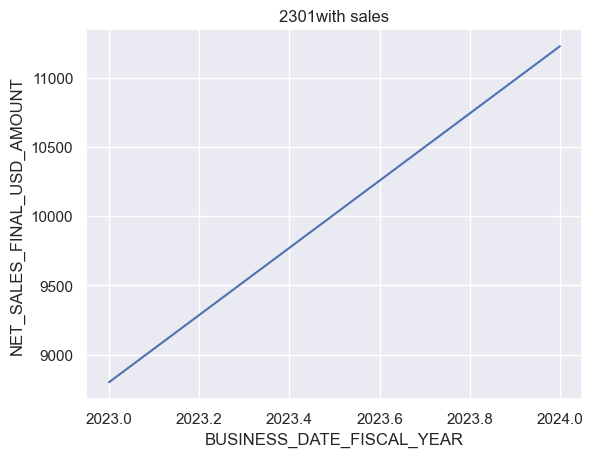

BUSINESS_DATE_FISCAL_YEAR  NET_SALES_FINAL_USD_AMOUNT     Growth
0                       2023                 8800.334646   0.000000
1                       2024                11226.000000  27.563331

In [1016]:
yearwise_growth(2301)

In [1017]:
la_stores

array([ 443,  494,  584,  672, 1415, 1752, 2301, 2311, 2364], dtype=int16)

In [1019]:
df[(df['STORE_NUMBER'].isin(la_stores))].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].mean()

BUSINESS_DATE_FISCAL_YEAR
2019    5032.938400
2020    6021.369952
2021    5957.561813
2022    6112.803684
2023    6803.352221
2024    6808.555556
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

In [1022]:
hehe = df[(df['STORE_NUMBER'].isin(la_stores))].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index()
hehe['Growth'] = hehe['NET_SALES_FINAL_USD_AMOUNT'].pct_change() * 100
hehe.fillna(0)

BUSINESS_DATE_FISCAL_YEAR  NET_SALES_FINAL_USD_AMOUNT     Growth
0                       2019                 5032.938400   0.000000
1                       2020                 6021.369952  19.639254
2                       2021                 5957.561813  -1.059695
3                       2022                 6112.803684   2.605795
4                       2023                 6803.352221  11.296756
5                       2024                 6808.555556   0.076482

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BUSINESS_DATE_FISCAL_YEAR', ylabel='NET_SALES_FINAL_USD_AMOUNT'>

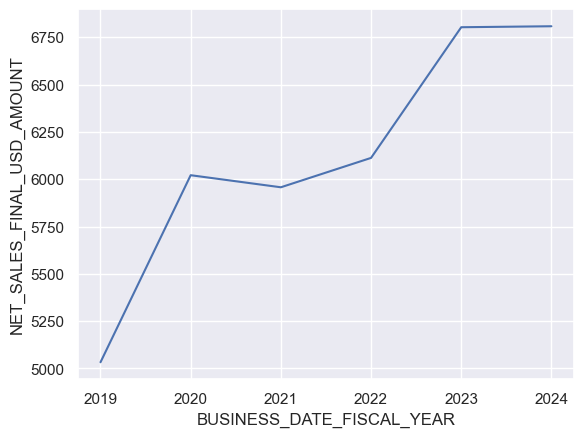

In [1023]:
sns.lineplot(data = hehe,
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 'NET_SALES_FINAL_USD_AMOUNT')

In [928]:
dataframe = df[df['STORE_NUMBER'] == 1346].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index()
dataframe['Growth'] = dataframe['NET_SALES_FINAL_USD_AMOUNT'].pct_change() * 100
dataframe.fillna(0)

BUSINESS_DATE_FISCAL_YEAR  NET_SALES_FINAL_USD_AMOUNT     Growth
0                       2019                 2529.444000   0.000000
1                       2020                 3720.538462  47.089181
2                       2021                 4396.145604  18.158854
3                       2022                 4335.819407  -1.372252
4                       2023                 5071.442308  16.966179
5                       2024                 5739.000000  13.163074

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BUSINESS_DATE_FISCAL_YEAR', ylabel='NET_SALES_FINAL_USD_AMOUNT'>

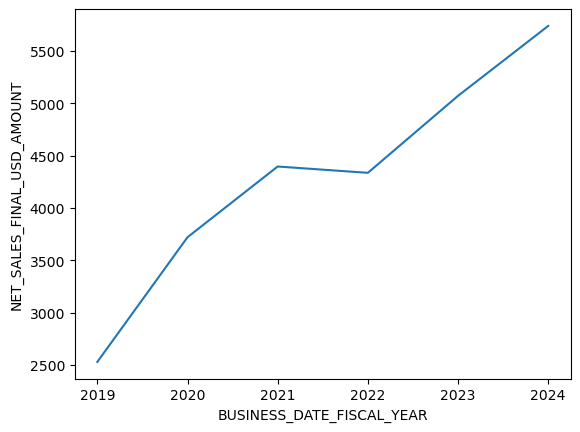

In [28]:
sns.lineplot(data = df[df['STORE_NUMBER'] == 1346].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index(),
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 'NET_SALES_FINAL_USD_AMOUNT')

In [29]:
df.head(1)

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE CLOSE_DATE  \
0        825             2        TX2       FRANCHISE 1998-05-09 1999-12-31   

  MONTH_NAME  DAY_NAME BUSINESS_DATE CITY_NAME STATE_CODE STATE_NAME  \
0   November  Thursday    2022-11-17    IRVING         TX      TEXAS   

  TIME_ZONE_NAME  DMA_ID          DMA_NAME STORE_STATUS  REGION_ID  \
0        CENTRAL     623  DALLAS-FT. WORTH       ACTIVE          1   

  REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
0   SOUTHWEST                   0      1998-05-09             OPERATIONAL   

  GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME       AREA_REGION  \
0           Domestic             DOMESTICFRANCHISE  DALLAS-FT. WORTH   

  DISPATCH_GO_LIVE_DATE DOOR_DASH_GO_LIVE_DATE DOOR_DASH_MARKUP_GO_LIVE_DATE  \
0            2019-04-17             2019-04-17                    2020-09-27   

  STORE_CONCEPT_NAME UBER_EATS_MARKUP_DATE  TEMP_CLOSE_INDICATOR  \
0           ORIGINAL            2022-07-20                     0   

   PROJECTION_INCLUDED_INDICATOR  BUSINESS_DATE_FISCAL_DAY_OF_YEAR  \
0                              0                               327   

   BUSINESS_DATE_FISCAL_YEAR  COMP_BUSINESS_DATE_FISCAL_YEAR  \
0                       2022                            2021   

   COMPARABLE_INDICATOR  TRANSACTION_FINAL_COUNT  NET_SALES_FINAL_USD_AMOUNT  \
0                     1                      128                        2314   

   PY_TRANSACTION_FINAL_COUNT  PY_NET_SALES_FINAL_USD_AMOUNT  \
0                         131                           2576   

     PROMOTION_TYPE   PROMOTION_OFFER PROMOTION_ITEM  PROMOTION_CASH_AMOUNT  \
0  Overall Discount  Overall Discount      All Items                      0   

   PROMOTION_PERCENTAGE PLATFORM FREQUENCY PROMOTION_COVERAGE  
0                   0.2       UE     Daily           National

In [36]:
 data = df[df['STORE_NUMBER'] == 1346].groupby(['MONTH_NAME','BUSINESS_DATE_FISCAL_YEAR'])['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index()
data

MONTH_NAME  BUSINESS_DATE_FISCAL_YEAR  NET_SALES_FINAL_USD_AMOUNT
0       April                       2019                 2467.625000
1       April                       2020                 3861.233333
2       April                       2021                 4767.166667
3       April                       2022                 4257.466667
4       April                       2023                 5343.200000
5      August                       2019                 2490.483871
6      August                       2020                 4152.612903
7      August                       2021                 4340.290323
8      August                       2022                 4100.903226
9      August                       2023                 4570.483871
10   December                       2019                 2487.392857
11   December                       2020                 3984.137931
12   December                       2021                 4159.966667
13   December                       2022                 4826.243243
14   December                       2023                 5505.100000
15   December                       2024                 5739.000000
16   February                       2020                 2924.000000
17   February                       2021                 4264.821429
18   February                       2022                 4092.678571
19   February                       2023                 5165.821429
20    January                       2020                 2542.129032
21    January                       2021                 4622.967742
22    January                       2022                 4270.096774
23    January                       2023                 5034.838710
24       July                       2019                 2519.451613
25       July                       2020                 4109.612903
26       July                       2021                 4379.580645
27       July                       2022                 4332.677419
28       July                       2023                 4817.225806
29       June                       2019                 2557.466667
30       June                       2020                 3686.233333
31       June                       2021                 4411.233333
32       June                       2022                 4068.500000
33       June                       2023                 4509.300000
34      March                       2020                 3076.064516
35      March                       2021                 4790.161290
36      March                       2022                 4458.838710
37      March                       2023                 5603.516129
38        May                       2019                 2692.451613
39        May                       2020                 4151.548387
40        May                       2021                 4568.709677
41        May                       2022                 4285.870968
42        May                       2023                 4831.064516
43   November                       2019                 2499.233333
44   November                       2020                 3883.666667
45   November                       2021                 3982.533333
46   November                       2022                 4205.300000
47   November                       2023                 5150.600000
48    October                       2019                 2429.290323
49    October                       2020                 4151.709677
50    October                       2021                 4136.354839
51    October                       2022                 4477.903226
52    October                       2023                 5079.645161
53  September                       2019                 2573.000000
54  September                       2020                 4110.400000
55  September                       2021                 4305.833333
56  September                       2022                 4525.666667
5

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BUSINESS_DATE_FISCAL_YEAR', ylabel='NET_SALES_FINAL_USD_AMOUNT'>

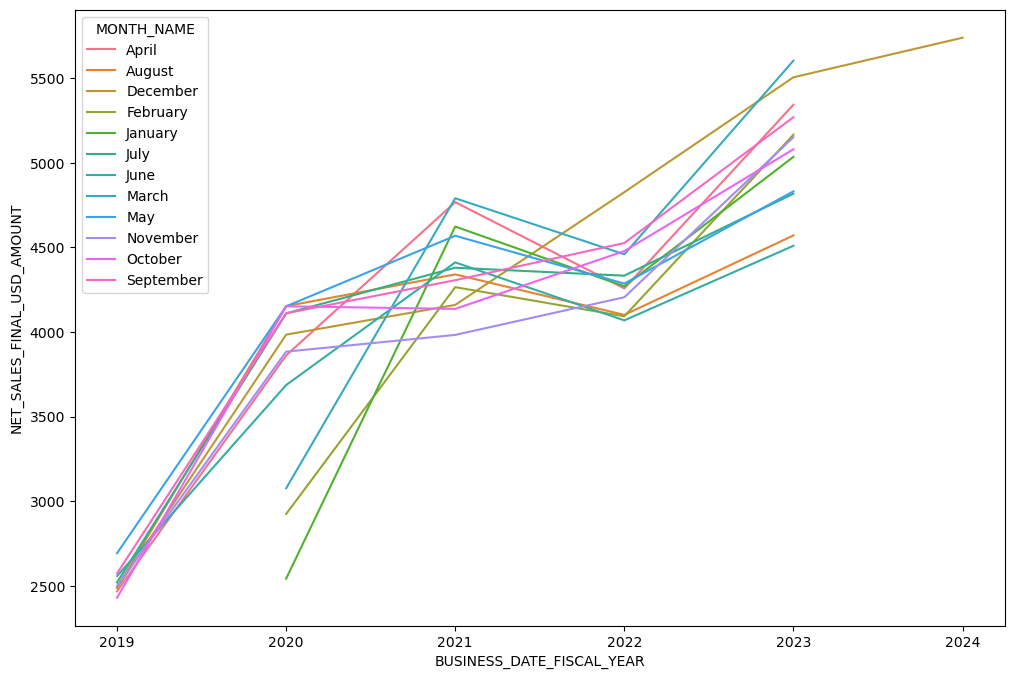

In [37]:
plt.figure(figsize=(12,8))
sns.lineplot(data = data,
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 'NET_SALES_FINAL_USD_AMOUNT',
             hue = 'MONTH_NAME')

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BUSINESS_DATE_FISCAL_YEAR', ylabel='NET_SALES_FINAL_USD_AMOUNT'>

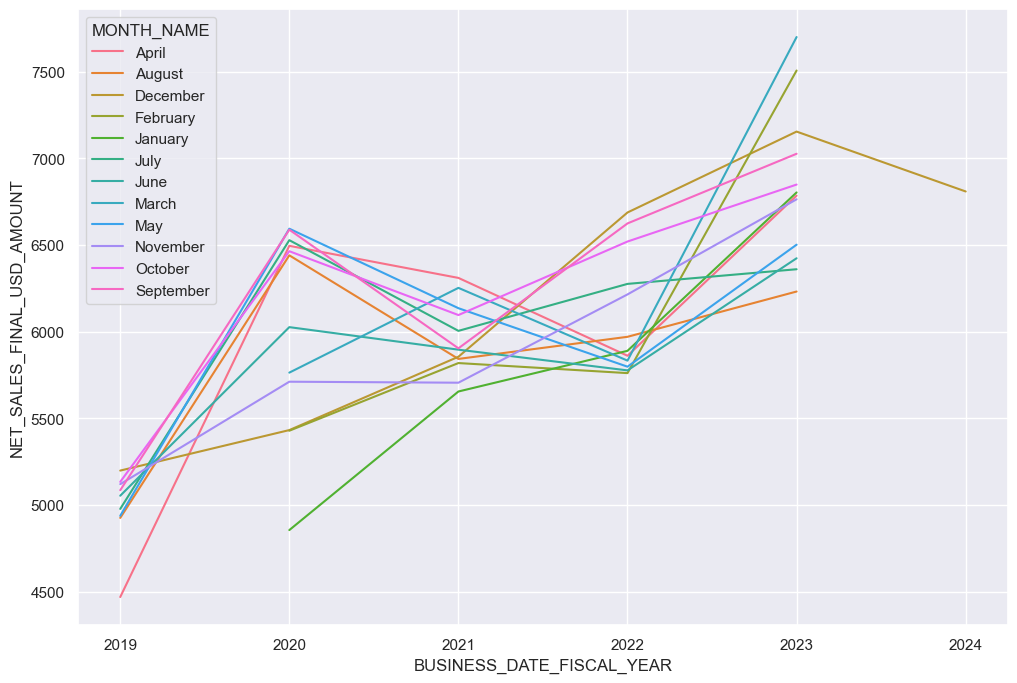

In [1025]:
plt.figure(figsize=(12,8))
sns.lineplot(data = data,
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 'NET_SALES_FINAL_USD_AMOUNT',
             hue = 'MONTH_NAME')

In [1024]:
data = df[df['CITY_NAME'] == 'LOS ANGELES'].groupby(['MONTH_NAME','BUSINESS_DATE_FISCAL_YEAR'])['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index()
data

MONTH_NAME  BUSINESS_DATE_FISCAL_YEAR  NET_SALES_FINAL_USD_AMOUNT
0       April                       2019                 4468.850000
1       April                       2020                 6495.040000
2       April                       2021                 6309.916667
3       April                       2022                 5860.800000
4       April                       2023                 6784.606635
5      August                       2019                 4925.348387
6      August                       2020                 6440.148387
7      August                       2021                 5842.548387
8      August                       2022                 5970.123656
9      August                       2023                 6231.387097
10   December                       2019                 5198.378571
11   December                       2020                 5432.052632
12   December                       2021                 5855.038889
13   December                       2022                 6687.310811
14   December                       2023                 7154.074074
15   December                       2024                 6808.555556
16   February                       2020                 5428.372414
17   February                       2021                 5818.678571
18   February                       2022                 5760.708333
19   February                       2023                 7506.303571
20    January                       2020                 4855.148387
21    January                       2021                 5654.591398
22    January                       2022                 5889.295699
23    January                       2023                 6802.983871
24       July                       2019                 4977.245161
25       July                       2020                 6527.619355
26       July                       2021                 6004.430108
27       July                       2022                 6275.397849
28       July                       2023                 6359.944444
29       June                       2019                 5053.433333
30       June                       2020                 6025.953333
31       June                       2021                 5895.955556
32       June                       2022                 5776.416667
33       June                       2023                 6423.258333
34      March                       2020                 5763.458065
35      March                       2021                 6252.494624
36      March                       2022                 5832.661290
37      March                       2023                 7699.419355
38        May                       2019                 4937.387097
39        May                       2020                 6593.832258
40        May                       2021                 6135.209677
41        May                       2022                 5797.747312
42        May                       2023                 6501.616935
43   November                       2019                 5120.020000
44   November                       2020                 5711.086957
45   November                       2021                 5705.383333
46   November                       2022                 6214.688889
47   November                       2023                 6763.414815
48    October                       2019                 5133.322581
49    October                       2020                 6463.935484
50    October                       2021                 6095.607527
51    October                       2022                 6519.774194
52    October                       2023                 6848.430108
53  September                       2019                 5085.106667
54  September                       2020                 6588.086667
55  September                       2021                 5903.644444
56  September                       2022                 6624.255556
5

In [2]:
df_stores = df[df['STORE_NUMBER'].isin(la_stores)].groupby(df[df['STORE_NUMBER'].isin(la_stores)]['BUSINESS_DATE'].dt.year).apply(lambda x: x.nlargest(10, 'NET_SALES_FINAL_USD_AMOUNT'))[['STORE_NAME','NET_SALES_FINAL_USD_AMOUNT','BUSINESS_DATE','MONTH_NAME','DAY_NAME','PROMOTION_TYPE','PROMOTION_OFFER',
                                                                                                                          'PROMOTION_ITEM','PROMOTION_CASH_AMOUNT','PROMOTION_PERCENTAGE','PLATFORM','FREQUENCY',
                                                                                                                          'PROMOTION_COVERAGE']] 
df_stores                          

NameError: name 'df' is not defined

In [43]:
df_store = df[df['STORE_NUMBER'] == 1346].groupby(df[df['STORE_NUMBER'] == 1346]['BUSINESS_DATE'].dt.year).apply(lambda x: x.nlargest(10, 'NET_SALES_FINAL_USD_AMOUNT'))[['NET_SALES_FINAL_USD_AMOUNT','BUSINESS_DATE','MONTH_NAME','DAY_NAME','PROMOTION_TYPE','PROMOTION_OFFER',
                                                                                                                          'PROMOTION_ITEM','PROMOTION_CASH_AMOUNT','PROMOTION_PERCENTAGE','PLATFORM','FREQUENCY',
                                                                                                                          'PROMOTION_COVERAGE']] 
df_store                           

NET_SALES_FINAL_USD_AMOUNT BUSINESS_DATE MONTH_NAME  \
BUSINESS_DATE                                                               
2019          399423                        4231    2019-07-29       July   
              399588                        3750    2019-08-17     August   
              399382                        3668    2019-08-09     August   
              400048                        3640    2019-05-17        May   
              399334                        3637    2019-12-31   December   
              399299                        3636    2019-11-08   November   
              399616                        3634    2019-05-24        May   
              398896                        3593    2019-05-25        May   
              400352                        3578    2019-09-20  September   
              399460                        3565    2019-05-30        May   
2020          400081                        7463    2020-02-02   February   
              399915                        7310    2020-12-31   December   
              399272                        6231    2020-12-18   December   
              399746                        6127    2020-04-18      April   
              400299                        6074    2020-12-26   December   
              399226                        5740    2020-09-04  September   
              400173                        5625    2020-10-31    October   
              399531                        5577    2020-12-19   December   
              400142                        5572    2020-09-27  September   
              398737                        5466    2020-12-04   December   
2021          398998                        9850    2021-02-07   February   
              399540                        6903    2021-03-20      March   
              400324                        6671    2021-04-30      April   
              400251                        6510    2021-03-28      March   
              399709                        6475    2021-04-24      April   
              399699                        6357    2021-01-24    January   
              400165                        6250    2021-08-20     August   
              400286                        6173    2021-09-19  September   
              398764                        6169    2021-01-01    January   
              399353                        6123    2021-01-22    January   
2022          398966                        9126    2022-02-13   February   
              399785                        7386    2022-12-02   December   
              398699                        7320    2022-12-31   December   
              400333                        7011    2022-09-02  September   
              398795                        6787    2022-12-10   December   
              400037                        6673    2022-10-14    October   
              398676                        6386    2022-12-30   December   
              399307                        6184    2022-09-09  September   
              400077                        6180    2022-10-28    October   
              400180                        6139    2022-01-09    January   
2023          400092                       12132    2023-02-12   February   
              399642                        8081    2023-04-22      April   
              400377                        8035    2023-04-28      April   
              399874                        7803    2023-12-02   December   
              399604                        7719    2023-12-09   December   
              399294                        7630    2023-09-01  September   
              399757                        7594    2023-09-30  September   
              399242                        7563    2023-03-18      March   
              400058                        7368    2023-03-31      March   
              399117                        7366    2023-01-07    January   

                 

AttributeError: 'numpy.int16' object has no attribute 'startswith'

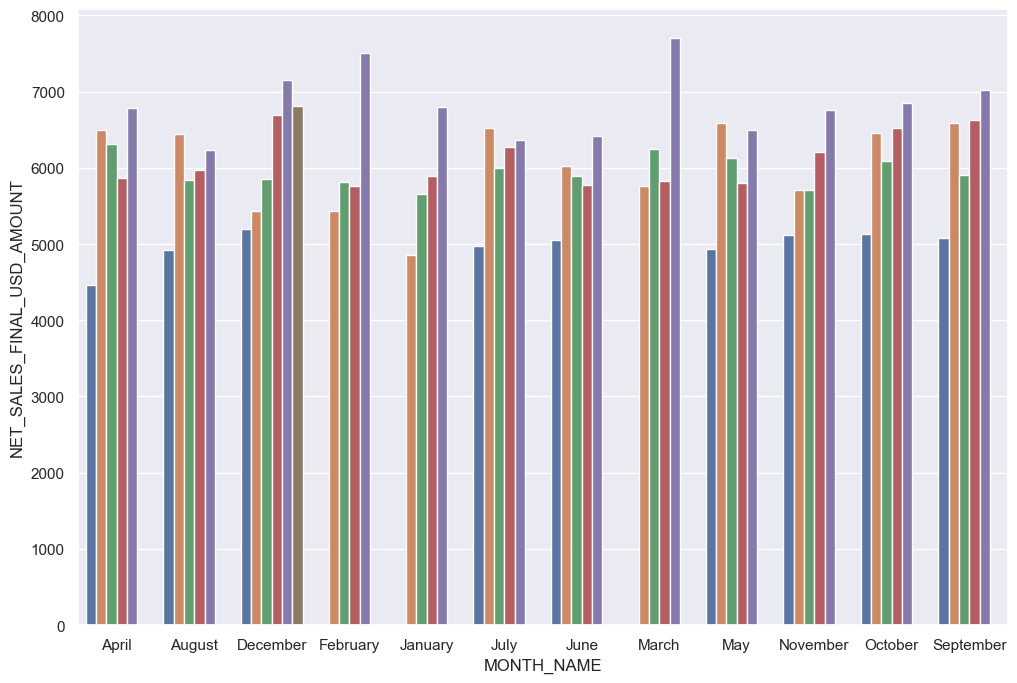

In [1026]:
plt.figure(figsize=(12,8))
sns.barplot(data = data , x = 'MONTH_NAME', y = 'NET_SALES_FINAL_USD_AMOUNT' , hue = 'BUSINESS_DATE_FISCAL_YEAR')

In [ ]:
# THIS IS BASICALLY FOLLOWING THE SAME TREND OVER THE YEARS

In [58]:
store_1346 = store_1346.sort_values('BUSINESS_DATE')
store_1346

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
399330       2127          1346     CA1346       FRANCHISE 2017-11-20   
400016       2127          1346     CA1346       FRANCHISE 2017-11-20   
399745       2127          1346     CA1346       FRANCHISE 2017-11-20   
400190       2127          1346     CA1346       FRANCHISE 2017-11-20   
399568       2127          1346     CA1346       FRANCHISE 2017-11-20   
...           ...           ...        ...             ...        ...   
399094       2127          1346     CA1346       FRANCHISE 2017-11-20   
399450       2127          1346     CA1346       FRANCHISE 2017-11-20   
399618       2127          1346     CA1346       FRANCHISE 2017-11-20   
399837       2127          1346     CA1346       FRANCHISE 2017-11-20   
399411       2127          1346     CA1346       FRANCHISE 2017-11-20   

       CLOSE_DATE MONTH_NAME   DAY_NAME BUSINESS_DATE     CITY_NAME  \
399330 1999-12-31      April    Tuesday    2019-04-23  APPLE VALLEY   
400016 1999-12-31      April  Wednesday    2019-04-24  APPLE VALLEY   
399745 1999-12-31      April   Thursday    2019-04-25  APPLE VALLEY   
400190 1999-12-31      April     Friday    2019-04-26  APPLE VALLEY   
399568 1999-12-31      April   Saturday    2019-04-27  APPLE VALLEY   
...           ...        ...        ...           ...           ...   
399094 1999-12-31   December  Wednesday    2023-12-27  APPLE VALLEY   
399450 1999-12-31   December   Thursday    2023-12-28  APPLE VALLEY   
399618 1999-12-31   December     Friday    2023-12-29  APPLE VALLEY   
399837 1999-12-31   December   Saturday    2023-12-30  APPLE VALLEY   
399411 1999-12-31   December     Sunday    2023-12-31  APPLE VALLEY   

       STATE_CODE  STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME  \
399330         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
400016         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
399745         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
400190         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
399568         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
...           ...         ...            ...     ...          ...   
399094         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
399450         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
399618         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
399837         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
399411         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   

       STORE_STATUS  REGION_ID REGION_NAME  PRIOR_STORE_NUMBER  \
399330       ACTIVE          4        WEST                   0   
400016       ACTIVE          4        WEST                   0   
399745       ACTIVE          4        WEST                   0   
400190       ACTIVE          4        WEST                   0   
399568       ACTIVE          4        WEST                   0   
...             ...        ...         ...                 ...   
399094       ACTIVE          4        WEST                   0   
399450       ACTIVE          4        WEST                   0   
399618       ACTIVE          4        WEST                   0   
399837       ACTIVE          4        WEST                   0   
399411       ACTIVE          4        WEST                   0   

       STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS GLOBAL_REGION_NAME  \
399330      2017-11-20             OPERATIONAL           Domestic   
400016      2017-11-20             OPERATIONAL           Domestic   
399745      2017-11-20             OPERATIONAL           Domestic   
400190      2017-11-20             OPERATIONAL           Domestic   
399568      2017-11-20             OPERATIONAL           Domestic   
...                ...                     ...                ...   
399094      2017-11-20             OPERATIONAL           Domestic   
399450      2017-11-20             OPERATIONAL           Domestic   
399618      2017-11-20             

In [65]:
store_13461 = store_1346.copy()

In [73]:
store_1346.set_index('BUSINESS_DATE', inplace=True)

In [641]:
store_1346['NET_SALES_FINAL_USD_AMOUNT'].resample('Q').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [78]:
store_13461['NET_SALES_FINAL_USD_AMOUNT_RESAMPLED'] = store_1346['NET_SALES_FINAL_USD_AMOUNT'].resample('Q').mean()

In [62]:
store_1346['NET_SALES_FINAL_USD_AMOUNT'].rolling(30).mean().fillna(0)

399330       0.000000
400016       0.000000
399745       0.000000
400190       0.000000
399568       0.000000
             ...     
399094    5336.133333
399450    5372.433333
399618    5442.400000
399837    5505.100000
399411    5483.366667
Name: NET_SALES_FINAL_USD_AMOUNT, Length: 1714, dtype: float64

In [63]:
store_1346

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
399330       2127          1346     CA1346       FRANCHISE 2017-11-20   
400016       2127          1346     CA1346       FRANCHISE 2017-11-20   
399745       2127          1346     CA1346       FRANCHISE 2017-11-20   
400190       2127          1346     CA1346       FRANCHISE 2017-11-20   
399568       2127          1346     CA1346       FRANCHISE 2017-11-20   
...           ...           ...        ...             ...        ...   
399094       2127          1346     CA1346       FRANCHISE 2017-11-20   
399450       2127          1346     CA1346       FRANCHISE 2017-11-20   
399618       2127          1346     CA1346       FRANCHISE 2017-11-20   
399837       2127          1346     CA1346       FRANCHISE 2017-11-20   
399411       2127          1346     CA1346       FRANCHISE 2017-11-20   

       CLOSE_DATE MONTH_NAME   DAY_NAME BUSINESS_DATE     CITY_NAME  \
399330 1999-12-31      April    Tuesday    2019-04-23  APPLE VALLEY   
400016 1999-12-31      April  Wednesday    2019-04-24  APPLE VALLEY   
399745 1999-12-31      April   Thursday    2019-04-25  APPLE VALLEY   
400190 1999-12-31      April     Friday    2019-04-26  APPLE VALLEY   
399568 1999-12-31      April   Saturday    2019-04-27  APPLE VALLEY   
...           ...        ...        ...           ...           ...   
399094 1999-12-31   December  Wednesday    2023-12-27  APPLE VALLEY   
399450 1999-12-31   December   Thursday    2023-12-28  APPLE VALLEY   
399618 1999-12-31   December     Friday    2023-12-29  APPLE VALLEY   
399837 1999-12-31   December   Saturday    2023-12-30  APPLE VALLEY   
399411 1999-12-31   December     Sunday    2023-12-31  APPLE VALLEY   

       STATE_CODE  STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME  \
399330         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
400016         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
399745         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
400190         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
399568         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
...           ...         ...            ...     ...          ...   
399094         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
399450         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
399618         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
399837         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   
399411         CA  CALIFORNIA        PACIFIC     803  LOS ANGELES   

       STORE_STATUS  REGION_ID REGION_NAME  PRIOR_STORE_NUMBER  \
399330       ACTIVE          4        WEST                   0   
400016       ACTIVE          4        WEST                   0   
399745       ACTIVE          4        WEST                   0   
400190       ACTIVE          4        WEST                   0   
399568       ACTIVE          4        WEST                   0   
...             ...        ...         ...                 ...   
399094       ACTIVE          4        WEST                   0   
399450       ACTIVE          4        WEST                   0   
399618       ACTIVE          4        WEST                   0   
399837       ACTIVE          4        WEST                   0   
399411       ACTIVE          4        WEST                   0   

       STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS GLOBAL_REGION_NAME  \
399330      2017-11-20             OPERATIONAL           Domestic   
400016      2017-11-20             OPERATIONAL           Domestic   
399745      2017-11-20             OPERATIONAL           Domestic   
400190      2017-11-20             OPERATIONAL           Domestic   
399568      2017-11-20             OPERATIONAL           Domestic   
...                ...                     ...                ...   
399094      2017-11-20             OPERATIONAL           Domestic   
399450      2017-11-20             OPERATIONAL           Domestic   
399618      2017-11-20             

In [91]:
df[df['STORE_NUMBER'] == 1346]

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
398676       2127          1346     CA1346       FRANCHISE 2017-11-20   
398677       2127          1346     CA1346       FRANCHISE 2017-11-20   
398678       2127          1346     CA1346       FRANCHISE 2017-11-20   
398679       2127          1346     CA1346       FRANCHISE 2017-11-20   
398680       2127          1346     CA1346       FRANCHISE 2017-11-20   
...           ...           ...        ...             ...        ...   
400385       2127          1346     CA1346       FRANCHISE 2017-11-20   
400386       2127          1346     CA1346       FRANCHISE 2017-11-20   
400387       2127          1346     CA1346       FRANCHISE 2017-11-20   
400388       2127          1346     CA1346       FRANCHISE 2017-11-20   
400389       2127          1346     CA1346       FRANCHISE 2017-11-20   

       CLOSE_DATE MONTH_NAME  DAY_NAME BUSINESS_DATE     CITY_NAME STATE_CODE  \
398676 1999-12-31   December    Friday    2022-12-30  APPLE VALLEY         CA   
398677 1999-12-31  September    Friday    2023-09-22  APPLE VALLEY         CA   
398678 1999-12-31     August    Friday    2023-08-25  APPLE VALLEY         CA   
398679 1999-12-31   November    Monday    2023-11-20  APPLE VALLEY         CA   
398680 1999-12-31        May    Friday    2023-05-26  APPLE VALLEY         CA   
...           ...        ...       ...           ...           ...        ...   
400385 1999-12-31  September  Thursday    2019-09-26  APPLE VALLEY         CA   
400386 1999-12-31      April  Saturday    2020-04-04  APPLE VALLEY         CA   
400387 1999-12-31   November  Thursday    2019-11-21  APPLE VALLEY         CA   
400388 1999-12-31        May  Thursday    2019-05-09  APPLE VALLEY         CA   
400389 1999-12-31        May  Saturday    2019-05-04  APPLE VALLEY         CA   

        STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  \
398676  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
398677  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
398678  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
398679  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
398680  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
...            ...            ...     ...          ...          ...   
400385  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
400386  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
400387  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
400388  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
400389  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   

        REGION_ID REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE  \
398676          4        WEST                   0      2017-11-20   
398677          4        WEST                   0      2017-11-20   
398678          4        WEST                   0      2017-11-20   
398679          4        WEST                   0      2017-11-20   
398680          4        WEST                   0      2017-11-20   
...           ...         ...                 ...             ...   
400385          4        WEST                   0      2017-11-20   
400386          4        WEST                   0      2017-11-20   
400387          4        WEST                   0      2017-11-20   
400388          4        WEST                   0      2017-11-20   
400389          4        WEST                   0      2017-11-20   

       STORE_FUNCTIONAL_STATUS GLOBAL_REGION_NAME  \
398676             OPERATIONAL           Domestic   
398677             OPERATIONAL           Domestic   
398678             OPERATIONAL           Domestic   
398679             OPERATIONAL           Domestic   
398680             OPERATIONAL           Domestic   
...                        ...                ...   
400385             OPERATIONAL           Domestic   
400386             OPERATIONAL           Domestic   

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='REGION_NAME', ylabel='NET_SALES_FINAL_USD_AMOUNT'>

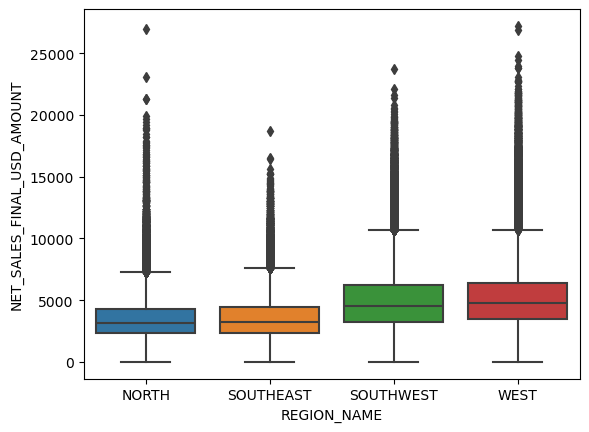

In [93]:
sns.boxplot(data = df, x = 'REGION_NAME', y = 'NET_SALES_FINAL_USD_AMOUNT')

In [97]:
store_1346

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
BUSINESS_DATE                                                                  
2019-04-23          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-24          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-25          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-26          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-27          2127          1346     CA1346       FRANCHISE 2017-11-20   
...                  ...           ...        ...             ...        ...   
2023-12-27          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-28          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-29          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-30          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-31          2127          1346     CA1346       FRANCHISE 2017-11-20   

              CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
BUSINESS_DATE                                                             
2019-04-23    1999-12-31      April    Tuesday  APPLE VALLEY         CA   
2019-04-24    1999-12-31      April  Wednesday  APPLE VALLEY         CA   
2019-04-25    1999-12-31      April   Thursday  APPLE VALLEY         CA   
2019-04-26    1999-12-31      April     Friday  APPLE VALLEY         CA   
2019-04-27    1999-12-31      April   Saturday  APPLE VALLEY         CA   
...                  ...        ...        ...           ...        ...   
2023-12-27    1999-12-31   December  Wednesday  APPLE VALLEY         CA   
2023-12-28    1999-12-31   December   Thursday  APPLE VALLEY         CA   
2023-12-29    1999-12-31   December     Friday  APPLE VALLEY         CA   
2023-12-30    1999-12-31   December   Saturday  APPLE VALLEY         CA   
2023-12-31    1999-12-31   December     Sunday  APPLE VALLEY         CA   

               STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  \
BUSINESS_DATE                                                                
2019-04-23     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-24     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-25     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-26     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-27     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
...                   ...            ...     ...          ...          ...   
2023-12-27     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-28     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-29     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-30     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-31     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   

               REGION_ID REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE  \
BUSINESS_DATE                                                              
2019-04-23             4        WEST                   0      2017-11-20   
2019-04-24             4        WEST                   0      2017-11-20   
2019-04-25             4        WEST                   0      2017-11-20   
2019-04-26             4        WEST                   0      2017-11-20   
2019-04-27             4        WEST                   0      2017-11-20   
...                  ...         ...                 ...             ...   
2023-12-27             4        WEST                   0      2017-11-20   
2023-12-28             4        WEST                   0      2017-11-20   
2023-12-29             4        WEST                   0      2017-11-20   
2023-12-30             4        WEST                   0      2017-11-20   
2023-12-31             4        WEST                   0      2017-11-2

In [104]:
hehe = store_1346['NET_SALES_FINAL_USD_AMOUNT'].resample('Q').mean().reset_index()
hehe

BUSINESS_DATE  NET_SALES_FINAL_USD_AMOUNT
0     2019-06-30                 2607.695652
1     2019-09-30                 2527.152174
2     2019-12-31                 2498.380435
3     2020-03-31                 2845.714286
4     2020-06-30                 3902.439560
5     2020-09-30                 4124.358696
6     2020-12-31                 4069.315217
7     2021-03-31                 4569.133333
8     2021-06-30                 4582.219780
9     2021-09-30                 4342.293478
10    2021-12-31                 4091.293478
11    2022-03-31                 4279.911111
12    2022-06-30                 4204.846154
13    2022-09-30                 4317.510870
14    2022-12-31                 4522.880435
15    2023-03-31                 5271.466667
16    2023-06-30                 4893.824176
17    2023-09-30                 4881.467391
18    2023-12-31                 5248.684783

In [4]:
hehe1 = df['TRANSACTION_FINAL_COUNT'].resample('Q').mean().reset_index()

NameError: name 'df' is not defined

In [112]:
merged = pd.merge(how = 'inner',
                left = hehe,
                right = hehe1,
                 on = 'BUSINESS_DATE')

In [116]:
merged['TRANSACTION_SIZE'] = merged['TRANSACTION_FINAL_COUNT'] * 10

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


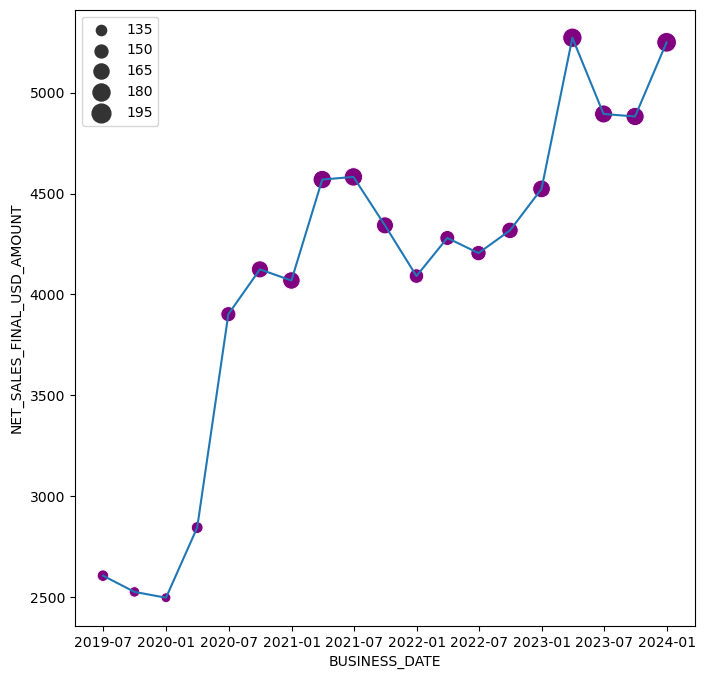

In [124]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = merged, 
                 x = 'BUSINESS_DATE',
                 y = 'NET_SALES_FINAL_USD_AMOUNT',
                 size = 'TRANSACTION_FINAL_COUNT',
                 sizes = (50,200), 
                 color = 'purple')
sns.lineplot(data = merged, 
                 x = 'BUSINESS_DATE',
                 y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.show()

In [127]:
merged['PER_QUANTITY_SALE'] = merged['NET_SALES_FINAL_USD_AMOUNT'] / merged['TRANSACTION_FINAL_COUNT']
merged

BUSINESS_DATE  NET_SALES_FINAL_USD_AMOUNT  TRANSACTION_FINAL_COUNT  \
0     2019-06-30                 2607.695652               141.753623   
1     2019-09-30                 2527.152174               136.380435   
2     2019-12-31                 2498.380435               132.978261   
3     2020-03-31                 2845.714286               143.406593   
4     2020-06-30                 3902.439560               165.175824   
5     2020-09-30                 4124.358696               180.423913   
6     2020-12-31                 4069.315217               183.902174   
7     2021-03-31                 4569.133333               191.588889   
8     2021-06-30                 4582.219780               191.923077   
9     2021-09-30                 4342.293478               180.130435   
10    2021-12-31                 4091.293478               161.000000   
11    2022-03-31                 4279.911111               163.855556   
12    2022-06-30                 4204.846154               166.527473   
13    2022-09-30                 4317.510870               175.304348   
14    2022-12-31                 4522.880435               185.565217   
15    2023-03-31                 5271.466667               200.344444   
16    2023-06-30                 4893.824176               188.329670   
17    2023-09-30                 4881.467391               190.271739   
18    2023-12-31                 5248.684783               203.152174   

    TRANSACTION_SIZE  PER_QUANTITY_SALE  
0        1417.536232          18.395972  
1        1363.804348          18.530167  
2        1329.782609          18.787886  
3        1434.065934          19.843678  
4        1651.758242          23.625973  
5        1804.239130          22.859269  
6        1839.021739          22.127608  
7        1915.888889          23.848634  
8        1919.230769          23.875293  
9        1801.304348          24.106384  
10       1610.000000          25.411761  
11       1638.555556          26.120024  
12       1665.274725          25.250165  
13       1753.043478          24.628658  
14       1855.652174          24.373536  
15       2003.444444          26.312018  
16       1883.296703          25.985413  
17       1902.717391          25.655241  
18       2031.521739          25.836223

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

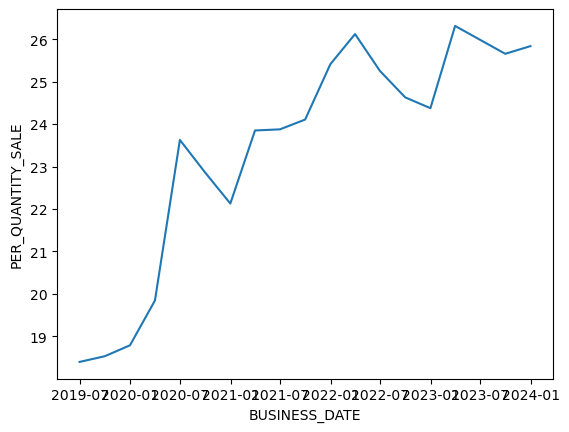

In [130]:
sns.lineplot(data = merged, 
                 x = 'BUSINESS_DATE',
                 y = 'PER_QUANTITY_SALE')
plt.plot()

In [131]:
store_1346

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
BUSINESS_DATE                                                                  
2019-04-23          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-24          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-25          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-26          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-27          2127          1346     CA1346       FRANCHISE 2017-11-20   
...                  ...           ...        ...             ...        ...   
2023-12-27          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-28          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-29          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-30          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-31          2127          1346     CA1346       FRANCHISE 2017-11-20   

              CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
BUSINESS_DATE                                                             
2019-04-23    1999-12-31      April    Tuesday  APPLE VALLEY         CA   
2019-04-24    1999-12-31      April  Wednesday  APPLE VALLEY         CA   
2019-04-25    1999-12-31      April   Thursday  APPLE VALLEY         CA   
2019-04-26    1999-12-31      April     Friday  APPLE VALLEY         CA   
2019-04-27    1999-12-31      April   Saturday  APPLE VALLEY         CA   
...                  ...        ...        ...           ...        ...   
2023-12-27    1999-12-31   December  Wednesday  APPLE VALLEY         CA   
2023-12-28    1999-12-31   December   Thursday  APPLE VALLEY         CA   
2023-12-29    1999-12-31   December     Friday  APPLE VALLEY         CA   
2023-12-30    1999-12-31   December   Saturday  APPLE VALLEY         CA   
2023-12-31    1999-12-31   December     Sunday  APPLE VALLEY         CA   

               STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  \
BUSINESS_DATE                                                                
2019-04-23     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-24     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-25     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-26     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-27     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
...                   ...            ...     ...          ...          ...   
2023-12-27     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-28     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-29     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-30     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-31     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   

               REGION_ID REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE  \
BUSINESS_DATE                                                              
2019-04-23             4        WEST                   0      2017-11-20   
2019-04-24             4        WEST                   0      2017-11-20   
2019-04-25             4        WEST                   0      2017-11-20   
2019-04-26             4        WEST                   0      2017-11-20   
2019-04-27             4        WEST                   0      2017-11-20   
...                  ...         ...                 ...             ...   
2023-12-27             4        WEST                   0      2017-11-20   
2023-12-28             4        WEST                   0      2017-11-20   
2023-12-29             4        WEST                   0      2017-11-20   
2023-12-30             4        WEST                   0      2017-11-20   
2023-12-31             4        WEST                   0      2017-11-2

In [134]:
store_1346['NET_SALES_FINAL_USD_AMOUNT'].rolling(30).mean().fillna(0).reset_index()

BUSINESS_DATE  NET_SALES_FINAL_USD_AMOUNT
0       2019-04-23                    0.000000
1       2019-04-24                    0.000000
2       2019-04-25                    0.000000
3       2019-04-26                    0.000000
4       2019-04-27                    0.000000
...            ...                         ...
1709    2023-12-27                 5336.133333
1710    2023-12-28                 5372.433333
1711    2023-12-29                 5442.400000
1712    2023-12-30                 5505.100000
1713    2023-12-31                 5483.366667

[1714 rows x 2 columns]

In [137]:
store_1346.head(1)

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
BUSINESS_DATE                                                                  
2019-04-23          2127          1346     CA1346       FRANCHISE 2017-11-20   

              CLOSE_DATE MONTH_NAME DAY_NAME     CITY_NAME STATE_CODE  \
BUSINESS_DATE                                                           
2019-04-23    1999-12-31      April  Tuesday  APPLE VALLEY         CA   

               STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  \
BUSINESS_DATE                                                                
2019-04-23     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   

               REGION_ID REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE  \
BUSINESS_DATE                                                              
2019-04-23             4        WEST                   0      2017-11-20   

              STORE_FUNCTIONAL_STATUS GLOBAL_REGION_NAME  \
BUSINESS_DATE                                              
2019-04-23                OPERATIONAL           Domestic   

              GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
BUSINESS_DATE                                              
2019-04-23                DOMESTICFRANCHISE  LOS ANGELES   

              DISPATCH_GO_LIVE_DATE DOOR_DASH_GO_LIVE_DATE  \
BUSINESS_DATE                                                
2019-04-23               2018-11-14             2018-11-14   

              DOOR_DASH_MARKUP_GO_LIVE_DATE STORE_CONCEPT_NAME  \
BUSINESS_DATE                                                    
2019-04-23                       2020-09-27           ORIGINAL   

              UBER_EATS_MARKUP_DATE  TEMP_CLOSE_INDICATOR  \
BUSINESS_DATE                                               
2019-04-23               2017-11-20                     0   

               PROJECTION_INCLUDED_INDICATOR  \
BUSINESS_DATE                                  
2019-04-23                                 0   

               BUSINESS_DATE_FISCAL_DAY_OF_YEAR  BUSINESS_DATE_FISCAL_YEAR  \
BUSINESS_DATE                                                                
2019-04-23                                  115                       2019   

               COMP_BUSINESS_DATE_FISCAL_YEAR  COMPARABLE_INDICATOR  \
BUSINESS_DATE                                                         
2019-04-23                               2018                     0   

               TRANSACTION_FINAL_COUNT  NET_SALES_FINAL_USD_AMOUNT  \
BUSINESS_DATE                                                        
2019-04-23                         139                        1943   

               PY_TRANSACTION_FINAL_COUNT  PY_NET_SALES_FINAL_USD_AMOUNT  \
BUSINESS_DATE                                                              
2019-04-23                              0                              0   

              PROMOTION_TYPE PROMOTION_OFFER PROMOTION_ITEM  \
BUSINESS_DATE                                                 
2019-04-23      No Promotion       No Offers       No Items   

               PROMOTION_CASH_AMOUNT  PROMOTION_PERCENTAGE     PLATFORM  \
BUSINESS_DATE                                                             
2019-04-23                         0                   0.0  No Platform   

              FREQUENCY PROMOTION_COVERAGE  \
BUSINESS_DATE                                
2019-04-23         None               None   

               NET_SALES_FINAL_USD_AMOUNT_RESAMPLED  
BUSINESS_DATE                                        
2019-04-23                                      NaN

In [141]:
store_13461 = store_13461.reset_index()
store_13461.head(1)

index BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
0      0    2019-04-23       2127          1346     CA1346       FRANCHISE   

   OPEN_DATE CLOSE_DATE MONTH_NAME DAY_NAME     CITY_NAME STATE_CODE  \
0 2017-11-20 1999-12-31      April  Tuesday  APPLE VALLEY         CA   

   STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
0  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

  REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
0        WEST                   0      2017-11-20             OPERATIONAL   

  GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
0           Domestic             DOMESTICFRANCHISE  LOS ANGELES   

  DISPATCH_GO_LIVE_DATE DOOR_DASH_GO_LIVE_DATE DOOR_DASH_MARKUP_GO_LIVE_DATE  \
0            2018-11-14             2018-11-14                    2020-09-27   

  STORE_CONCEPT_NAME UBER_EATS_MARKUP_DATE  TEMP_CLOSE_INDICATOR  \
0           ORIGINAL            2017-11-20                     0   

   PROJECTION_INCLUDED_INDICATOR  BUSINESS_DATE_FISCAL_DAY_OF_YEAR  \
0                              0                               115   

   BUSINESS_DATE_FISCAL_YEAR  COMP_BUSINESS_DATE_FISCAL_YEAR  \
0                       2019                            2018   

   COMPARABLE_INDICATOR  TRANSACTION_FINAL_COUNT  NET_SALES_FINAL_USD_AMOUNT  \
0                     0                      139                        1943   

   PY_TRANSACTION_FINAL_COUNT  PY_NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE  \
0                           0                              0   No Promotion   

  PROMOTION_OFFER PROMOTION_ITEM  PROMOTION_CASH_AMOUNT  PROMOTION_PERCENTAGE  \
0       No Offers       No Items                      0                   0.0   

      PLATFORM FREQUENCY PROMOTION_COVERAGE  \
0  No Platform      None               None   

   NET_SALES_FINAL_USD_AMOUNT_RESAMPLED  
0                                   NaN

C:\Users\yashd\AppData\Local\Temp\ipykernel_14444\1612166983.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot( data = store_1346['NET_SALES_FINAL_USD_AMOUNT'].rolling(30).mean().fillna(method = 'bfill').reset_index(),
C:\Users\yashd\AppData\Local\Temp\ipykernel_14444\1612166983.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x = store_1346['NET_SALES_FINAL_USD_AMOUNT'].rolling(30).mean().fillna(method = 'bfill').reset_index()['BUSINESS_DATE'],
C:\Users\yashd\AppData\Local\Temp\ipykernel_14444\1612166983.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y =  store_1346['NET_SALES_FINAL_USD_AMOUNT'].rolling(30).mean().fillna(method = 'bfill').reset_index()['NET_SALES_FINAL_USD_AMOUNT'])
C:\Users\yashd\an

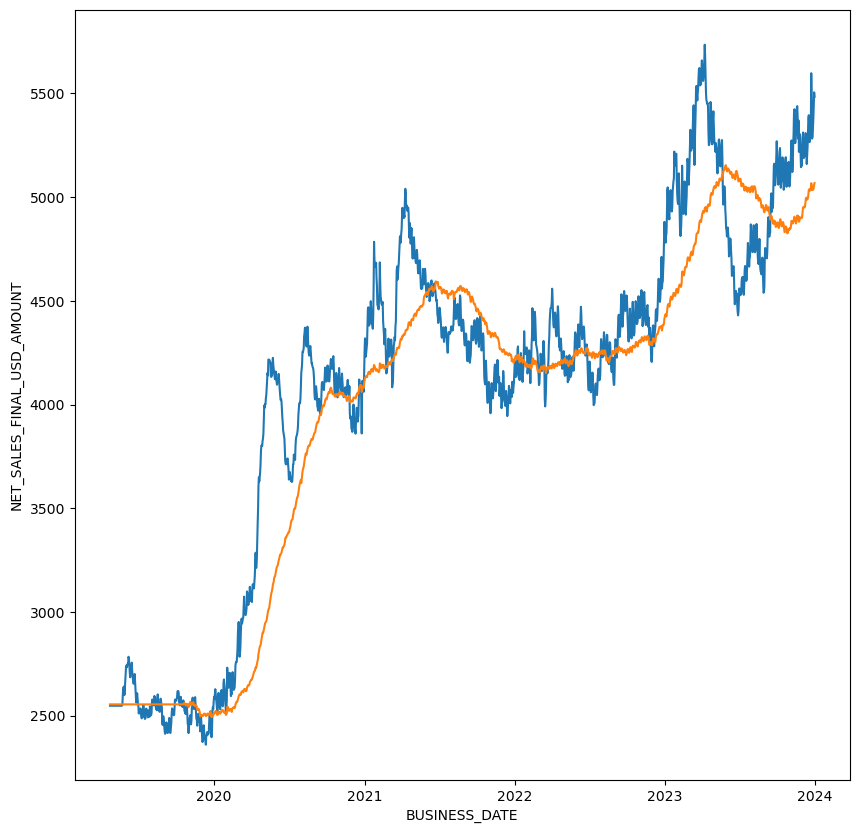

In [151]:
plt.figure(figsize = (10,10))
sns.lineplot( data = store_1346['NET_SALES_FINAL_USD_AMOUNT'].rolling(30).mean().fillna(method = 'bfill').reset_index(),
              x = store_1346['NET_SALES_FINAL_USD_AMOUNT'].rolling(30).mean().fillna(method = 'bfill').reset_index()['BUSINESS_DATE'],
              y =  store_1346['NET_SALES_FINAL_USD_AMOUNT'].rolling(30).mean().fillna(method = 'bfill').reset_index()['NET_SALES_FINAL_USD_AMOUNT'])
sns.lineplot( data = store_1346['NET_SALES_FINAL_USD_AMOUNT'].rolling(180).mean().fillna(method = 'bfill').reset_index(),
              x = store_1346['NET_SALES_FINAL_USD_AMOUNT'].rolling(180).mean().fillna(method = 'bfill').reset_index()['BUSINESS_DATE'],
              y =  store_1346['NET_SALES_FINAL_USD_AMOUNT'].rolling(180).mean().fillna(method = 'bfill').reset_index()['NET_SALES_FINAL_USD_AMOUNT'])
plt.show()


In [152]:
holidays_and_events_2019 = [
    '2019-01-01',  # New Year's Day
    '2019-01-21',  # Martin Luther King Jr. Day
    '2019-02-03',  # Super Bowl Sunday
    '2019-02-14',  # Valentine's Day
    '2019-02-18',  # Presidents' Day
    '2019-03-17',  # St. Patrick's Day
    '2019-04-21',  # Easter Sunday
    '2019-05-12',  # Mother's Day
    '2019-05-27',  # Memorial Day
    '2019-06-16',  # Father's Day
    '2019-07-04',  # Independence Day
    '2019-09-02',  # Labor Day
    '2019-10-14',  # Columbus Day
    '2019-10-31',  # Halloween
    '2019-11-11',  # Veterans Day
    '2019-11-28',  # Thanksgiving Day
    '2019-11-29',  # Black Friday
    '2019-11-30',  # Small Business Saturday
    '2019-12-02',  # Cyber Monday
    '2019-12-24',  # Christmas Eve
    '2019-12-25',  # Christmas Day
    '2019-12-31'   # New Year's Eve
]
holidays_and_events_2020 = [
    '2020-01-01',  # New Year's Day
    '2020-01-20',  # Martin Luther King Jr. Day
    '2020-02-02',  # Super Bowl Sunday
    '2020-02-14',  # Valentine's Day
    '2020-02-17',  # Presidents' Day
    '2020-03-17',  # St. Patrick's Day
    '2020-04-12',  # Easter Sunday
    '2020-05-10',  # Mother's Day
    '2020-05-25',  # Memorial Day
    '2020-06-21',  # Father's Day
    '2020-07-04',  # Independence Day
    '2020-09-07',  # Labor Day
    '2020-10-12',  # Columbus Day
    '2020-10-31',  # Halloween
    '2020-11-11',  # Veterans Day
    '2020-11-26',  # Thanksgiving Day
    '2020-11-27',  # Black Friday
    '2020-11-28',  # Small Business Saturday
    '2020-11-30',  # Cyber Monday
    '2020-12-24',  # Christmas Eve
    '2020-12-25',  # Christmas Day
    '2020-12-31'   # New Year's Eve
]

holidays_and_events_2021 = [
    '2021-01-01',  # New Year's Day
    '2021-01-18',  # Martin Luther King Jr. Day
    '2021-02-07',  # Super Bowl Sunday
    '2021-02-14',  # Valentine's Day
    '2021-02-15',  # Presidents' Day
    '2021-03-17',  # St. Patrick's Day
    '2021-04-04',  # Easter Sunday
    '2021-05-09',  # Mother's Day
    '2021-05-31',  # Memorial Day
    '2021-06-20',  # Father's Day
    '2021-07-04',  # Independence Day
    '2021-09-06',  # Labor Day
    '2021-10-11',  # Columbus Day
    '2021-10-31',  # Halloween
    '2021-11-11',  # Veterans Day
    '2021-11-25',  # Thanksgiving Day
    '2021-11-26',  # Black Friday
    '2021-11-27',  # Small Business Saturday
    '2021-11-29',  # Cyber Monday
    '2021-12-24',  # Christmas Eve
    '2021-12-25',  # Christmas Day
    '2021-12-31'   # New Year's Eve
]

holidays_and_events_2022 = [
    '2022-01-01',  # New Year's Day
    '2022-01-17',  # Martin Luther King Jr. Day
    '2022-02-13',  # Super Bowl Sunday
    '2022-02-14',  # Valentine's Day
    '2022-02-21',  # Presidents' Day
    '2022-03-17',  # St. Patrick's Day
    '2022-04-17',  # Easter Sunday
    '2022-05-08',  # Mother's Day
    '2022-05-30',  # Memorial Day
    '2022-06-19',  # Father's Day
    '2022-07-04',  # Independence Day
    '2022-09-05',  # Labor Day
    '2022-10-10',  # Columbus Day
    '2022-10-31',  # Halloween
    '2022-11-11',  # Veterans Day
    '2022-11-24',  # Thanksgiving Day
    '2022-11-25',  # Black Friday
    '2022-11-26',  # Small Business Saturday
    '2022-11-28',  # Cyber Monday
    '2022-12-24',  # Christmas Eve
    '2022-12-25',  # Christmas Day
    '2022-12-31'   # New Year's Eve
]

holidays_and_events_2023 = [
    '2023-01-01',  # New Year's Day
    '2023-01-16',  # Martin Luther King Jr. Day
    '2023-02-12',  # Super Bowl Sunday
    '2023-02-14',  # Valentine's Day
    '2023-02-20',  # Presidents' Day
    '2023-03-17',  # St. Patrick's Day
    '2023-04-09',  # Easter Sunday
    '2023-05-14',  # Mother's Day
    '2023-05-29',  # Memorial Day
    '2023-06-18',  # Father's Day
    '2023-07-04',  # Independence Day
    '2023-09-04',  # Labor Day
    '2023-10-09',  # Columbus Day
    '2023-10-31',  # Halloween
    '2023-11-11',  # Veterans Day
    '2023-11-23',  # Thanksgiving Day
    '2023-11-24',  # Black Friday
    '2023-11-25',  # Small Business Saturday
    '2023-11-27',  # Cyber Monday
    '2023-12-24',  # Christmas Eve
    '2023-12-25',  # Christmas Day
    '2023-12-31'   # New Year's Eve
]
# Convert to datetime
all_holidays_and_events = holidays_and_events_2019.copy()
all_holidays_and_events.extend(holidays_and_events_2020)
all_holidays_and_events.extend(holidays_and_events_2021)
all_holidays_and_events.extend(holidays_and_events_2022)
all_holidays_and_events.extend(holidays_and_events_2023)
all_holidays_and_events = pd.DatetimeIndex(all_holidays_and_events)

In [154]:
store_1346 = store_13461.copy()

In [156]:
store_1346.drop(columns = 'index' , inplace = True)

In [157]:
store_1346

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
0       2019-04-23       2127          1346     CA1346       FRANCHISE   
1       2019-04-24       2127          1346     CA1346       FRANCHISE   
2       2019-04-25       2127          1346     CA1346       FRANCHISE   
3       2019-04-26       2127          1346     CA1346       FRANCHISE   
4       2019-04-27       2127          1346     CA1346       FRANCHISE   
...            ...        ...           ...        ...             ...   
1709    2023-12-27       2127          1346     CA1346       FRANCHISE   
1710    2023-12-28       2127          1346     CA1346       FRANCHISE   
1711    2023-12-29       2127          1346     CA1346       FRANCHISE   
1712    2023-12-30       2127          1346     CA1346       FRANCHISE   
1713    2023-12-31       2127          1346     CA1346       FRANCHISE   

      OPEN_DATE CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
0    2017-11-20 1999-12-31      April    Tuesday  APPLE VALLEY         CA   
1    2017-11-20 1999-12-31      April  Wednesday  APPLE VALLEY         CA   
2    2017-11-20 1999-12-31      April   Thursday  APPLE VALLEY         CA   
3    2017-11-20 1999-12-31      April     Friday  APPLE VALLEY         CA   
4    2017-11-20 1999-12-31      April   Saturday  APPLE VALLEY         CA   
...         ...        ...        ...        ...           ...        ...   
1709 2017-11-20 1999-12-31   December  Wednesday  APPLE VALLEY         CA   
1710 2017-11-20 1999-12-31   December   Thursday  APPLE VALLEY         CA   
1711 2017-11-20 1999-12-31   December     Friday  APPLE VALLEY         CA   
1712 2017-11-20 1999-12-31   December   Saturday  APPLE VALLEY         CA   
1713 2017-11-20 1999-12-31   December     Sunday  APPLE VALLEY         CA   

      STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
0     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
2     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
3     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
4     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
...          ...            ...     ...          ...          ...        ...   
1709  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1710  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1711  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1712  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1713  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

     REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
0           WEST                   0      2017-11-20             OPERATIONAL   
1           WEST                   0      2017-11-20             OPERATIONAL   
2           WEST                   0      2017-11-20             OPERATIONAL   
3           WEST                   0      2017-11-20             OPERATIONAL   
4           WEST                   0      2017-11-20             OPERATIONAL   
...          ...                 ...             ...                     ...   
1709        WEST                   0      2017-11-20             OPERATIONAL   
1710        WEST                   0      2017-11-20             OPERATIONAL   
1711        WEST                   0      2017-11-20             OPERATIONAL   
1712        WEST                   0      2017-11-20             OPERATIONAL   
1713        WEST                   0      2017-11-20             OPERATIONAL   

     GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
0              Domestic             DOMESTICFRANCHISE  LOS ANGELES   
1              Domestic             DOMESTICFRANCHISE  LOS ANGELES   
2              Domestic             DOMESTICFRANCHISE  LOS 

In [190]:
holidays = store_1346[store_1346['BUSINESS_DATE'].isin(all_holidays_and_events)][['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index()

In [191]:
holidays

index            0
0        TRANSACTION_FINAL_COUNT   152.475728
1     NET_SALES_FINAL_USD_AMOUNT  3869.475728
2     PY_TRANSACTION_FINAL_COUNT   119.446602
3  PY_NET_SALES_FINAL_USD_AMOUNT  2823.922330

In [193]:
holidays.rename(columns = {'index' : 'COUNT' , 0 : 'MEAN'}, inplace = True)

In [194]:
holidays

COUNT         MEAN
0        TRANSACTION_FINAL_COUNT   152.475728
1     NET_SALES_FINAL_USD_AMOUNT  3869.475728
2     PY_TRANSACTION_FINAL_COUNT   119.446602
3  PY_NET_SALES_FINAL_USD_AMOUNT  2823.922330

In [174]:
store_1346[store_1346['BUSINESS_DATE'].isin(all_holidays_and_events)][['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].describe()

In [160]:
store_1346[~store_1346['BUSINESS_DATE'].isin(all_holidays_and_events)][['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].describe()

TRANSACTION_FINAL_COUNT  NET_SALES_FINAL_USD_AMOUNT  \
count              1611.000000                 1611.000000   
mean                174.433892                 4127.008690   
std                  33.544406                 1195.910481   
min                  27.000000                  595.000000   
25%                 151.000000                 3330.500000   
50%                 174.000000                 4063.000000   
75%                 197.000000                 4902.500000   
max                 294.000000                 8081.000000   

       PY_TRANSACTION_FINAL_COUNT  PY_NET_SALES_FINAL_USD_AMOUNT  
count                 1611.000000                    1611.000000  
mean                   132.366232                    3047.828057  
std                     74.426252                    1860.678064  
min                      0.000000                       0.000000  
25%                    119.000000                    2086.500000  
50%                    156.000000                    3467.000000  
75%                    183.000000                    4371.500000  
max                    311.000000                    9850.000000

In [167]:
not_holidays = store_1346[~store_1346['BUSINESS_DATE'].isin(all_holidays_and_events)][['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index()

In [168]:
not_holidays

index            0
0        TRANSACTION_FINAL_COUNT   174.433892
1     NET_SALES_FINAL_USD_AMOUNT  4127.008690
2     PY_TRANSACTION_FINAL_COUNT   132.366232
3  PY_NET_SALES_FINAL_USD_AMOUNT  3047.828057

In [172]:
not_holidays.rename(columns = {'index' : 'COUNT' , 0 : 'MEAN'}, inplace = True)

In [198]:
holidays

COUNT         MEAN
0        TRANSACTION_FINAL_COUNT   152.475728
1     NET_SALES_FINAL_USD_AMOUNT  3869.475728
2     PY_TRANSACTION_FINAL_COUNT   119.446602
3  PY_NET_SALES_FINAL_USD_AMOUNT  2823.922330

In [173]:
not_holidays

COUNT         MEAN
0        TRANSACTION_FINAL_COUNT   174.433892
1     NET_SALES_FINAL_USD_AMOUNT  4127.008690
2     PY_TRANSACTION_FINAL_COUNT   132.366232
3  PY_NET_SALES_FINAL_USD_AMOUNT  3047.828057

<Axes: xlabel='COUNT', ylabel='MEAN'>

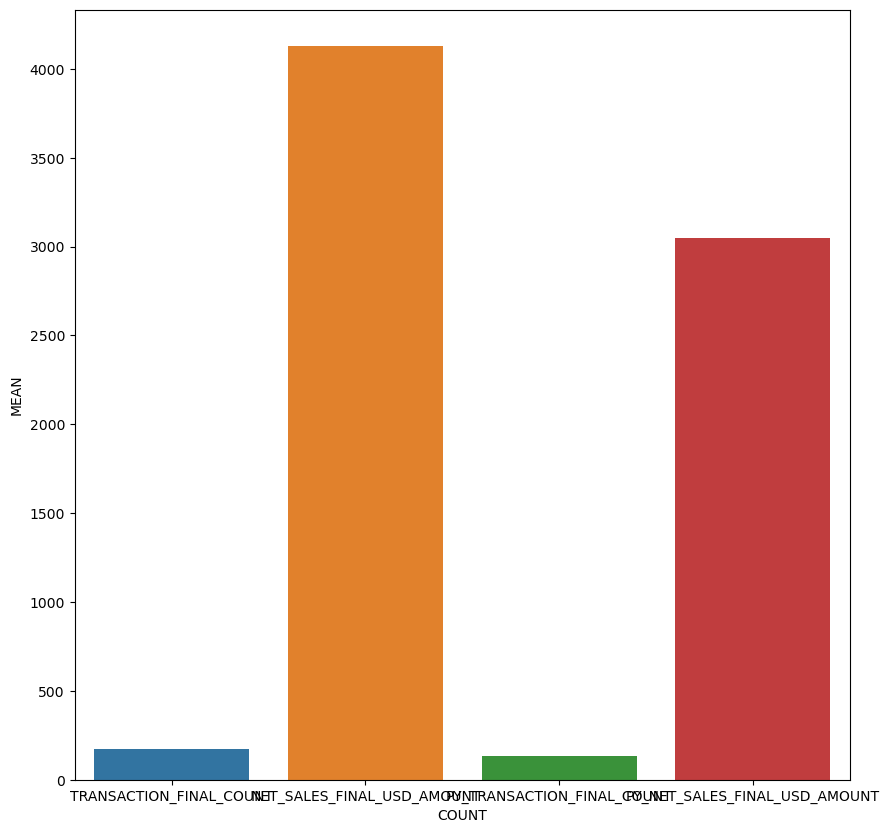

In [196]:
plt.figure( figsize = (10,10))
sns.barplot( data = not_holidays,
            x = 'COUNT',
            y = 'MEAN')

sns.barplot( data = holidays,
            x = 'COUNT',
            y = 'MEAN')

In [199]:
store_1346[store_1346['BUSINESS_DATE'].isin(all_holidays_and_events)]

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
19      2019-05-12       2127          1346     CA1346       FRANCHISE   
34      2019-05-27       2127          1346     CA1346       FRANCHISE   
54      2019-06-16       2127          1346     CA1346       FRANCHISE   
72      2019-07-04       2127          1346     CA1346       FRANCHISE   
132     2019-09-02       2127          1346     CA1346       FRANCHISE   
...            ...        ...           ...        ...             ...   
1677    2023-11-25       2127          1346     CA1346       FRANCHISE   
1679    2023-11-27       2127          1346     CA1346       FRANCHISE   
1706    2023-12-24       2127          1346     CA1346       FRANCHISE   
1707    2023-12-25       2127          1346     CA1346       FRANCHISE   
1713    2023-12-31       2127          1346     CA1346       FRANCHISE   

      OPEN_DATE CLOSE_DATE MONTH_NAME  DAY_NAME     CITY_NAME STATE_CODE  \
19   2017-11-20 1999-12-31        May    Sunday  APPLE VALLEY         CA   
34   2017-11-20 1999-12-31        May    Monday  APPLE VALLEY         CA   
54   2017-11-20 1999-12-31       June    Sunday  APPLE VALLEY         CA   
72   2017-11-20 1999-12-31       July  Thursday  APPLE VALLEY         CA   
132  2017-11-20 1999-12-31  September    Monday  APPLE VALLEY         CA   
...         ...        ...        ...       ...           ...        ...   
1677 2017-11-20 1999-12-31   November  Saturday  APPLE VALLEY         CA   
1679 2017-11-20 1999-12-31   November    Monday  APPLE VALLEY         CA   
1706 2017-11-20 1999-12-31   December    Sunday  APPLE VALLEY         CA   
1707 2017-11-20 1999-12-31   December    Monday  APPLE VALLEY         CA   
1713 2017-11-20 1999-12-31   December    Sunday  APPLE VALLEY         CA   

      STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
19    CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
34    CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
54    CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
72    CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
132   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
...          ...            ...     ...          ...          ...        ...   
1677  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1679  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1706  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1707  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1713  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

     REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
19          WEST                   0      2017-11-20             OPERATIONAL   
34          WEST                   0      2017-11-20             OPERATIONAL   
54          WEST                   0      2017-11-20             OPERATIONAL   
72          WEST                   0      2017-11-20             OPERATIONAL   
132         WEST                   0      2017-11-20             OPERATIONAL   
...          ...                 ...             ...                     ...   
1677        WEST                   0      2017-11-20             OPERATIONAL   
1679        WEST                   0      2017-11-20             OPERATIONAL   
1706        WEST                   0      2017-11-20             OPERATIONAL   
1707        WEST                   0      2017-11-20             OPERATIONAL   
1713        WEST                   0      2017-11-20             OPERATIONAL   

     GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
19             Domestic             DOMESTICFRANCHISE  LOS ANGELES   
34             Domestic             DOMESTICFRANCHISE  LOS ANGELES   
54             Domestic             DOMESTICFRANCHISE  LOS ANGELES   
7

In [200]:
store_1346[~store_1346['BUSINESS_DATE'].isin(all_holidays_and_events)]

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
0       2019-04-23       2127          1346     CA1346       FRANCHISE   
1       2019-04-24       2127          1346     CA1346       FRANCHISE   
2       2019-04-25       2127          1346     CA1346       FRANCHISE   
3       2019-04-26       2127          1346     CA1346       FRANCHISE   
4       2019-04-27       2127          1346     CA1346       FRANCHISE   
...            ...        ...           ...        ...             ...   
1708    2023-12-26       2127          1346     CA1346       FRANCHISE   
1709    2023-12-27       2127          1346     CA1346       FRANCHISE   
1710    2023-12-28       2127          1346     CA1346       FRANCHISE   
1711    2023-12-29       2127          1346     CA1346       FRANCHISE   
1712    2023-12-30       2127          1346     CA1346       FRANCHISE   

      OPEN_DATE CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
0    2017-11-20 1999-12-31      April    Tuesday  APPLE VALLEY         CA   
1    2017-11-20 1999-12-31      April  Wednesday  APPLE VALLEY         CA   
2    2017-11-20 1999-12-31      April   Thursday  APPLE VALLEY         CA   
3    2017-11-20 1999-12-31      April     Friday  APPLE VALLEY         CA   
4    2017-11-20 1999-12-31      April   Saturday  APPLE VALLEY         CA   
...         ...        ...        ...        ...           ...        ...   
1708 2017-11-20 1999-12-31   December    Tuesday  APPLE VALLEY         CA   
1709 2017-11-20 1999-12-31   December  Wednesday  APPLE VALLEY         CA   
1710 2017-11-20 1999-12-31   December   Thursday  APPLE VALLEY         CA   
1711 2017-11-20 1999-12-31   December     Friday  APPLE VALLEY         CA   
1712 2017-11-20 1999-12-31   December   Saturday  APPLE VALLEY         CA   

      STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
0     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
2     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
3     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
4     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
...          ...            ...     ...          ...          ...        ...   
1708  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1709  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1710  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1711  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1712  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

     REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
0           WEST                   0      2017-11-20             OPERATIONAL   
1           WEST                   0      2017-11-20             OPERATIONAL   
2           WEST                   0      2017-11-20             OPERATIONAL   
3           WEST                   0      2017-11-20             OPERATIONAL   
4           WEST                   0      2017-11-20             OPERATIONAL   
...          ...                 ...             ...                     ...   
1708        WEST                   0      2017-11-20             OPERATIONAL   
1709        WEST                   0      2017-11-20             OPERATIONAL   
1710        WEST                   0      2017-11-20             OPERATIONAL   
1711        WEST                   0      2017-11-20             OPERATIONAL   
1712        WEST                   0      2017-11-20             OPERATIONAL   

     GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
0              Domestic             DOMESTICFRANCHISE  LOS ANGELES   
1              Domestic             DOMESTICFRANCHISE  LOS ANGELES   
2              Domestic             DOMESTICFRANCHISE  LOS 

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BUSINESS_DATE', ylabel='NET_SALES_FINAL_USD_AMOUNT'>

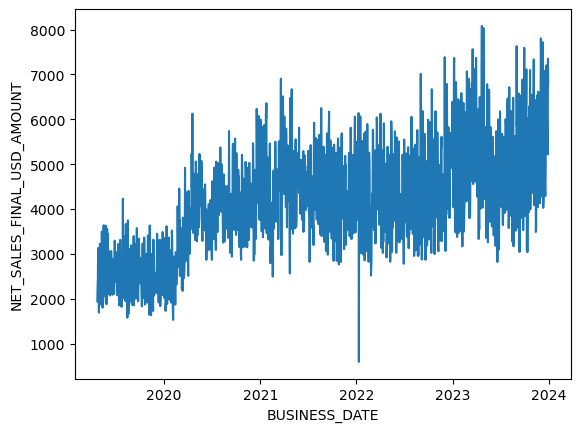

In [202]:
sns.lineplot( data = store_1346[~store_1346['BUSINESS_DATE'].isin(all_holidays_and_events)],
            x  = 'BUSINESS_DATE',
            y = 'NET_SALES_FINAL_USD_AMOUNT')

In [207]:
store_1346[~store_1346['BUSINESS_DATE'].isin(all_holidays_and_events)]['NET_SALES_FINAL_USD_AMOUNT'].nsmallest(10).index

Index([993, 288, 114, 287, 204, 197, 118, 6, 212, 259], dtype='int64')

In [209]:
store_1346.loc[store_1346[~store_1346['BUSINESS_DATE'].isin(all_holidays_and_events)]['NET_SALES_FINAL_USD_AMOUNT'].nsmallest(10).index, :]

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
993    2022-01-10       2127          1346     CA1346       FRANCHISE   
288    2020-02-05       2127          1346     CA1346       FRANCHISE   
114    2019-08-15       2127          1346     CA1346       FRANCHISE   
287    2020-02-04       2127          1346     CA1346       FRANCHISE   
204    2019-11-13       2127          1346     CA1346       FRANCHISE   
197    2019-11-06       2127          1346     CA1346       FRANCHISE   
118    2019-08-19       2127          1346     CA1346       FRANCHISE   
6      2019-04-29       2127          1346     CA1346       FRANCHISE   
212    2019-11-21       2127          1346     CA1346       FRANCHISE   
259    2020-01-07       2127          1346     CA1346       FRANCHISE   

     OPEN_DATE CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
993 2017-11-20 1999-12-31    January     Monday  APPLE VALLEY         CA   
288 2017-11-20 1999-12-31   February  Wednesday  APPLE VALLEY         CA   
114 2017-11-20 1999-12-31     August   Thursday  APPLE VALLEY         CA   
287 2017-11-20 1999-12-31   February    Tuesday  APPLE VALLEY         CA   
204 2017-11-20 1999-12-31   November  Wednesday  APPLE VALLEY         CA   
197 2017-11-20 1999-12-31   November  Wednesday  APPLE VALLEY         CA   
118 2017-11-20 1999-12-31     August     Monday  APPLE VALLEY         CA   
6   2017-11-20 1999-12-31      April     Monday  APPLE VALLEY         CA   
212 2017-11-20 1999-12-31   November   Thursday  APPLE VALLEY         CA   
259 2017-11-20 1999-12-31    January    Tuesday  APPLE VALLEY         CA   

     STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
993  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
288  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
114  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
287  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
204  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
197  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
118  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
6    CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
212  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
259  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

    REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
993        WEST                   0      2017-11-20             OPERATIONAL   
288        WEST                   0      2017-11-20             OPERATIONAL   
114        WEST                   0      2017-11-20             OPERATIONAL   
287        WEST                   0      2017-11-20             OPERATIONAL   
204        WEST                   0      2017-11-20             OPERATIONAL   
197        WEST                   0      2017-11-20             OPERATIONAL   
118        WEST                   0      2017-11-20             OPERATIONAL   
6          WEST                   0      2017-11-20             OPERATIONAL   
212        WEST                   0      2017-11-20             OPERATIONAL   
259        WEST                   0      2017-11-20             OPERATIONAL   

    GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
993           Domestic             DOMESTICFRANCHISE  LOS ANGELES   
288           Domestic             DOMESTICFRANCHISE  LOS ANGELES   
114           Domestic             DOMESTICFRANCHISE  LOS ANGELES   
287           Domestic             DOMESTICFRANCHISE  LOS ANGELES   
204           Domestic             DOMESTICFRANCHISE  LOS ANGELES   
197           Domestic             DOMESTICFRANCHISE  LOS ANGELES   
118           Domestic             DOMESTICFRANCHISE  LOS ANGELES   
6             Domestic             DOMESTICFRANCHISE  LOS ANGELES   
21

In [206]:
store_1346[~store_1346['BUSINESS_DATE'].isin(all_holidays_and_events)]['TRANSACTION_FINAL_COUNT'].nsmallest(10)

993     27
114     82
92      91
197     94
211     95
212     98
99     100
239    100
288    100
128    101
Name: TRANSACTION_FINAL_COUNT, dtype: int16

In [217]:
store_1346.groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean()

MONTH_NAME  TRANSACTION_FINAL_COUNT  NET_SALES_FINAL_USD_AMOUNT  \
0       April               179.695312                 4426.664062   
1      August               169.722581                 3930.954839   
2    December               176.180645                 4254.509677   
3    February               170.353982                 4101.318584   
4     January               172.991935                 4117.508065   
5        July               170.116129                 4031.709677   
6        June               164.953333                 3846.546667   
7       March               180.403226                 4482.145161   
8         May               173.064516                 4105.929032   
9    November               169.006667                 3944.266667   
10    October               174.632258                 4054.980645   
11  September               177.840000                 4156.820000   

    PY_TRANSACTION_FINAL_COUNT  PY_NET_SALES_FINAL_USD_AMOUNT  
0                   135.054688                    3230.453125  
1                   133.716129                    3000.096774  
2                   134.690323                    3180.361290  
3                   120.672566                    2773.911504  
4                   123.806452                    2865.153226  
5                   133.503226                    3079.161290  
6                   129.886667                    2944.340000  
7                   128.153226                    3087.774194  
8                   135.606452                    3130.729032  
9                   128.813333                    2910.920000  
10                  134.303226                    3031.780645  
11                  136.280000                    3113.886667

[]

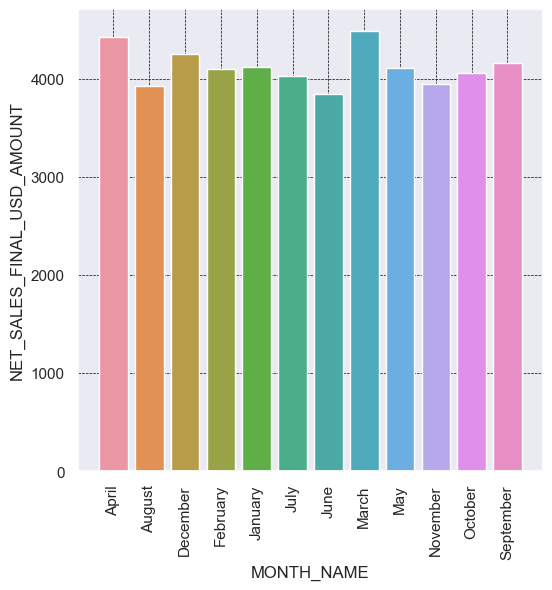

In [256]:
plt.figure(figsize = (6,6))
sns.barplot( data = store_1346.groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index(),
             x = 'MONTH_NAME',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.xticks(rotation=90)
plt.plot()

In [225]:
data_2019 = store_1346[store_1346['BUSINESS_DATE_FISCAL_YEAR'] == 2019]

In [226]:
data_2019.groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean()

TRANSACTION_FINAL_COUNT  NET_SALES_FINAL_USD_AMOUNT  \
MONTH_NAME                                                        
April                    142.500000                 2467.625000   
August                   134.419355                 2490.483871   
December                 132.000000                 2487.392857   
July                     135.193548                 2519.451613   
June                     140.566667                 2557.466667   
May                      142.709677                 2692.451613   
November                 131.133333                 2499.233333   
October                  133.290323                 2429.290323   
September                139.633333                 2573.000000   

            PY_TRANSACTION_FINAL_COUNT  PY_NET_SALES_FINAL_USD_AMOUNT  
MONTH_NAME                                                             
April                              0.0                            0.0  
August                             0.0                            0.0  
December                           0.0                            0.0  
July                               0.0                            0.0  
June                               0.0                            0.0  
May                                0.0                            0.0  
November                           0.0                            0.0  
October                            0.0                            0.0  
September                          0.0                            0.0

[]

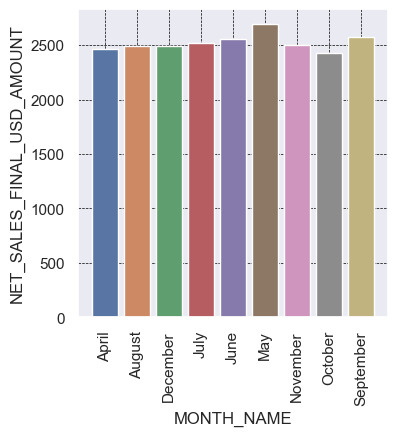

In [243]:
plt.figure(figsize = (4,4))
sns.barplot( data = data_2019.groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index(),
             x = 'MONTH_NAME',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.xticks(rotation=90)
plt.plot()

[]

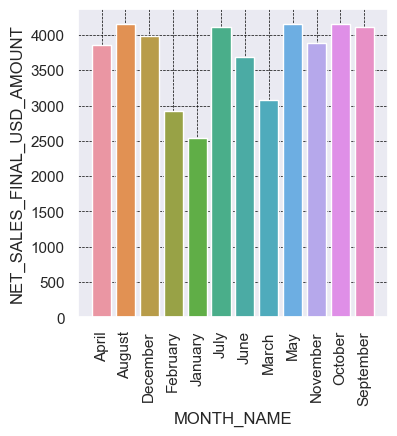

In [241]:
plt.figure(figsize = (4,4))
sns.barplot( data = store_1346[store_1346['BUSINESS_DATE_FISCAL_YEAR'] == 2020].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index(),
             x = 'MONTH_NAME',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.xticks(rotation=90)
plt.plot()

[]

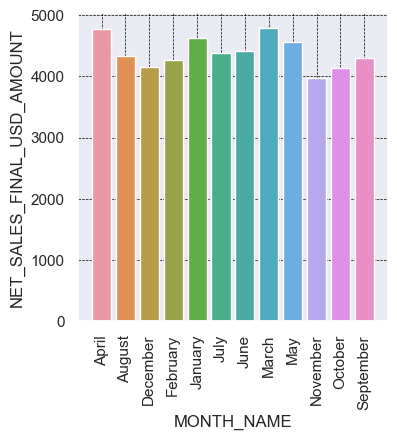

In [242]:
plt.figure(figsize = (4,4))
sns.barplot( data = store_1346[store_1346['BUSINESS_DATE_FISCAL_YEAR'] == 2021].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index(),
             x = 'MONTH_NAME',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.xticks(rotation=90)
plt.plot()

[]

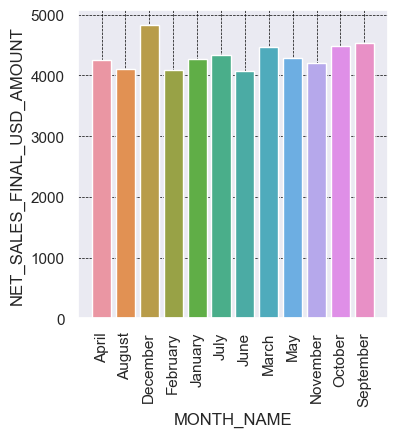

In [251]:
plt.figure(figsize = (4,4))
sns.barplot( data = store_1346[store_1346['BUSINESS_DATE_FISCAL_YEAR'] == 2022].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index(),
             x = 'MONTH_NAME',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.xticks(rotation=90)
plt.plot()

[]

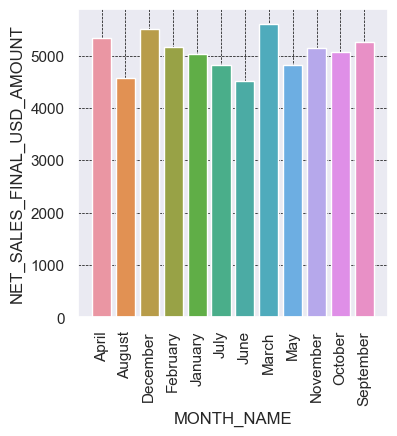

In [252]:
plt.figure(figsize = (4,4))
sns.barplot( data = store_1346[store_1346['BUSINESS_DATE_FISCAL_YEAR'] == 2023].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index(),
             x = 'MONTH_NAME',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.xticks(rotation=90)
plt.plot()

[]

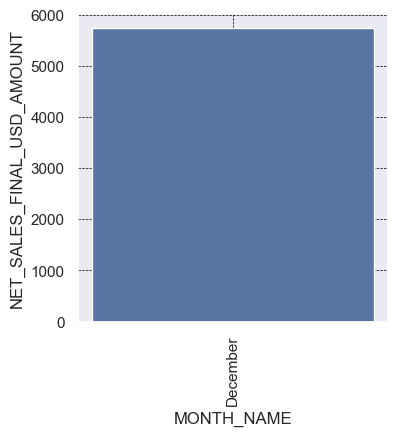

In [253]:
plt.figure(figsize = (4,4))
sns.barplot( data = store_1346[store_1346['BUSINESS_DATE_FISCAL_YEAR'] == 2024].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT',
                                                                       'PY_TRANSACTION_FINAL_COUNT','PY_NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index(),
             x = 'MONTH_NAME',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.xticks(rotation=90)
plt.plot()

In [247]:
store_1346[store_1346['MONTH_NAME'] == 'April'].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index()

BUSINESS_DATE_FISCAL_YEAR  NET_SALES_FINAL_USD_AMOUNT
0                       2019                 2467.625000
1                       2020                 3861.233333
2                       2021                 4767.166667
3                       2022                 4257.466667
4                       2023                 5343.200000

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

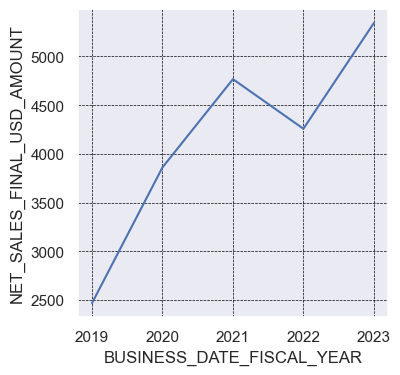

In [269]:
plt.figure(figsize = (4,4))
sns.lineplot(data = store_1346[store_1346['MONTH_NAME'] == 'April'].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index(),
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(which='both', linestyle='--', linewidth=0.5, color='black', zorder=5)
plt.plot()

In [ ]:
all_holidays_and_events

In [274]:
store_1346[store_1346['BUSINESS_DATE'].isin(all_holidays_and_events)]['IS_HOLIDAY'] = 1

C:\Users\yashd\AppData\Local\Temp\ipykernel_14444\1480947543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_1346[store_1346['BUSINESS_DATE'].isin(all_holidays_and_events)]['IS_HOLIDAY'] = 1


In [275]:
store_1346.loc[store_1346['BUSINESS_DATE'].isin(all_holidays_and_events), 'IS_HOLIDAY'] = 1

In [276]:
store_1346.loc[~store_1346['BUSINESS_DATE'].isin(all_holidays_and_events), 'IS_HOLIDAY'] = 0

In [277]:
store_1346

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
0       2019-04-23       2127          1346     CA1346       FRANCHISE   
1       2019-04-24       2127          1346     CA1346       FRANCHISE   
2       2019-04-25       2127          1346     CA1346       FRANCHISE   
3       2019-04-26       2127          1346     CA1346       FRANCHISE   
4       2019-04-27       2127          1346     CA1346       FRANCHISE   
...            ...        ...           ...        ...             ...   
1709    2023-12-27       2127          1346     CA1346       FRANCHISE   
1710    2023-12-28       2127          1346     CA1346       FRANCHISE   
1711    2023-12-29       2127          1346     CA1346       FRANCHISE   
1712    2023-12-30       2127          1346     CA1346       FRANCHISE   
1713    2023-12-31       2127          1346     CA1346       FRANCHISE   

      OPEN_DATE CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
0    2017-11-20 1999-12-31      April    Tuesday  APPLE VALLEY         CA   
1    2017-11-20 1999-12-31      April  Wednesday  APPLE VALLEY         CA   
2    2017-11-20 1999-12-31      April   Thursday  APPLE VALLEY         CA   
3    2017-11-20 1999-12-31      April     Friday  APPLE VALLEY         CA   
4    2017-11-20 1999-12-31      April   Saturday  APPLE VALLEY         CA   
...         ...        ...        ...        ...           ...        ...   
1709 2017-11-20 1999-12-31   December  Wednesday  APPLE VALLEY         CA   
1710 2017-11-20 1999-12-31   December   Thursday  APPLE VALLEY         CA   
1711 2017-11-20 1999-12-31   December     Friday  APPLE VALLEY         CA   
1712 2017-11-20 1999-12-31   December   Saturday  APPLE VALLEY         CA   
1713 2017-11-20 1999-12-31   December     Sunday  APPLE VALLEY         CA   

      STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
0     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
2     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
3     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
4     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
...          ...            ...     ...          ...          ...        ...   
1709  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1710  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1711  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1712  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1713  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

     REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
0           WEST                   0      2017-11-20             OPERATIONAL   
1           WEST                   0      2017-11-20             OPERATIONAL   
2           WEST                   0      2017-11-20             OPERATIONAL   
3           WEST                   0      2017-11-20             OPERATIONAL   
4           WEST                   0      2017-11-20             OPERATIONAL   
...          ...                 ...             ...                     ...   
1709        WEST                   0      2017-11-20             OPERATIONAL   
1710        WEST                   0      2017-11-20             OPERATIONAL   
1711        WEST                   0      2017-11-20             OPERATIONAL   
1712        WEST                   0      2017-11-20             OPERATIONAL   
1713        WEST                   0      2017-11-20             OPERATIONAL   

     GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
0              Domestic             DOMESTICFRANCHISE  LOS ANGELES   
1              Domestic             DOMESTICFRANCHISE  LOS ANGELES   
2              Domestic             DOMESTICFRANCHISE  LOS 

In [280]:
store_1346['TRANSACTION_FINAL_COUNT'] = pd.to_numeric(store_1346['TRANSACTION_FINAL_COUNT'], errors='coerce')
store_1346['NET_SALES_FINAL_USD_AMOUNT'] = pd.to_numeric(store_1346['NET_SALES_FINAL_USD_AMOUNT'], errors='coerce')
store_1346['PY_TRANSACTION_FINAL_COUNT'] = pd.to_numeric(store_1346['PY_TRANSACTION_FINAL_COUNT'], errors='coerce')
store_1346['PY_NET_SALES_FINAL_USD_AMOUNT'] = pd.to_numeric(store_1346['PY_NET_SALES_FINAL_USD_AMOUNT'], errors='coerce')

In [314]:
analysis_holidays = store_1346.groupby(['BUSINESS_DATE_FISCAL_YEAR','IS_HOLIDAY'])[['TRANSACTION_FINAL_COUNT', 'NET_SALES_FINAL_USD_AMOUNT', 'PY_TRANSACTION_FINAL_COUNT', 'PY_NET_SALES_FINAL_USD_AMOUNT']].mean()
analysis_holidays

TRANSACTION_FINAL_COUNT  \
BUSINESS_DATE_FISCAL_YEAR IS_HOLIDAY                            
2019                      0.0                      138.288136   
                          1.0                      103.857143   
2020                      0.0                      169.228070   
                          1.0                      146.136364   
2021                      0.0                      182.283626   
                          1.0                      166.909091   
2022                      0.0                      174.077586   
                          1.0                      155.695652   
2023                      0.0                      197.029155   
                          1.0                      171.714286   
2024                      1.0                      177.000000   

                                      NET_SALES_FINAL_USD_AMOUNT  \
BUSINESS_DATE_FISCAL_YEAR IS_HOLIDAY                               
2019                      0.0                        2559.703390   
                          1.0                        2019.357143   
2020                      0.0                        3747.192982   
                          1.0                        3306.181818   
2021                      0.0                        4402.485380   
                          1.0                        4297.590909   
2022                      0.0                        4342.758621   
                          1.0                        4230.826087   
2023                      0.0                        5090.527697   
                          1.0                        4759.714286   
2024                      1.0                        5739.000000   

                                      PY_TRANSACTION_FINAL_COUNT  \
BUSINESS_DATE_FISCAL_YEAR IS_HOLIDAY                               
2019                      0.0                           0.000000   
                          1.0                           0.000000   
2020                      0.0                          94.555556   
                          1.0                          79.636364   
2021                      0.0                         169.149123   
                          1.0                         147.363636   
2022                      0.0                         182.295977   
                          1.0                         165.608696   
2023                      0.0                         173.807580   
                          1.0                         157.571429   
2024                      1.0                         191.000000   

                                      PY_NET_SALES_FINAL_USD_AMOUNT  
BUSINESS_DATE_FISCAL_YEAR IS_HOLIDAY                                 
2019                      0.0                              0.000000  
                          1.0                              0.000000  
2020                      0.0                           1750.573099  
                          1.0                           1530.227273  
2021                      0.0                           3754.649123  
                          1.0                           3190.272727  
2022                      0.0                           4418.137931  
                          1.0                           4146.391304  
2023                      0.0                           4343.303207  
                          1.0                           4102.571429  
2024                      1.0                           5492.000000

In [318]:
analysis_holidays.unstack()['TRANSACTION_FINAL_COUNT'].reset_index()

IS_HOLIDAY  BUSINESS_DATE_FISCAL_YEAR         0.0         1.0
0                                2019  138.288136  103.857143
1                                2020  169.228070  146.136364
2                                2021  182.283626  166.909091
3                                2022  174.077586  155.695652
4                                2023  197.029155  171.714286
5                                2024         NaN  177.000000

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[]

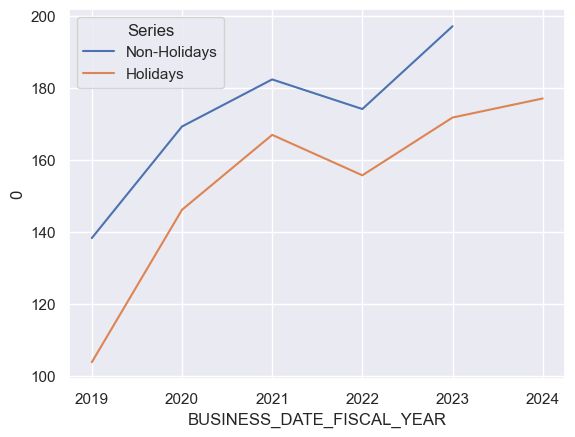

In [326]:
sns.lineplot(data = analysis_holidays.unstack()['TRANSACTION_FINAL_COUNT'].reset_index(),
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 0,
             label='Non-Holidays')
sns.lineplot(data = analysis_holidays.unstack()['TRANSACTION_FINAL_COUNT'].reset_index(),
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 1,
            label= 'Holidays')
plt.legend(title='Series')
plt.plot()

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[]

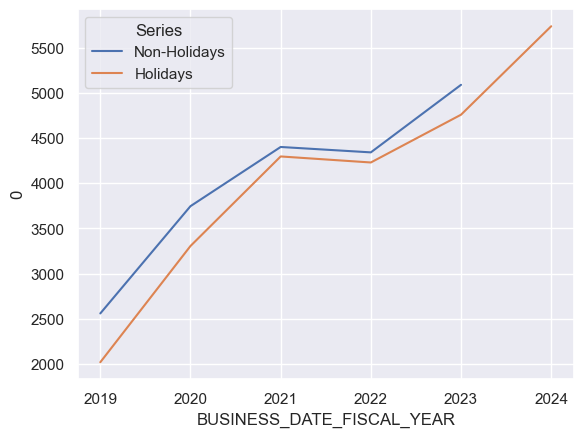

In [327]:
sns.lineplot(data = analysis_holidays.unstack()['NET_SALES_FINAL_USD_AMOUNT'].reset_index(),
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 0,
             label='Non-Holidays')
sns.lineplot(data = analysis_holidays.unstack()['NET_SALES_FINAL_USD_AMOUNT'].reset_index(),
             x = 'BUSINESS_DATE_FISCAL_YEAR',
             y = 1,
            label= 'Holidays')
plt.legend(title='Series')
plt.plot()

In [328]:
store_1346[store_1346['IS_HOLIDAY'] == 1]['TEMP_CLOSE_INDICATOR'].value_counts()

TEMP_CLOSE_INDICATOR
0    93
1    10
Name: count, dtype: int64

In [344]:
store_1346[(store_1346['IS_HOLIDAY'] == 1) & (store_1346['TEMP_CLOSE_INDICATOR'] == 1)]

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
219     2019-11-28       2127          1346     CA1346       FRANCHISE   
246     2019-12-25       2127          1346     CA1346       FRANCHISE   
583     2020-11-26       2127          1346     CA1346       FRANCHISE   
612     2020-12-25       2127          1346     CA1346       FRANCHISE   
947     2021-11-25       2127          1346     CA1346       FRANCHISE   
977     2021-12-25       2127          1346     CA1346       FRANCHISE   
1311    2022-11-24       2127          1346     CA1346       FRANCHISE   
1342    2022-12-25       2127          1346     CA1346       FRANCHISE   
1675    2023-11-23       2127          1346     CA1346       FRANCHISE   
1707    2023-12-25       2127          1346     CA1346       FRANCHISE   

      OPEN_DATE CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
219  2017-11-20 1999-12-31   November   Thursday  APPLE VALLEY         CA   
246  2017-11-20 1999-12-31   December  Wednesday  APPLE VALLEY         CA   
583  2017-11-20 1999-12-31   November   Thursday  APPLE VALLEY         CA   
612  2017-11-20 1999-12-31   December     Friday  APPLE VALLEY         CA   
947  2017-11-20 1999-12-31   November   Thursday  APPLE VALLEY         CA   
977  2017-11-20 1999-12-31   December   Saturday  APPLE VALLEY         CA   
1311 2017-11-20 1999-12-31   November   Thursday  APPLE VALLEY         CA   
1342 2017-11-20 1999-12-31   December     Sunday  APPLE VALLEY         CA   
1675 2017-11-20 1999-12-31   November   Thursday  APPLE VALLEY         CA   
1707 2017-11-20 1999-12-31   December     Monday  APPLE VALLEY         CA   

      STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
219   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
246   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
583   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
612   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
947   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
977   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1311  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1342  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1675  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1707  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

     REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
219         WEST                   0      2017-11-20             OPERATIONAL   
246         WEST                   0      2017-11-20             OPERATIONAL   
583         WEST                   0      2017-11-20             OPERATIONAL   
612         WEST                   0      2017-11-20             OPERATIONAL   
947         WEST                   0      2017-11-20             OPERATIONAL   
977         WEST                   0      2017-11-20             OPERATIONAL   
1311        WEST                   0      2017-11-20             OPERATIONAL   
1342        WEST                   0      2017-11-20             OPERATIONAL   
1675        WEST                   0      2017-11-20             OPERATIONAL   
1707        WEST                   0      2017-11-20             OPERATIONAL   

     GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
219            Domestic             DOMESTICFRANCHISE  LOS ANGELES   
246            Domestic             DOMESTICFRANCHISE  LOS ANGELES   
583            Domestic             DOMESTICFRANCHISE  LOS ANGELES   
612            Domestic             DOMESTICFRANCHISE  LOS ANGELES   
947            Domestic             DOMESTICFRANCHISE  LOS ANGELES   
977            Domestic             DOMESTICFRANCHISE  LOS ANGELES   
1311           Domestic             DOMESTICFRANCHISE  LOS ANGELES   
1342           Domes

In [331]:
store_1346[store_1346['IS_HOLIDAY'] == 1]['COMPARABLE_INDICATOR'].value_counts()

COMPARABLE_INDICATOR
1    74
0    29
Name: count, dtype: int64

In [329]:
store_1346[store_1346['IS_HOLIDAY'] == 0]['TEMP_CLOSE_INDICATOR'].value_counts()

TEMP_CLOSE_INDICATOR
0    1611
Name: count, dtype: int64

In [348]:
store_1346[store_1346['NET_SALES_FINAL_USD_AMOUNT'] != 0]['NET_SALES_FINAL_USD_AMOUNT'].nsmallest(15).values

array([ 595, 1531, 1580, 1608, 1611, 1638, 1647, 1658, 1663, 1668, 1692,
       1702, 1731, 1732, 1765], dtype=int16)

In [356]:
lowest_sales_for_every_store = store_1346[store_1346['NET_SALES_FINAL_USD_AMOUNT'] != 0].groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].nsmallest(10).values
lowest_sales_for_every_store

array([1580, 1638, 1647, 1658, 1663, 1668, 1692, 1731, 1765, 1804, 1531,
       1608, 1611, 1702, 1732, 1873, 1878, 1889, 1893, 1919, 2497, 2565,
       2748, 2766, 2794, 2823, 2823, 2847, 2847, 2899,  595, 2519, 2689,
       2782, 2824, 2826, 2836, 2839, 2857, 2871, 2267, 2822, 2880, 3041,
       3046, 3075, 3103, 3169, 3171, 3182, 5739], dtype=int16)

In [371]:
lowest_sales = store_1346[store_1346['NET_SALES_FINAL_USD_AMOUNT'].isin(lowest_sales_for_every_store)][['BUSINESS_DATE','TRANSACTION_FINAL_COUNT',
                                                                                         'NET_SALES_FINAL_USD_AMOUNT','PY_TRANSACTION_FINAL_COUNT',
                                                                                         'PY_NET_SALES_FINAL_USD_AMOUNT']]
lowest_sales                                                                                         

BUSINESS_DATE  TRANSACTION_FINAL_COUNT  NET_SALES_FINAL_USD_AMOUNT  \
6       2019-04-29                      120                        1692   
13      2019-05-06                      112                        1878   
20      2019-05-13                      109                        1804   
34      2019-05-27                      161                        2880   
72      2019-07-04                       77                        1668   
114     2019-08-15                       82                        1580   
118     2019-08-19                      123                        1663   
161     2019-10-01                      174                        2824   
191     2019-10-31                       92                        1765   
197     2019-11-06                       94                        1647   
204     2019-11-13                      105                        1638   
209     2019-11-18                      119                        1804   
212     2019-11-21                       98                        1731   
245     2019-12-24                       87                        1658   
259     2020-01-07                      130                        1732   
260     2020-01-08                      114                        1893   
261     2020-01-09                      113                        1878   
265     2020-01-13                      129                        1889   
277     2020-01-25                      128                        2565   
280     2020-01-28                      128                        1919   
287     2020-02-04                      114                        1611   
288     2020-02-05                      100                        1531   
296     2020-02-13                      110                        1873   
335     2020-03-23                      137                        2847   
355     2020-04-12                       62                        1608   
611     2020-12-24                       84                        1702   
657     2021-02-08                      146                        2794   
666     2021-02-17                      118                        2497   
731     2021-04-23                      101                        2565   
806     2021-07-07                      129                        2823   
897     2021-10-06                      124                        2847   
909     2021-10-18                      137                        2847   
916     2021-10-25                      122                        2899   
917     2021-10-26                      128                        2766   
923     2021-11-01                      141                        3169   
925     2021-11-03                      121                        2823   
976     2021-12-24                      100                        2748   
993     2022-01-10                       27                         595   
1015    2022-02-01                      134                        2857   
1030    2022-02-16                      128                        2824   
1039    2022-02-25                      101                        2519   
1040    2022-02-26                      101                        2689   
1041    2022-02-27                      112                        2839   
1112    2022-05-09                      136                        2826   
1119    2022-05-16                      128                        3046   
1163    2022-06-29                      120                        2782   
1164    2022-06-30                      122                        2836   
1246    2022-09-20                      140                        2871   
1321    2022-12-04                      216                        5739   
1386    2023-02-07                      144                        3169   
1393    2023-02-14                      150                        2880   
1512    2023-06-13                      139                        3182   
1519    2023-06-20            

In [366]:
lowest_sales_promos = store_1346[store_1346['NET_SALES_FINAL_USD_AMOUNT'].isin(lowest_sales_for_every_store)][['BUSINESS_DATE','PROMOTION_TYPE','PROMOTION_OFFER',
                                                                                         'PROMOTION_ITEM','PROMOTION_CASH_AMOUNT','PROMOTION_PERCENTAGE',
                                                                                         'PLATFORM','FREQUENCY']]
lowest_sales_promos

BUSINESS_DATE    PROMOTION_TYPE   PROMOTION_OFFER PROMOTION_ITEM  \
6       2019-04-29      No Promotion         No Offers       No Items   
13      2019-05-06      No Promotion         No Offers       No Items   
20      2019-05-13      No Promotion         No Offers       No Items   
34      2019-05-27      No Promotion         No Offers       No Items   
72      2019-07-04      No Promotion         No Offers       No Items   
114     2019-08-15      No Promotion         No Offers       No Items   
118     2019-08-19      No Promotion         No Offers       No Items   
161     2019-10-01      No Promotion         No Offers       No Items   
191     2019-10-31      No Promotion         No Offers       No Items   
197     2019-11-06      No Promotion         No Offers       No Items   
204     2019-11-13      No Promotion         No Offers       No Items   
209     2019-11-18      No Promotion         No Offers       No Items   
212     2019-11-21      No Promotion         No Offers       No Items   
245     2019-12-24      No Promotion         No Offers       No Items   
259     2020-01-07      No Promotion         No Offers       No Items   
260     2020-01-08      No Promotion         No Offers       No Items   
261     2020-01-09      No Promotion         No Offers       No Items   
265     2020-01-13      No Promotion         No Offers       No Items   
277     2020-01-25      No Promotion         No Offers       No Items   
280     2020-01-28      No Promotion         No Offers       No Items   
287     2020-02-04      No Promotion         No Offers       No Items   
288     2020-02-05      No Promotion         No Offers       No Items   
296     2020-02-13      No Promotion         No Offers       No Items   
335     2020-03-23      No Promotion         No Offers       No Items   
355     2020-04-12      No Promotion         No Offers       No Items   
611     2020-12-24      No Promotion         No Offers       No Items   
657     2021-02-08      No Promotion         No Offers       No Items   
666     2021-02-17      No Promotion         No Offers       No Items   
731     2021-04-23      Delivery Fee          Delivery   Delivery Fee   
806     2021-07-07      No Promotion         No Offers       No Items   
897     2021-10-06      No Promotion         No Offers       No Items   
909     2021-10-18      No Promotion         No Offers       No Items   
916     2021-10-25      No Promotion         No Offers       No Items   
917     2021-10-26      No Promotion         No Offers       No Items   
923     2021-11-01      No Promotion         No Offers       No Items   
925     2021-11-03      No Promotion         No Offers       No Items   
976     2021-12-24      No Promotion         No Offers       No Items   
993     2022-01-10      No Promotion         No Offers       No Items   
1015    2022-02-01      No Promotion         No Offers       No Items   
1030    2022-02-16      No Promotion         No Offers       No Items   
1039    2022-02-25      No Promotion         No Offers       No Items   
1040    2022-02-26      No Promotion         No Offers       No Items   
1041    2022-02-27      No Promotion         No Offers       No Items   
1112    2022-05-09      No Promotion         No Offers       No Items   
1119    2022-05-16      No Promotion         No Offers       No Items   
1163    2022-06-29      No Promotion         No Offers       No Items   
1164    2022-06-30      No Promotion         No Offers       No Items   
1246    2022-09-20      Delivery Fee          Delivery   Delivery Fee   
1321    2022-12-04  Overall Discount  Overall Discount      All Items   
1386    2023-02-07      No Promotion         No Offers       No Items   
1393    2023-02-14      No Promotion         No Offers       No Items   
1512    2023-06-13         Free Item              Side          Fries   
1519    2023-06-20  Overall Discount  Overall Discount      All Items   
1525    2023-06-26  Overall Discount  Overall Discount      All

In [376]:
lowest_dates = store_1346[store_1346['NET_SALES_FINAL_USD_AMOUNT'].isin(lowest_sales_for_every_store)][['BUSINESS_DATE','MONTH_NAME','DAY_NAME',
                                                                                                       'BUSINESS_DATE_FISCAL_YEAR']]
lowest_dates

BUSINESS_DATE MONTH_NAME   DAY_NAME  BUSINESS_DATE_FISCAL_YEAR
6       2019-04-29      April     Monday                       2019
13      2019-05-06        May     Monday                       2019
20      2019-05-13        May     Monday                       2019
34      2019-05-27        May     Monday                       2019
72      2019-07-04       July   Thursday                       2019
114     2019-08-15     August   Thursday                       2019
118     2019-08-19     August     Monday                       2019
161     2019-10-01    October    Tuesday                       2019
191     2019-10-31    October   Thursday                       2019
197     2019-11-06   November  Wednesday                       2019
204     2019-11-13   November  Wednesday                       2019
209     2019-11-18   November     Monday                       2019
212     2019-11-21   November   Thursday                       2019
245     2019-12-24   December    Tuesday                       2019
259     2020-01-07    January    Tuesday                       2020
260     2020-01-08    January  Wednesday                       2020
261     2020-01-09    January   Thursday                       2020
265     2020-01-13    January     Monday                       2020
277     2020-01-25    January   Saturday                       2020
280     2020-01-28    January    Tuesday                       2020
287     2020-02-04   February    Tuesday                       2020
288     2020-02-05   February  Wednesday                       2020
296     2020-02-13   February   Thursday                       2020
335     2020-03-23      March     Monday                       2020
355     2020-04-12      April     Sunday                       2020
611     2020-12-24   December   Thursday                       2020
657     2021-02-08   February     Monday                       2021
666     2021-02-17   February  Wednesday                       2021
731     2021-04-23      April     Friday                       2021
806     2021-07-07       July  Wednesday                       2021
897     2021-10-06    October  Wednesday                       2021
909     2021-10-18    October     Monday                       2021
916     2021-10-25    October     Monday                       2021
917     2021-10-26    October    Tuesday                       2021
923     2021-11-01   November     Monday                       2021
925     2021-11-03   November  Wednesday                       2021
976     2021-12-24   December     Friday                       2021
993     2022-01-10    January     Monday                       2022
1015    2022-02-01   February    Tuesday                       2022
1030    2022-02-16   February  Wednesday                       2022
1039    2022-02-25   February     Friday                       2022
1040    2022-02-26   February   Saturday                       2022
1041    2022-02-27   February     Sunday                       2022
1112    2022-05-09        May     Monday                       2022
1119    2022-05-16        May     Monday                       2022
1163    2022-06-29       June  Wednesday                       2022
1164    2022-06-30       June   Thursday                       2022
1246    2022-09-20  September    Tuesday                       2022
1321    2022-12-04   December     Sunday                       2022
1386    2023-02-07   February    Tuesday                       2023
1393    2023-02-14   February    Tuesday                       2023
1512    2023-06-13       June    Tuesday                       2023
1519    2023-06-20       June    Tuesday                       2023
1525    2023-06-26       June     Monday                       2023
1580    2023-08-20     August     Sunday                       2023
1603    2023-09-12  September    Tuesday                       2023
1631    2023-10-10    October    Tuesday                       2023
1633    2023-10-12    October   Thursday                     

In [377]:
lowest_dates.groupby('BUSINESS_DATE_FISCAL_YEAR')['MONTH_NAME'].value_counts()

BUSINESS_DATE_FISCAL_YEAR  MONTH_NAME
2019                       November      4
                           May           3
                           October       2
                           August        2
                           April         1
                           July          1
                           December      1
2020                       January       6
                           February      3
                           March         1
                           December      1
                           April         1
2021                       October       4
                           November      2
                           February      2
                           July          1
                           December      1
                           April         1
2022                       February      5
                           June          2
                           May           2
                           September     1
                

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

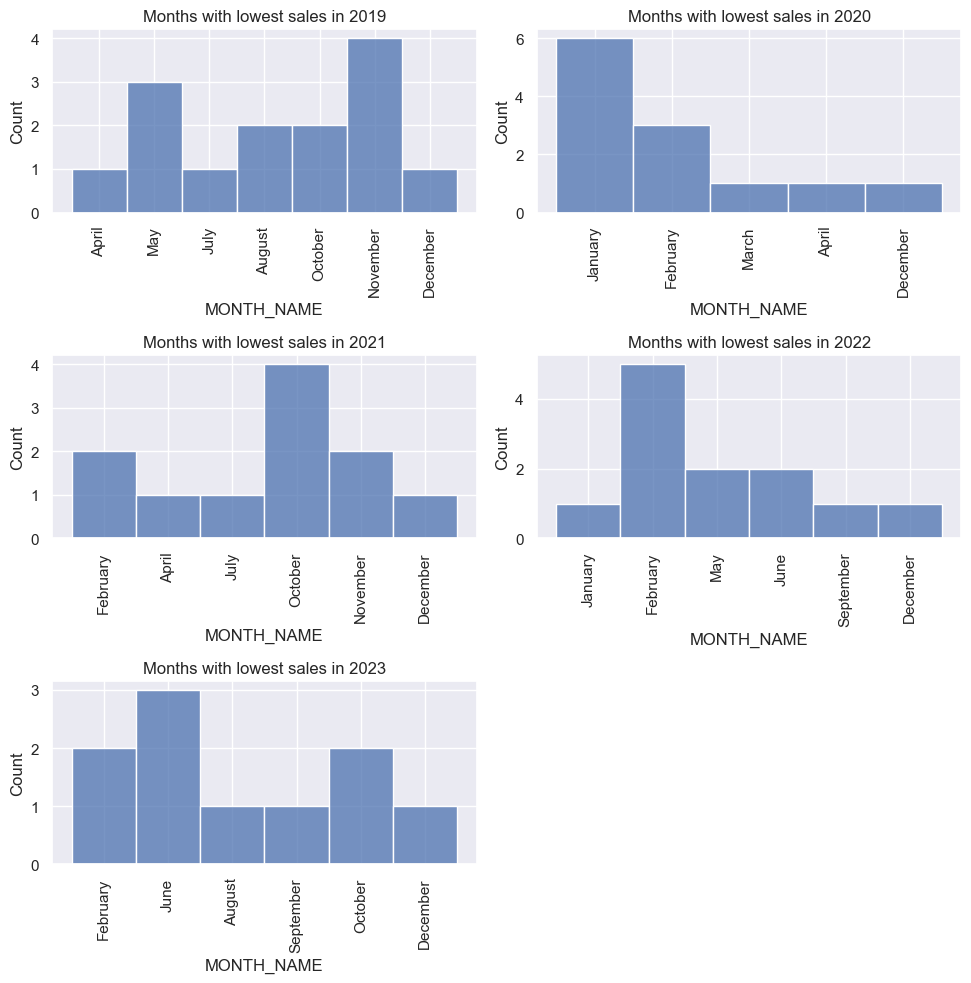

In [418]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=3, ncols=2)

# Plot data
years = range(2019, 2024)
for i, year in enumerate(years):
    row = i // 2  # Determine row index
    col = i % 2   # Determine column index
    
    sns.histplot(data=lowest_dates[lowest_dates['BUSINESS_DATE_FISCAL_YEAR'] == year],
                x='MONTH_NAME',
                ax=axes[row, col])
    axes[row, col].set_title(f'Months with lowest sales in {year}')

# Remove unused subplots if any
for j in range(len(years), 6):
    fig.delaxes(axes[j // 2, j % 2])

# Rotate x-axis labels for all subplots
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [382]:
store_1346['NET_SALES_FINAL_USD_AMOUNT'].nlargest(15).values

array([12132,  9850,  9126,  8081,  8035,  7803,  7719,  7630,  7594,
        7563,  7463,  7386,  7368,  7366,  7351], dtype=int16)

In [386]:
highest_sales_for_every_store = store_1346.groupby('BUSINESS_DATE_FISCAL_YEAR')['NET_SALES_FINAL_USD_AMOUNT'].nlargest(10).values
highest_sales_for_every_store

array([ 4231,  3750,  3668,  3640,  3636,  3634,  3593,  3578,  3565,
        3500,  7463,  6231,  6127,  6074,  5740,  5625,  5577,  5572,
        5466,  5457,  9850,  7310,  6903,  6671,  6510,  6475,  6357,
        6250,  6173,  6169,  9126,  7386,  7320,  7011,  6787,  6673,
        6386,  6184,  6180,  6139, 12132,  8081,  8035,  7803,  7719,
        7630,  7594,  7563,  7368,  7366,  5739], dtype=int16)

In [387]:
highest_sales = store_1346[store_1346['NET_SALES_FINAL_USD_AMOUNT'].isin(highest_sales_for_every_store)][['BUSINESS_DATE','TRANSACTION_FINAL_COUNT',
                                                                                         'NET_SALES_FINAL_USD_AMOUNT','PY_TRANSACTION_FINAL_COUNT',
                                                                                         'PY_NET_SALES_FINAL_USD_AMOUNT']]
highest_sales                                                                                         

BUSINESS_DATE  TRANSACTION_FINAL_COUNT  NET_SALES_FINAL_USD_AMOUNT  \
17      2019-05-10                      175                        3500   
24      2019-05-17                      186                        3640   
31      2019-05-24                      182                        3634   
32      2019-05-25                      164                        3593   
37      2019-05-30                      180                        3565   
...            ...                      ...                         ...   
1592    2023-09-01                      280                        7630   
1621    2023-09-30                      270                        7594   
1684    2023-12-02                      269                        7803   
1691    2023-12-09                      260                        7719   
1713    2023-12-31                      177                        5739   

      PY_TRANSACTION_FINAL_COUNT  PY_NET_SALES_FINAL_USD_AMOUNT  
17                             0                              0  
24                             0                              0  
31                             0                              0  
32                             0                              0  
37                             0                              0  
...                          ...                            ...  
1592                         289                           7011  
1621                         182                           4822  
1684                         199                           5148  
1691                         247                           6787  
1713                         191                           5492  

[61 rows x 5 columns]

In [388]:
highest_sales_promos = store_1346[store_1346['NET_SALES_FINAL_USD_AMOUNT'].isin(highest_sales_for_every_store)][['BUSINESS_DATE','PROMOTION_TYPE','PROMOTION_OFFER',
                                                                                         'PROMOTION_ITEM','PROMOTION_CASH_AMOUNT','PROMOTION_PERCENTAGE',
                                                                                         'PLATFORM','FREQUENCY']]
highest_sales_promos

BUSINESS_DATE PROMOTION_TYPE PROMOTION_OFFER    PROMOTION_ITEM  \
17      2019-05-10   No Promotion       No Offers          No Items   
24      2019-05-17   No Promotion       No Offers          No Items   
31      2019-05-24   No Promotion       No Offers          No Items   
32      2019-05-25   No Promotion       No Offers          No Items   
37      2019-05-30   No Promotion       No Offers          No Items   
...            ...            ...             ...               ...   
1592    2023-09-01      Free Item         Protein  Chicken Sandwich   
1621    2023-09-30      Free Item         Protein          Sandwich   
1684    2023-12-02      Free Item            Side             Fries   
1691    2023-12-09      Free Item         Protein  Chicken Sandwich   
1713    2023-12-31   No Promotion       No Offers          No Items   

      PROMOTION_CASH_AMOUNT  PROMOTION_PERCENTAGE     PLATFORM FREQUENCY  
17                        0                   0.0  No Platform      None  
24                        0                   0.0  No Platform      None  
31                        0                   0.0  No Platform      None  
32                        0                   0.0  No Platform      None  
37                        0                   0.0  No Platform      None  
...                     ...                   ...          ...       ...  
1592                      0                   0.0           DD     Daily  
1621                      0                   0.0           UE     Daily  
1684                      0                   0.0           DD     Daily  
1691                      0                   0.0           UE     Daily  
1713                      0                   0.0  No Platform      None  

[61 rows x 8 columns]

In [389]:
highest_dates = store_1346[store_1346['NET_SALES_FINAL_USD_AMOUNT'].isin(highest_sales_for_every_store)][['BUSINESS_DATE','MONTH_NAME','DAY_NAME',
                                                                                                       'BUSINESS_DATE_FISCAL_YEAR']]
highest_dates

BUSINESS_DATE MONTH_NAME  DAY_NAME  BUSINESS_DATE_FISCAL_YEAR
17      2019-05-10        May    Friday                       2019
24      2019-05-17        May    Friday                       2019
31      2019-05-24        May    Friday                       2019
32      2019-05-25        May  Saturday                       2019
37      2019-05-30        May  Thursday                       2019
...            ...        ...       ...                        ...
1592    2023-09-01  September    Friday                       2023
1621    2023-09-30  September  Saturday                       2023
1684    2023-12-02   December  Saturday                       2023
1691    2023-12-09   December  Saturday                       2023
1713    2023-12-31   December    Sunday                       2024

[61 rows x 4 columns]

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

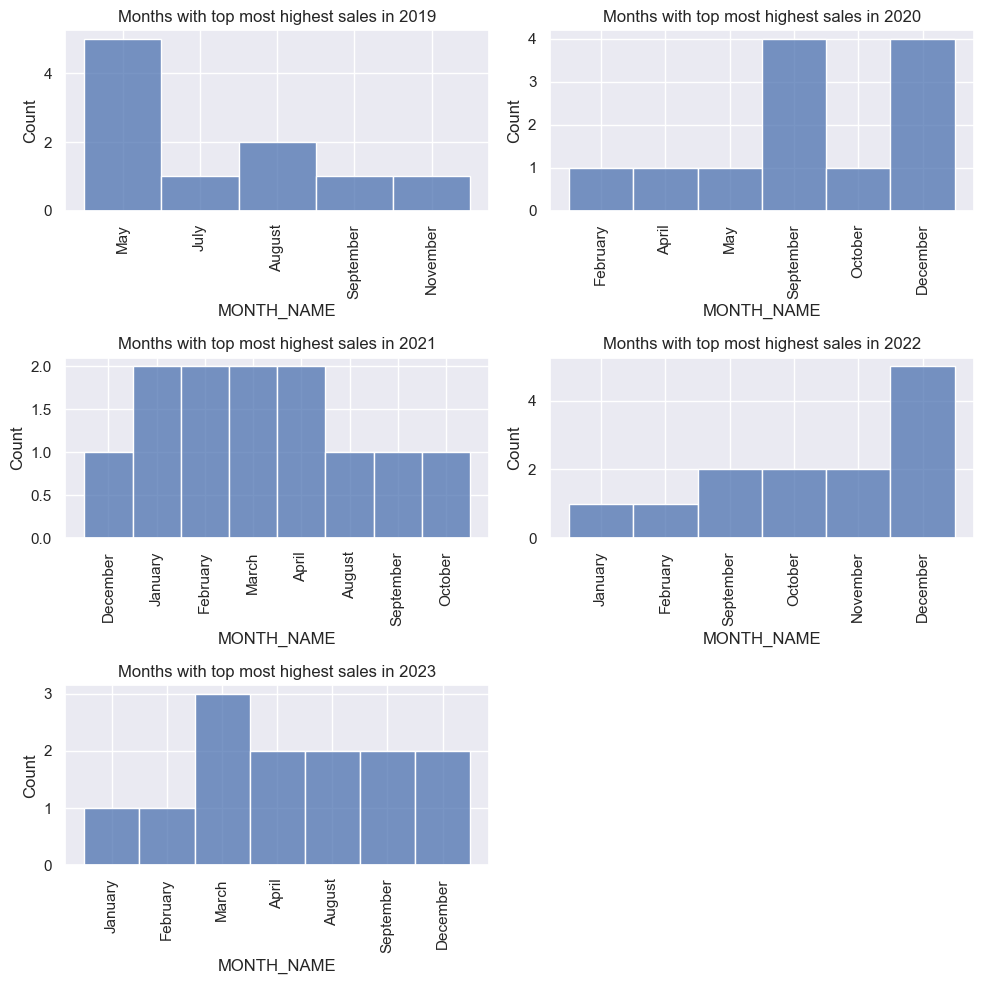

In [417]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=3, ncols=2)

# Plot data
years = range(2019, 2024)
for i, year in enumerate(years):
    row = i // 2  # Determine row index
    col = i % 2   # Determine column index
    
    sns.histplot(data=highest_dates[highest_dates['BUSINESS_DATE_FISCAL_YEAR'] == year],
                x='MONTH_NAME',
                ax=axes[row, col])
    axes[row, col].set_title(f'Months with top most highest sales in {year}')

# Remove unused subplots if any
for j in range(len(years), 6):
    fig.delaxes(axes[j // 2, j % 2])

# Rotate x-axis labels for all subplots
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [427]:
for i in range(2019,2020):
    store_1346[store_1346['BUSINESS_DATE_FISCAL_YEAR'] == i].groupby('MONTH_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT']].mean()

In [429]:
monthly_sales  = store_1346.groupby(['BUSINESS_DATE_FISCAL_YEAR','MONTH_NAME'])['NET_SALES_FINAL_USD_AMOUNT'].mean().reset_index()
monthly_sales

BUSINESS_DATE_FISCAL_YEAR MONTH_NAME  NET_SALES_FINAL_USD_AMOUNT
0                        2019      April                 2467.625000
1                        2019     August                 2490.483871
2                        2019   December                 2487.392857
3                        2019       July                 2519.451613
4                        2019       June                 2557.466667
5                        2019        May                 2692.451613
6                        2019   November                 2499.233333
7                        2019    October                 2429.290323
8                        2019  September                 2573.000000
9                        2020      April                 3861.233333
10                       2020     August                 4152.612903
11                       2020   December                 3984.137931
12                       2020   February                 2924.000000
13                       2020    January                 2542.129032
14                       2020       July                 4109.612903
15                       2020       June                 3686.233333
16                       2020      March                 3076.064516
17                       2020        May                 4151.548387
18                       2020   November                 3883.666667
19                       2020    October                 4151.709677
20                       2020  September                 4110.400000
21                       2021      April                 4767.166667
22                       2021     August                 4340.290323
23                       2021   December                 4159.966667
24                       2021   February                 4264.821429
25                       2021    January                 4622.967742
26                       2021       July                 4379.580645
27                       2021       June                 4411.233333
28                       2021      March                 4790.161290
29                       2021        May                 4568.709677
30                       2021   November                 3982.533333
31                       2021    October                 4136.354839
32                       2021  September                 4305.833333
33                       2022      April                 4257.466667
34                       2022     August                 4100.903226
35                       2022   December                 4826.243243
36                       2022   February                 4092.678571
37                       2022    January                 4270.096774
38                       2022       July                 4332.677419
39                       2022       June                 4068.500000
40                       2022      March                 4458.838710
41                       2022        May                 4285.870968
42                       2022   November                 4205.300000
43                       2022    October                 4477.903226
44                       2022  September                 4525.666667
45                       2023      April                 5343.200000
46                       2023     August                 4570.483871
47                       2023   December                 5505.100000
48                       2023   February                 5165.821429
49                       2023    January                 5034.838710
50                       2023       July                 4817.225806
51                       2023       June                 4509.300000
52                       2023      March                 5603.516129
53                       2023        May                 4831.064516
54                       2023   November                 5150.600000
55                       2023    October                 5079.645161
56                       2023  September                 5269.200000
57

In [430]:
results = pd.DataFrame()

for year in monthly_sales['BUSINESS_DATE_FISCAL_YEAR'].unique():
    year_data = monthly_sales[monthly_sales['BUSINESS_DATE_FISCAL_YEAR'] == year]
    
    top_months = year_data.nlargest(3, 'NET_SALES_FINAL_USD_AMOUNT')
    bottom_months = year_data.nsmallest(3, 'NET_SALES_FINAL_USD_AMOUNT')
    
    top_months['Position'] = 'Top 3'
    bottom_months['Position'] = 'Bottom 3'
    
    results = pd.concat([results, top_months, bottom_months])

# Reset index for the final DataFrame
results.reset_index(drop=True, inplace=True)

results

BUSINESS_DATE_FISCAL_YEAR MONTH_NAME  NET_SALES_FINAL_USD_AMOUNT  Position
0                        2019        May                 2692.451613     Top 3
1                        2019  September                 2573.000000     Top 3
2                        2019       June                 2557.466667     Top 3
3                        2019    October                 2429.290323  Bottom 3
4                        2019      April                 2467.625000  Bottom 3
5                        2019   December                 2487.392857  Bottom 3
6                        2020     August                 4152.612903     Top 3
7                        2020    October                 4151.709677     Top 3
8                        2020        May                 4151.548387     Top 3
9                        2020    January                 2542.129032  Bottom 3
10                       2020   February                 2924.000000  Bottom 3
11                       2020      March                 3076.064516  Bottom 3
12                       2021      March                 4790.161290     Top 3
13                       2021      April                 4767.166667     Top 3
14                       2021    January                 4622.967742     Top 3
15                       2021   November                 3982.533333  Bottom 3
16                       2021    October                 4136.354839  Bottom 3
17                       2021   December                 4159.966667  Bottom 3
18                       2022   December                 4826.243243     Top 3
19                       2022  September                 4525.666667     Top 3
20                       2022    October                 4477.903226     Top 3
21                       2022       June                 4068.500000  Bottom 3
22                       2022   February                 4092.678571  Bottom 3
23                       2022     August                 4100.903226  Bottom 3
24                       2023      March                 5603.516129     Top 3
25                       2023   December                 5505.100000     Top 3
26                       2023      April                 5343.200000     Top 3
27                       2023       June                 4509.300000  Bottom 3
28                       2023     August                 4570.483871  Bottom 3
29                       2023       July                 4817.225806  Bottom 3
30                       2024   December                 5739.000000     Top 3
31                       2024   December                 5739.000000  Bottom 3

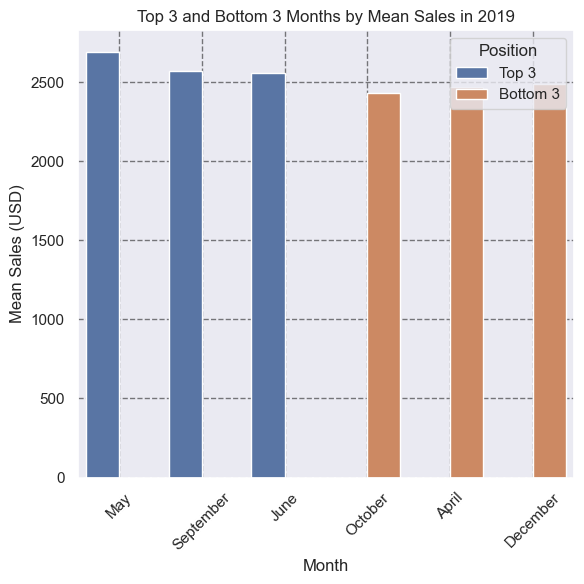

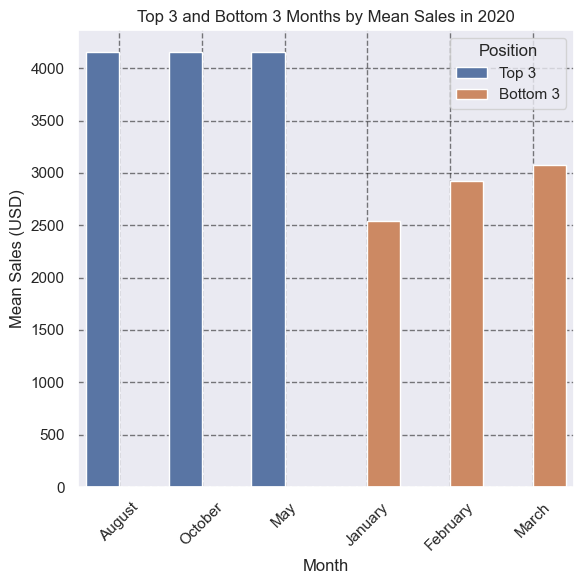

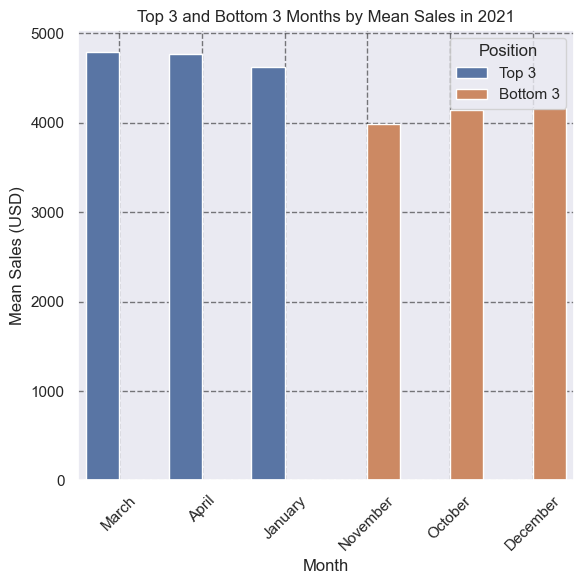

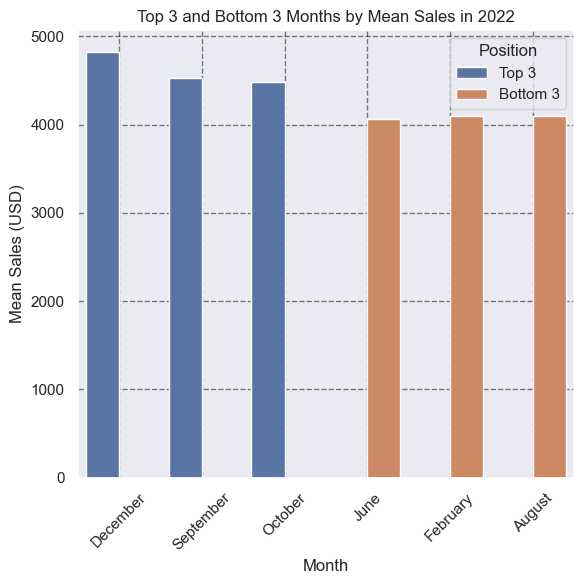

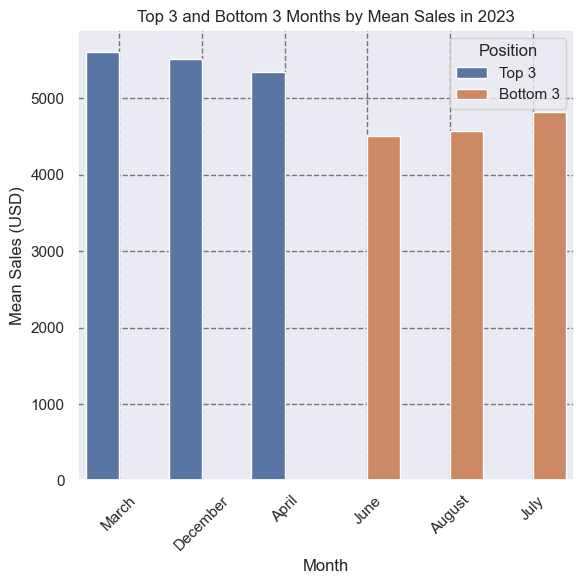

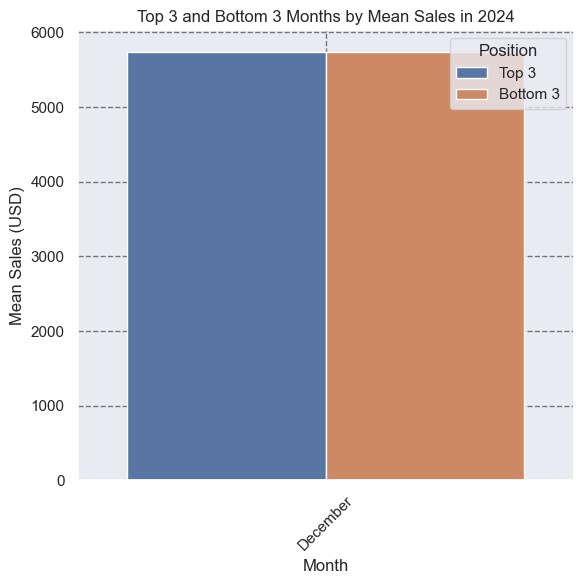

In [439]:
years = monthly_sales['BUSINESS_DATE_FISCAL_YEAR'].unique()
for year in years:
    plt.figure(figsize=(6, 6))
    year_data = results[results['BUSINESS_DATE_FISCAL_YEAR'] == year]
    
    ax = sns.barplot(data=year_data, x='MONTH_NAME', y='NET_SALES_FINAL_USD_AMOUNT', hue='Position')
    
    plt.title(f'Top 3 and Bottom 3 Months by Mean Sales in {year}')
    plt.xlabel('Month')
    plt.ylabel('Mean Sales (USD)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability    
    # Enable grid lines
    ax.grid(True, linestyle='--', alpha=0.5, color = 'black')
    
    plt.tight_layout()
    plt.show()

In [440]:
store_1346.head(1)

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
0    2019-04-23       2127          1346     CA1346       FRANCHISE   

   OPEN_DATE CLOSE_DATE MONTH_NAME DAY_NAME     CITY_NAME STATE_CODE  \
0 2017-11-20 1999-12-31      April  Tuesday  APPLE VALLEY         CA   

   STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
0  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

  REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
0        WEST                   0      2017-11-20             OPERATIONAL   

  GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
0           Domestic             DOMESTICFRANCHISE  LOS ANGELES   

  DISPATCH_GO_LIVE_DATE DOOR_DASH_GO_LIVE_DATE DOOR_DASH_MARKUP_GO_LIVE_DATE  \
0            2018-11-14             2018-11-14                    2020-09-27   

  STORE_CONCEPT_NAME UBER_EATS_MARKUP_DATE  TEMP_CLOSE_INDICATOR  \
0           ORIGINAL            2017-11-20                     0   

   PROJECTION_INCLUDED_INDICATOR  BUSINESS_DATE_FISCAL_DAY_OF_YEAR  \
0                              0                               115   

   BUSINESS_DATE_FISCAL_YEAR  COMP_BUSINESS_DATE_FISCAL_YEAR  \
0                       2019                            2018   

   COMPARABLE_INDICATOR  TRANSACTION_FINAL_COUNT  NET_SALES_FINAL_USD_AMOUNT  \
0                     0                      139                        1943   

   PY_TRANSACTION_FINAL_COUNT  PY_NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE  \
0                           0                              0   No Promotion   

  PROMOTION_OFFER PROMOTION_ITEM  PROMOTION_CASH_AMOUNT  PROMOTION_PERCENTAGE  \
0       No Offers       No Items                      0                   0.0   

      PLATFORM FREQUENCY PROMOTION_COVERAGE  \
0  No Platform      None               None   

   NET_SALES_FINAL_USD_AMOUNT_RESAMPLED  IS_HOLIDAY  
0                                   NaN         0.0

In [457]:
store_1346

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
0       2019-04-23       2127          1346     CA1346       FRANCHISE   
1       2019-04-24       2127          1346     CA1346       FRANCHISE   
2       2019-04-25       2127          1346     CA1346       FRANCHISE   
3       2019-04-26       2127          1346     CA1346       FRANCHISE   
4       2019-04-27       2127          1346     CA1346       FRANCHISE   
...            ...        ...           ...        ...             ...   
1709    2023-12-27       2127          1346     CA1346       FRANCHISE   
1710    2023-12-28       2127          1346     CA1346       FRANCHISE   
1711    2023-12-29       2127          1346     CA1346       FRANCHISE   
1712    2023-12-30       2127          1346     CA1346       FRANCHISE   
1713    2023-12-31       2127          1346     CA1346       FRANCHISE   

      OPEN_DATE CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
0    2017-11-20 1999-12-31      April    Tuesday  APPLE VALLEY         CA   
1    2017-11-20 1999-12-31      April  Wednesday  APPLE VALLEY         CA   
2    2017-11-20 1999-12-31      April   Thursday  APPLE VALLEY         CA   
3    2017-11-20 1999-12-31      April     Friday  APPLE VALLEY         CA   
4    2017-11-20 1999-12-31      April   Saturday  APPLE VALLEY         CA   
...         ...        ...        ...        ...           ...        ...   
1709 2017-11-20 1999-12-31   December  Wednesday  APPLE VALLEY         CA   
1710 2017-11-20 1999-12-31   December   Thursday  APPLE VALLEY         CA   
1711 2017-11-20 1999-12-31   December     Friday  APPLE VALLEY         CA   
1712 2017-11-20 1999-12-31   December   Saturday  APPLE VALLEY         CA   
1713 2017-11-20 1999-12-31   December     Sunday  APPLE VALLEY         CA   

      STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
0     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
2     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
3     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
4     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
...          ...            ...     ...          ...          ...        ...   
1709  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1710  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1711  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1712  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1713  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

     REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
0           WEST                   0      2017-11-20             OPERATIONAL   
1           WEST                   0      2017-11-20             OPERATIONAL   
2           WEST                   0      2017-11-20             OPERATIONAL   
3           WEST                   0      2017-11-20             OPERATIONAL   
4           WEST                   0      2017-11-20             OPERATIONAL   
...          ...                 ...             ...                     ...   
1709        WEST                   0      2017-11-20             OPERATIONAL   
1710        WEST                   0      2017-11-20             OPERATIONAL   
1711        WEST                   0      2017-11-20             OPERATIONAL   
1712        WEST                   0      2017-11-20             OPERATIONAL   
1713        WEST                   0      2017-11-20             OPERATIONAL   

     GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
0              Domestic             DOMESTICFRANCHISE  LOS ANGELES   
1              Domestic             DOMESTICFRANCHISE  LOS ANGELES   
2              Domestic             DOMESTICFRANCHISE  LOS 

In [517]:
def mean(business_date):
    # Convert business_date to Timestamp if it is not already
    business_date = pd.to_datetime(business_date)
    
    # Calculate start and end dates
    start_date = business_date - pd.DateOffset(days=3)
    end_date = business_date + pd.DateOffset(days=3)
    
    # Ensure the 'BUSINESS_DATE' column is of datetime type
    store_1346['BUSINESS_DATE'] = pd.to_datetime(store_1346['BUSINESS_DATE'])
    
    # Filter the DataFrame using Timestamp comparisons
    mean_sales = store_1346[
        (store_1346['BUSINESS_DATE'] >= start_date) &
        (store_1346['BUSINESS_DATE'] <= end_date)
    ]['NET_SALES_FINAL_USD_AMOUNT'].mean()
    
    return mean_sales * 7/6

In [611]:
def mean_2weekly(business_date):
    # Convert business_date to Timestamp if it is not already
    business_date = pd.to_datetime(business_date)
    
    # Calculate start and end dates
    start_date = business_date - pd.DateOffset(days=7)
    end_date = business_date + pd.DateOffset(days=6)
    
    # Ensure the 'BUSINESS_DATE' column is of datetime type
    store_1346['BUSINESS_DATE'] = pd.to_datetime(store_1346['BUSINESS_DATE'])
    
    # Filter the DataFrame using Timestamp comparisons
    mean_sales = store_1346[
        (store_1346['BUSINESS_DATE'] >= start_date) &
        (store_1346['BUSINESS_DATE'] <= end_date)
    ]['NET_SALES_FINAL_USD_AMOUNT'].mean()
    
    return mean_sales * 14/13

In [613]:
mean_2weekly(pd.to_datetime('2019-12-25'))

2815.196428571429

In [508]:
store_1346[~((store_1346['BUSINESS_DATE'] >= pd.to_datetime('2019-12-22')) & (store_1346['BUSINESS_DATE'] <= pd.to_datetime('2019-12-28'))) & (store_1346['YEAR'] == 2019) & (store_1346['MONTH_NAME'] == 'December')]['NET_SALES_FINAL_USD_AMOUNT'].mean()
# monthly average without the holidays week

2639.25

In [516]:
store_1346[ (store_1346['BUSINESS_DATE'] >= pd.to_datetime('2019-12-22')) & (store_1346['BUSINESS_DATE'] <= pd.to_datetime('2019-12-28'))]['NET_SALES_FINAL_USD_AMOUNT'].mean() 
# average in the holidays week

2317.714285714286

In [524]:
import pandas as pd

def mean_not_holidays(business_date):
    # Convert business_date to Timestamp if it is not already
    business_date = pd.to_datetime(business_date)
    
    # Calculate start and end dates
    start_date = business_date - pd.DateOffset(days=3)
    end_date = business_date + pd.DateOffset(days=3)
    
    # Ensure the 'BUSINESS_DATE' column is of datetime type
    store_1346['BUSINESS_DATE'] = pd.to_datetime(store_1346['BUSINESS_DATE'])
    
    # Filter the DataFrame using Timestamp comparisons and excluding the date range around the holiday
    mean_sales = store_1346[
        (~((store_1346['BUSINESS_DATE'] >= start_date) &
        (store_1346['BUSINESS_DATE'] <= end_date))) &
        (store_1346['BUSINESS_DATE'].dt.year == business_date.year) &
        (store_1346['BUSINESS_DATE'].dt.month == business_date.month)
    ]['NET_SALES_FINAL_USD_AMOUNT'].mean()
    
    return mean_sales 

In [525]:
print(mean_not_holidays(pd.to_datetime('2019-12-25')))

2639.25


In [490]:
all_holidays_and_events

DatetimeIndex(['2019-01-01', '2019-01-21', '2019-02-03', '2019-02-14',
               '2019-02-18', '2019-03-17', '2019-04-21', '2019-05-12',
               '2019-05-27', '2019-06-16',
               ...
               '2023-10-09', '2023-10-31', '2023-11-11', '2023-11-23',
               '2023-11-24', '2023-11-25', '2023-11-27', '2023-12-24',
               '2023-12-25', '2023-12-31'],
              dtype='datetime64[ns]', length=110, freq=None)

In [624]:
business_dates = []
mean_7_days = []
mean_rest_of_month = []
mean_14_days = []
# Loop through each holiday/event date and calculate the means
for date in all_holidays_and_events:
    mean_14_days.append(mean_2weekly(date))
    business_dates.append(date)
    mean_7_days.append(mean(date))
    mean_rest_of_month.append(mean_not_holidays(date))

# Create a DataFrame from the lists
results_df = pd.DataFrame({
    'BUSINESS_DATE': business_dates,
    'MEAN_SALES_7_DAYS': mean_7_days,
    'MEAN_SALES_14_DATS': mean_14_days,
    'MEAN_SALES_REST_OF_MONTH': mean_rest_of_month
})

In [625]:
results_df

BUSINESS_DATE  MEAN_SALES_7_DAYS  MEAN_SALES_14_DATS  \
0      2019-01-01                NaN                 NaN   
1      2019-01-21                NaN                 NaN   
2      2019-02-03                NaN                 NaN   
3      2019-02-14                NaN                 NaN   
4      2019-02-18                NaN                 NaN   
..            ...                ...                 ...   
105    2023-11-25        5322.000000         5371.321429   
106    2023-11-27        5911.333333         5548.369048   
107    2023-12-24        5551.500000         5651.363095   
108    2023-12-25        5446.000000         5577.154762   
109    2023-12-31        7317.333333         5205.687500   

     MEAN_SALES_REST_OF_MONTH  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  
..                        ...  
105               5329.826087  
106               5176.086957  
107               5732.625000  
108               5759.000000  
109               5400.148148  

[110 rows x 4 columns]

In [626]:
results_df.dropna(inplace = True)

In [627]:
results_df

BUSINESS_DATE  MEAN_SALES_7_DAYS  MEAN_SALES_14_DATS  \
6      2019-04-21        2465.750000         2711.583333   
7      2019-05-12        3115.666667         2810.011905   
8      2019-05-27        3540.833333         3133.077381   
9      2019-06-16        2900.666667         2693.708333   
10     2019-07-04        2934.000000         2757.934524   
..            ...                ...                 ...   
105    2023-11-25        5322.000000         5371.321429   
106    2023-11-27        5911.333333         5548.369048   
107    2023-12-24        5551.500000         5651.363095   
108    2023-12-25        5446.000000         5577.154762   
109    2023-12-31        7317.333333         5205.687500   

     MEAN_SALES_REST_OF_MONTH  
6                 2585.666667  
7                 2698.833333  
8                 2592.541667  
9                 2579.130435  
10                2520.791667  
..                        ...  
105               5329.826087  
106               5176.086957  
107               5732.625000  
108               5759.000000  
109               5400.148148  

[104 rows x 4 columns]

In [628]:
results_df['PCT_CHANGE'] =  ( results_df['MEAN_SALES_7_DAYS'] - results_df['MEAN_SALES_REST_OF_MONTH'] ) / results_df['MEAN_SALES_7_DAYS'] * 100

In [629]:
results_df

BUSINESS_DATE  MEAN_SALES_7_DAYS  MEAN_SALES_14_DATS  \
6      2019-04-21        2465.750000         2711.583333   
7      2019-05-12        3115.666667         2810.011905   
8      2019-05-27        3540.833333         3133.077381   
9      2019-06-16        2900.666667         2693.708333   
10     2019-07-04        2934.000000         2757.934524   
..            ...                ...                 ...   
105    2023-11-25        5322.000000         5371.321429   
106    2023-11-27        5911.333333         5548.369048   
107    2023-12-24        5551.500000         5651.363095   
108    2023-12-25        5446.000000         5577.154762   
109    2023-12-31        7317.333333         5205.687500   

     MEAN_SALES_REST_OF_MONTH  PCT_CHANGE  
6                 2585.666667   -4.863294  
7                 2698.833333   13.378624  
8                 2592.541667   26.781596  
9                 2579.130435   11.084908  
10                2520.791667   14.083447  
..                        ...         ...  
105               5329.826087   -0.147052  
106               5176.086957   12.437911  
107               5732.625000   -3.262632  
108               5759.000000   -5.747337  
109               5400.148148   26.200599  

[104 rows x 5 columns]

In [630]:
results_df['PCT_CHANGE_14_DAYS'] =  ( results_df['MEAN_SALES_14_DATS'] - results_df['MEAN_SALES_REST_OF_MONTH'] ) / results_df['MEAN_SALES_14_DATS'] * 100

In [631]:
results_df

BUSINESS_DATE  MEAN_SALES_7_DAYS  MEAN_SALES_14_DATS  \
6      2019-04-21        2465.750000         2711.583333   
7      2019-05-12        3115.666667         2810.011905   
8      2019-05-27        3540.833333         3133.077381   
9      2019-06-16        2900.666667         2693.708333   
10     2019-07-04        2934.000000         2757.934524   
..            ...                ...                 ...   
105    2023-11-25        5322.000000         5371.321429   
106    2023-11-27        5911.333333         5548.369048   
107    2023-12-24        5551.500000         5651.363095   
108    2023-12-25        5446.000000         5577.154762   
109    2023-12-31        7317.333333         5205.687500   

     MEAN_SALES_REST_OF_MONTH  PCT_CHANGE  PCT_CHANGE_14_DAYS  
6                 2585.666667   -4.863294            4.643658  
7                 2698.833333   13.378624            3.956516  
8                 2592.541667   26.781596           17.252549  
9                 2579.130435   11.084908            4.253538  
10                2520.791667   14.083447            8.598567  
..                        ...         ...                 ...  
105               5329.826087   -0.147052            0.772535  
106               5176.086957   12.437911            6.709757  
107               5732.625000   -3.262632           -1.437917  
108               5759.000000   -5.747337           -3.260538  
109               5400.148148   26.200599           -3.735542  

[104 rows x 6 columns]

In [608]:
results_df[results_df['PCT_CHANGE'] > 0]

BUSINESS_DATE  MEAN_SALES_7_DAYS  MEAN_SALES_REST_OF_MONTH  PCT_CHANGE
7      2019-05-12        3115.666667               2698.833333   13.378624
8      2019-05-27        3540.833333               2592.541667   26.781596
9      2019-06-16        2900.666667               2579.130435   11.084908
10     2019-07-04        2934.000000               2520.791667   14.083447
11     2019-09-02        2882.500000               2618.320000    9.164961
..            ...                ...                       ...         ...
102    2023-11-11        6123.666667               5120.695652   16.378602
103    2023-11-23        5333.500000               5326.826087    0.125132
104    2023-11-24        5329.333333               5327.913043    0.026650
106    2023-11-27        5911.333333               5176.086957   12.437911
109    2023-12-31        7317.333333               5400.148148   26.200599

[86 rows x 4 columns]

In [632]:
results_df[results_df['PCT_CHANGE'] < 0]

BUSINESS_DATE  MEAN_SALES_7_DAYS  MEAN_SALES_14_DATS  \
6      2019-04-21        2465.750000         2711.583333   
41     2020-12-24        4170.000000         4421.315476   
42     2020-12-25        4081.666667         4641.000000   
47     2021-02-14        4370.833333         4452.345238   
48     2021-02-15        4375.666667         4017.773810   
59     2021-11-25        3909.666667         4086.178571   
60     2021-11-26        3937.166667         4119.142857   
61     2021-11-27        3935.833333         4119.065476   
63     2021-12-24        4248.166667         4307.101190   
64     2021-12-25        4162.166667         4367.535714   
81     2022-11-24        4253.666667         4449.482143   
82     2022-11-25        4305.500000         4448.708333   
83     2022-11-26        4294.666667         4601.226190   
85     2022-12-24        4744.666667         4940.773810   
86     2022-12-25        5002.000000         5085.011905   
105    2023-11-25        5322.000000         5371.321429   
107    2023-12-24        5551.500000         5651.363095   
108    2023-12-25        5446.000000         5577.154762   

     MEAN_SALES_REST_OF_MONTH  PCT_CHANGE  PCT_CHANGE_14_DAYS  
6                 2585.666667   -4.863294            4.643658  
41                4339.333333   -4.060751            1.854248  
42                4361.416667   -6.853818            6.024205  
47                4437.619048   -1.527986            0.330751  
48                4436.238095   -1.384279          -10.415327  
59                4174.695652   -6.778813           -2.166256  
60                4167.521739   -5.850783           -1.174489  
61                4167.869565   -5.895479           -1.184834  
63                4300.291667   -1.227000            0.158100  
64                4321.791667   -3.835142            1.047365  
81                4375.521739   -2.864707            1.662225  
82                4362.000000   -1.312275            1.949068  
83                4364.826087   -1.633641            5.137763  
85                5110.958333   -7.720072           -3.444491  
86                5046.625000   -0.892143            0.754903  
105               5329.826087   -0.147052            0.772535  
107               5732.625000   -3.262632           -1.437917  
108               5759.000000   -5.747337           -3.260538

In [634]:
results_df[results_df['PCT_CHANGE_14_DAYS'] > 0]

BUSINESS_DATE  MEAN_SALES_7_DAYS  MEAN_SALES_14_DATS  \
6      2019-04-21        2465.750000         2711.583333   
7      2019-05-12        3115.666667         2810.011905   
8      2019-05-27        3540.833333         3133.077381   
9      2019-06-16        2900.666667         2693.708333   
10     2019-07-04        2934.000000         2757.934524   
..            ...                ...                 ...   
102    2023-11-11        6123.666667         5797.458333   
103    2023-11-23        5333.500000         5355.303571   
104    2023-11-24        5329.333333         5360.178571   
105    2023-11-25        5322.000000         5371.321429   
106    2023-11-27        5911.333333         5548.369048   

     MEAN_SALES_REST_OF_MONTH  PCT_CHANGE  PCT_CHANGE_14_DAYS  
6                 2585.666667   -4.863294            4.643658  
7                 2698.833333   13.378624            3.956516  
8                 2592.541667   26.781596           17.252549  
9                 2579.130435   11.084908            4.253538  
10                2520.791667   14.083447            8.598567  
..                        ...         ...                 ...  
102               5120.695652   16.378602           11.673438  
103               5326.826087    0.125132            0.531762  
104               5327.913043    0.026650            0.601949  
105               5329.826087   -0.147052            0.772535  
106               5176.086957   12.437911            6.709757  

[91 rows x 6 columns]

In [636]:
results_df[results_df['PCT_CHANGE_14_DAYS'] > 0]['PCT_CHANGE_14_DAYS'].describe()

count    91.000000
mean      6.972117
std       4.634807
min       0.090458
25%       3.900851
50%       6.236502
75%       9.840427
max      22.456732
Name: PCT_CHANGE_14_DAYS, dtype: float64

In [633]:
results_df[results_df['PCT_CHANGE_14_DAYS'] < 0]

BUSINESS_DATE  MEAN_SALES_7_DAYS  MEAN_SALES_14_DATS  \
15     2019-11-28        2601.166667         2523.315476   
25     2020-02-14        3127.833333         2786.178571   
32     2020-07-04        4431.833333         4047.101190   
48     2021-02-15        4375.666667         4017.773810   
59     2021-11-25        3909.666667         4086.178571   
60     2021-11-26        3937.166667         4119.142857   
61     2021-11-27        3935.833333         4119.065476   
70     2022-02-21        4588.000000         3889.011905   
85     2022-12-24        4744.666667         4940.773810   
94     2023-04-09        5631.833333         5497.375000   
107    2023-12-24        5551.500000         5651.363095   
108    2023-12-25        5446.000000         5577.154762   
109    2023-12-31        7317.333333         5205.687500   

     MEAN_SALES_REST_OF_MONTH  PCT_CHANGE  PCT_CHANGE_14_DAYS  
15                2580.291667    0.802525           -2.257989  
25                3001.318182    4.044818           -7.721673  
32                4200.291667    5.224512           -3.785190  
48                4436.238095   -1.384279          -10.415327  
59                4174.695652   -6.778813           -2.166256  
60                4167.521739   -5.850783           -1.174489  
61                4167.869565   -5.895479           -1.184834  
70                4146.047619    9.632789           -6.609281  
85                5110.958333   -7.720072           -3.444491  
94                5500.217391    2.337000           -0.051705  
107               5732.625000   -3.262632           -1.437917  
108               5759.000000   -5.747337           -3.260538  
109               5400.148148   26.200599           -3.735542

In [549]:
spring_months = ['March' , 'April', 'May']
summer_months = ['June', 'July', 'August']
autum_months = ['September', 'October', 'November']
winter_months = ['December', 'January', 'February']
store_1346[store_1346['MONTH_NAME'].isin(spring_months)]

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
0       2019-04-23       2127          1346     CA1346       FRANCHISE   
1       2019-04-24       2127          1346     CA1346       FRANCHISE   
2       2019-04-25       2127          1346     CA1346       FRANCHISE   
3       2019-04-26       2127          1346     CA1346       FRANCHISE   
4       2019-04-27       2127          1346     CA1346       FRANCHISE   
...            ...        ...           ...        ...             ...   
1495    2023-05-27       2127          1346     CA1346       FRANCHISE   
1496    2023-05-28       2127          1346     CA1346       FRANCHISE   
1497    2023-05-29       2127          1346     CA1346       FRANCHISE   
1498    2023-05-30       2127          1346     CA1346       FRANCHISE   
1499    2023-05-31       2127          1346     CA1346       FRANCHISE   

      OPEN_DATE CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
0    2017-11-20 1999-12-31      April    Tuesday  APPLE VALLEY         CA   
1    2017-11-20 1999-12-31      April  Wednesday  APPLE VALLEY         CA   
2    2017-11-20 1999-12-31      April   Thursday  APPLE VALLEY         CA   
3    2017-11-20 1999-12-31      April     Friday  APPLE VALLEY         CA   
4    2017-11-20 1999-12-31      April   Saturday  APPLE VALLEY         CA   
...         ...        ...        ...        ...           ...        ...   
1495 2017-11-20 1999-12-31        May   Saturday  APPLE VALLEY         CA   
1496 2017-11-20 1999-12-31        May     Sunday  APPLE VALLEY         CA   
1497 2017-11-20 1999-12-31        May     Monday  APPLE VALLEY         CA   
1498 2017-11-20 1999-12-31        May    Tuesday  APPLE VALLEY         CA   
1499 2017-11-20 1999-12-31        May  Wednesday  APPLE VALLEY         CA   

      STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
0     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
2     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
3     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
4     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
...          ...            ...     ...          ...          ...        ...   
1495  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1496  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1497  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1498  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1499  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

     REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
0           WEST                   0      2017-11-20             OPERATIONAL   
1           WEST                   0      2017-11-20             OPERATIONAL   
2           WEST                   0      2017-11-20             OPERATIONAL   
3           WEST                   0      2017-11-20             OPERATIONAL   
4           WEST                   0      2017-11-20             OPERATIONAL   
...          ...                 ...             ...                     ...   
1495        WEST                   0      2017-11-20             OPERATIONAL   
1496        WEST                   0      2017-11-20             OPERATIONAL   
1497        WEST                   0      2017-11-20             OPERATIONAL   
1498        WEST                   0      2017-11-20             OPERATIONAL   
1499        WEST                   0      2017-11-20             OPERATIONAL   

     GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
0              Domestic             DOMESTICFRANCHISE  LOS ANGELES   
1              Domestic             DOMESTICFRANCHISE  LOS ANGELES   
2              Domestic             DOMESTICFRANCHISE  LOS 

In [550]:
store_1346[store_1346['MONTH_NAME'].isin(spring_months)]['NET_SALES_FINAL_USD_AMOUNT'].mean()

4321.420147420147

In [544]:
store_1346[store_1346['MONTH_NAME'].isin(summer_months)]

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
39      2019-06-01       2127          1346     CA1346       FRANCHISE   
40      2019-06-02       2127          1346     CA1346       FRANCHISE   
41      2019-06-03       2127          1346     CA1346       FRANCHISE   
42      2019-06-04       2127          1346     CA1346       FRANCHISE   
43      2019-06-05       2127          1346     CA1346       FRANCHISE   
...            ...        ...           ...        ...             ...   
1587    2023-08-27       2127          1346     CA1346       FRANCHISE   
1588    2023-08-28       2127          1346     CA1346       FRANCHISE   
1589    2023-08-29       2127          1346     CA1346       FRANCHISE   
1590    2023-08-30       2127          1346     CA1346       FRANCHISE   
1591    2023-08-31       2127          1346     CA1346       FRANCHISE   

      OPEN_DATE CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
39   2017-11-20 1999-12-31       June   Saturday  APPLE VALLEY         CA   
40   2017-11-20 1999-12-31       June     Sunday  APPLE VALLEY         CA   
41   2017-11-20 1999-12-31       June     Monday  APPLE VALLEY         CA   
42   2017-11-20 1999-12-31       June    Tuesday  APPLE VALLEY         CA   
43   2017-11-20 1999-12-31       June  Wednesday  APPLE VALLEY         CA   
...         ...        ...        ...        ...           ...        ...   
1587 2017-11-20 1999-12-31     August     Sunday  APPLE VALLEY         CA   
1588 2017-11-20 1999-12-31     August     Monday  APPLE VALLEY         CA   
1589 2017-11-20 1999-12-31     August    Tuesday  APPLE VALLEY         CA   
1590 2017-11-20 1999-12-31     August  Wednesday  APPLE VALLEY         CA   
1591 2017-11-20 1999-12-31     August   Thursday  APPLE VALLEY         CA   

      STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
39    CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
40    CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
41    CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
42    CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
43    CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
...          ...            ...     ...          ...          ...        ...   
1587  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1588  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1589  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1590  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1591  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

     REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
39          WEST                   0      2017-11-20             OPERATIONAL   
40          WEST                   0      2017-11-20             OPERATIONAL   
41          WEST                   0      2017-11-20             OPERATIONAL   
42          WEST                   0      2017-11-20             OPERATIONAL   
43          WEST                   0      2017-11-20             OPERATIONAL   
...          ...                 ...             ...                     ...   
1587        WEST                   0      2017-11-20             OPERATIONAL   
1588        WEST                   0      2017-11-20             OPERATIONAL   
1589        WEST                   0      2017-11-20             OPERATIONAL   
1590        WEST                   0      2017-11-20             OPERATIONAL   
1591        WEST                   0      2017-11-20             OPERATIONAL   

     GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
39             Domestic             DOMESTICFRANCHISE  LOS ANGELES   
40             Domestic             DOMESTICFRANCHISE  LOS ANGELES   
41             Domestic             DOMESTICFRANCHISE  LOS 

In [548]:
store_1346[store_1346['MONTH_NAME'].isin(summer_months)]['NET_SALES_FINAL_USD_AMOUNT'].mean()

3937.3804347826085

In [545]:
store_1346[store_1346['MONTH_NAME'].isin(autum_months)]

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
131     2019-09-01       2127          1346     CA1346       FRANCHISE   
132     2019-09-02       2127          1346     CA1346       FRANCHISE   
133     2019-09-03       2127          1346     CA1346       FRANCHISE   
134     2019-09-04       2127          1346     CA1346       FRANCHISE   
135     2019-09-05       2127          1346     CA1346       FRANCHISE   
...            ...        ...           ...        ...             ...   
1678    2023-11-26       2127          1346     CA1346       FRANCHISE   
1679    2023-11-27       2127          1346     CA1346       FRANCHISE   
1680    2023-11-28       2127          1346     CA1346       FRANCHISE   
1681    2023-11-29       2127          1346     CA1346       FRANCHISE   
1682    2023-11-30       2127          1346     CA1346       FRANCHISE   

      OPEN_DATE CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
131  2017-11-20 1999-12-31  September     Sunday  APPLE VALLEY         CA   
132  2017-11-20 1999-12-31  September     Monday  APPLE VALLEY         CA   
133  2017-11-20 1999-12-31  September    Tuesday  APPLE VALLEY         CA   
134  2017-11-20 1999-12-31  September  Wednesday  APPLE VALLEY         CA   
135  2017-11-20 1999-12-31  September   Thursday  APPLE VALLEY         CA   
...         ...        ...        ...        ...           ...        ...   
1678 2017-11-20 1999-12-31   November     Sunday  APPLE VALLEY         CA   
1679 2017-11-20 1999-12-31   November     Monday  APPLE VALLEY         CA   
1680 2017-11-20 1999-12-31   November    Tuesday  APPLE VALLEY         CA   
1681 2017-11-20 1999-12-31   November  Wednesday  APPLE VALLEY         CA   
1682 2017-11-20 1999-12-31   November   Thursday  APPLE VALLEY         CA   

      STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
131   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
132   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
133   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
134   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
135   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
...          ...            ...     ...          ...          ...        ...   
1678  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1679  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1680  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1681  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1682  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

     REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
131         WEST                   0      2017-11-20             OPERATIONAL   
132         WEST                   0      2017-11-20             OPERATIONAL   
133         WEST                   0      2017-11-20             OPERATIONAL   
134         WEST                   0      2017-11-20             OPERATIONAL   
135         WEST                   0      2017-11-20             OPERATIONAL   
...          ...                 ...             ...                     ...   
1678        WEST                   0      2017-11-20             OPERATIONAL   
1679        WEST                   0      2017-11-20             OPERATIONAL   
1680        WEST                   0      2017-11-20             OPERATIONAL   
1681        WEST                   0      2017-11-20             OPERATIONAL   
1682        WEST                   0      2017-11-20             OPERATIONAL   

     GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
131            Domestic             DOMESTICFRANCHISE  LOS ANGELES   
132            Domestic             DOMESTICFRANCHISE  LOS ANGELES   
133            Domestic             DOMESTICFRANCHISE  LOS 

In [551]:
store_1346[store_1346['MONTH_NAME'].isin(autum_months)]['NET_SALES_FINAL_USD_AMOUNT'].mean()

4052.054945054945

In [546]:
store_1346[store_1346['MONTH_NAME'].isin(winter_months)]

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
222     2019-12-01       2127          1346     CA1346       FRANCHISE   
223     2019-12-02       2127          1346     CA1346       FRANCHISE   
224     2019-12-03       2127          1346     CA1346       FRANCHISE   
225     2019-12-04       2127          1346     CA1346       FRANCHISE   
226     2019-12-05       2127          1346     CA1346       FRANCHISE   
...            ...        ...           ...        ...             ...   
1709    2023-12-27       2127          1346     CA1346       FRANCHISE   
1710    2023-12-28       2127          1346     CA1346       FRANCHISE   
1711    2023-12-29       2127          1346     CA1346       FRANCHISE   
1712    2023-12-30       2127          1346     CA1346       FRANCHISE   
1713    2023-12-31       2127          1346     CA1346       FRANCHISE   

      OPEN_DATE CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
222  2017-11-20 1999-12-31   December     Sunday  APPLE VALLEY         CA   
223  2017-11-20 1999-12-31   December     Monday  APPLE VALLEY         CA   
224  2017-11-20 1999-12-31   December    Tuesday  APPLE VALLEY         CA   
225  2017-11-20 1999-12-31   December  Wednesday  APPLE VALLEY         CA   
226  2017-11-20 1999-12-31   December   Thursday  APPLE VALLEY         CA   
...         ...        ...        ...        ...           ...        ...   
1709 2017-11-20 1999-12-31   December  Wednesday  APPLE VALLEY         CA   
1710 2017-11-20 1999-12-31   December   Thursday  APPLE VALLEY         CA   
1711 2017-11-20 1999-12-31   December     Friday  APPLE VALLEY         CA   
1712 2017-11-20 1999-12-31   December   Saturday  APPLE VALLEY         CA   
1713 2017-11-20 1999-12-31   December     Sunday  APPLE VALLEY         CA   

      STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
222   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
223   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
224   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
225   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
226   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
...          ...            ...     ...          ...          ...        ...   
1709  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1710  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1711  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1712  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1713  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

     REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
222         WEST                   0      2017-11-20             OPERATIONAL   
223         WEST                   0      2017-11-20             OPERATIONAL   
224         WEST                   0      2017-11-20             OPERATIONAL   
225         WEST                   0      2017-11-20             OPERATIONAL   
226         WEST                   0      2017-11-20             OPERATIONAL   
...          ...                 ...             ...                     ...   
1709        WEST                   0      2017-11-20             OPERATIONAL   
1710        WEST                   0      2017-11-20             OPERATIONAL   
1711        WEST                   0      2017-11-20             OPERATIONAL   
1712        WEST                   0      2017-11-20             OPERATIONAL   
1713        WEST                   0      2017-11-20             OPERATIONAL   

     GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
222            Domestic             DOMESTICFRANCHISE  LOS ANGELES   
223            Domestic             DOMESTICFRANCHISE  LOS ANGELES   
224            Domestic             DOMESTICFRANCHISE  LOS 

In [552]:
store_1346[store_1346['MONTH_NAME'].isin(winter_months)]['NET_SALES_FINAL_USD_AMOUNT'].mean()

4167.0127551020405

In [573]:
store_1346.loc[ store_1346[store_1346['MONTH_NAME'].isin(summer_months)].index, 'SEASON' ] = 'Summer'

In [576]:
store_1346.loc[ store_1346[store_1346['MONTH_NAME'].isin(spring_months)].index, 'SEASON' ] = 'Spring'
store_1346.loc[ store_1346[store_1346['MONTH_NAME'].isin(autum_months)].index, 'SEASON' ] = 'Autumn'
store_1346.loc[ store_1346[store_1346['MONTH_NAME'].isin(winter_months)].index, 'SEASON' ] = 'Winter'

In [577]:
store_1346

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
0       2019-04-23       2127          1346     CA1346       FRANCHISE   
1       2019-04-24       2127          1346     CA1346       FRANCHISE   
2       2019-04-25       2127          1346     CA1346       FRANCHISE   
3       2019-04-26       2127          1346     CA1346       FRANCHISE   
4       2019-04-27       2127          1346     CA1346       FRANCHISE   
...            ...        ...           ...        ...             ...   
1709    2023-12-27       2127          1346     CA1346       FRANCHISE   
1710    2023-12-28       2127          1346     CA1346       FRANCHISE   
1711    2023-12-29       2127          1346     CA1346       FRANCHISE   
1712    2023-12-30       2127          1346     CA1346       FRANCHISE   
1713    2023-12-31       2127          1346     CA1346       FRANCHISE   

      OPEN_DATE CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
0    2017-11-20 1999-12-31      April    Tuesday  APPLE VALLEY         CA   
1    2017-11-20 1999-12-31      April  Wednesday  APPLE VALLEY         CA   
2    2017-11-20 1999-12-31      April   Thursday  APPLE VALLEY         CA   
3    2017-11-20 1999-12-31      April     Friday  APPLE VALLEY         CA   
4    2017-11-20 1999-12-31      April   Saturday  APPLE VALLEY         CA   
...         ...        ...        ...        ...           ...        ...   
1709 2017-11-20 1999-12-31   December  Wednesday  APPLE VALLEY         CA   
1710 2017-11-20 1999-12-31   December   Thursday  APPLE VALLEY         CA   
1711 2017-11-20 1999-12-31   December     Friday  APPLE VALLEY         CA   
1712 2017-11-20 1999-12-31   December   Saturday  APPLE VALLEY         CA   
1713 2017-11-20 1999-12-31   December     Sunday  APPLE VALLEY         CA   

      STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
0     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
2     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
3     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
4     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
...          ...            ...     ...          ...          ...        ...   
1709  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1710  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1711  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1712  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1713  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

     REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
0           WEST                   0      2017-11-20             OPERATIONAL   
1           WEST                   0      2017-11-20             OPERATIONAL   
2           WEST                   0      2017-11-20             OPERATIONAL   
3           WEST                   0      2017-11-20             OPERATIONAL   
4           WEST                   0      2017-11-20             OPERATIONAL   
...          ...                 ...             ...                     ...   
1709        WEST                   0      2017-11-20             OPERATIONAL   
1710        WEST                   0      2017-11-20             OPERATIONAL   
1711        WEST                   0      2017-11-20             OPERATIONAL   
1712        WEST                   0      2017-11-20             OPERATIONAL   
1713        WEST                   0      2017-11-20             OPERATIONAL   

     GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
0              Domestic             DOMESTICFRANCHISE  LOS ANGELES   
1              Domestic             DOMESTICFRANCHISE  LOS ANGELES   
2              Domestic             DOMESTICFRANCHISE  LOS 

In [591]:
store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR')

SEASON       Autumn       Spring       Summer       Winter
YEAR                                                      
2019    2499.725275  2646.333333  2522.086957  2566.645161
2020    4049.725275  3694.489130  3986.043478  3217.208791
2021    4141.516484  4708.043478  4376.663043  4349.144444
2022    4403.780220  4334.891304  4168.434783  4423.322222
2023    5165.527473  5258.347826  4633.673913  5240.166667

In [586]:
store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Autumn']

YEAR
2019    2499.725275
2020    4049.725275
2021    4141.516484
2022    4403.780220
2023    5165.527473
Name: Autumn, dtype: float64

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='YEAR'>

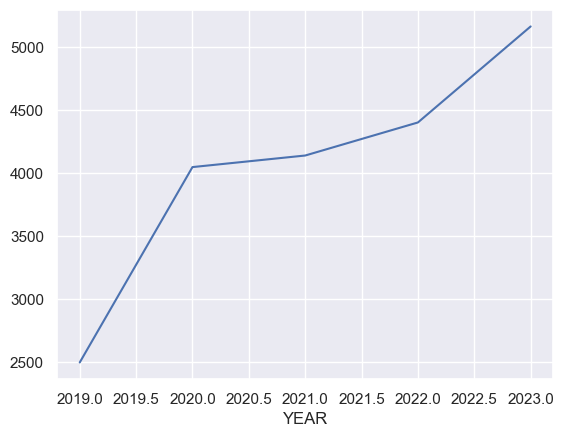

In [587]:
sns.lineplot(data = store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Autumn'],
             x = 'YEAR',
             y = store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack()['Autumn'].values)

In [597]:
store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR')

SEASON       Autumn       Spring       Summer       Winter
YEAR                                                      
2019    2499.725275  2646.333333  2522.086957  2566.645161
2020    4049.725275  3694.489130  3986.043478  3217.208791
2021    4141.516484  4708.043478  4376.663043  4349.144444
2022    4403.780220  4334.891304  4168.434783  4423.322222
2023    5165.527473  5258.347826  4633.673913  5240.166667

In [600]:
store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[0]

SEASON
Autumn    2499.725275
Spring    2646.333333
Summer    2522.086957
Winter    2566.645161
Name: 2019, dtype: float64

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

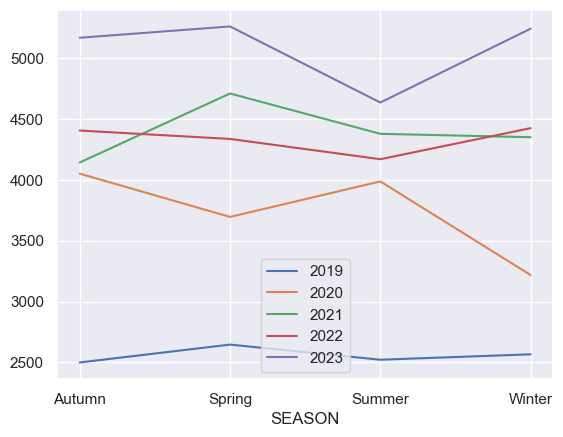

In [606]:
sns.lineplot(data = store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[0],
             x = 'SEASON',
             y = store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[0].values,
            label = '2019')
sns.lineplot(data = store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[1],
             x = 'SEASON',
             y = store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[1].values,
            label = '2020')
sns.lineplot(data = store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[2],
             x = 'SEASON',
             y = store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[2].values,
            label = '2021')
sns.lineplot(data = store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[3],
             x = 'SEASON',
             y = store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[3].values,
            label = '2022')
sns.lineplot(data = store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[4],
             x = 'SEASON',
             y = store_1346.groupby(['YEAR','SEASON'])['NET_SALES_FINAL_USD_AMOUNT'].mean().unstack().reset_index().set_index('YEAR').iloc[4].values,
            label = '2023')
plt.legend()
plt.show()

In [ ]:
# OVERALL TREND -> AUTUMN WITH THE MAX, SUMMER WITH THE MINIMUM AND AUTUMN WITH THE 2ND, WINTER WITH 3RD

In [637]:
store_1346

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
0       2019-04-23       2127          1346     CA1346       FRANCHISE   
1       2019-04-24       2127          1346     CA1346       FRANCHISE   
2       2019-04-25       2127          1346     CA1346       FRANCHISE   
3       2019-04-26       2127          1346     CA1346       FRANCHISE   
4       2019-04-27       2127          1346     CA1346       FRANCHISE   
...            ...        ...           ...        ...             ...   
1709    2023-12-27       2127          1346     CA1346       FRANCHISE   
1710    2023-12-28       2127          1346     CA1346       FRANCHISE   
1711    2023-12-29       2127          1346     CA1346       FRANCHISE   
1712    2023-12-30       2127          1346     CA1346       FRANCHISE   
1713    2023-12-31       2127          1346     CA1346       FRANCHISE   

      OPEN_DATE CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
0    2017-11-20 1999-12-31      April    Tuesday  APPLE VALLEY         CA   
1    2017-11-20 1999-12-31      April  Wednesday  APPLE VALLEY         CA   
2    2017-11-20 1999-12-31      April   Thursday  APPLE VALLEY         CA   
3    2017-11-20 1999-12-31      April     Friday  APPLE VALLEY         CA   
4    2017-11-20 1999-12-31      April   Saturday  APPLE VALLEY         CA   
...         ...        ...        ...        ...           ...        ...   
1709 2017-11-20 1999-12-31   December  Wednesday  APPLE VALLEY         CA   
1710 2017-11-20 1999-12-31   December   Thursday  APPLE VALLEY         CA   
1711 2017-11-20 1999-12-31   December     Friday  APPLE VALLEY         CA   
1712 2017-11-20 1999-12-31   December   Saturday  APPLE VALLEY         CA   
1713 2017-11-20 1999-12-31   December     Sunday  APPLE VALLEY         CA   

      STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
0     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
2     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
3     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
4     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
...          ...            ...     ...          ...          ...        ...   
1709  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1710  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1711  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1712  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1713  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

     REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
0           WEST                   0      2017-11-20             OPERATIONAL   
1           WEST                   0      2017-11-20             OPERATIONAL   
2           WEST                   0      2017-11-20             OPERATIONAL   
3           WEST                   0      2017-11-20             OPERATIONAL   
4           WEST                   0      2017-11-20             OPERATIONAL   
...          ...                 ...             ...                     ...   
1709        WEST                   0      2017-11-20             OPERATIONAL   
1710        WEST                   0      2017-11-20             OPERATIONAL   
1711        WEST                   0      2017-11-20             OPERATIONAL   
1712        WEST                   0      2017-11-20             OPERATIONAL   
1713        WEST                   0      2017-11-20             OPERATIONAL   

     GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
0              Domestic             DOMESTICFRANCHISE  LOS ANGELES   
1              Domestic             DOMESTICFRANCHISE  LOS ANGELES   
2              Domestic             DOMESTICFRANCHISE  LOS 

In [642]:
store_13461 = store_1346.copy()

In [646]:
store_1346.set_index('BUSINESS_DATE',inplace = True)

In [648]:
store_1346.head(1)

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
BUSINESS_DATE                                                                  
2019-04-23          2127          1346     CA1346       FRANCHISE 2017-11-20   

              CLOSE_DATE MONTH_NAME DAY_NAME     CITY_NAME STATE_CODE  \
BUSINESS_DATE                                                           
2019-04-23    1999-12-31      April  Tuesday  APPLE VALLEY         CA   

               STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  \
BUSINESS_DATE                                                                
2019-04-23     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   

               REGION_ID REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE  \
BUSINESS_DATE                                                              
2019-04-23             4        WEST                   0      2017-11-20   

              STORE_FUNCTIONAL_STATUS GLOBAL_REGION_NAME  \
BUSINESS_DATE                                              
2019-04-23                OPERATIONAL           Domestic   

              GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
BUSINESS_DATE                                              
2019-04-23                DOMESTICFRANCHISE  LOS ANGELES   

              DISPATCH_GO_LIVE_DATE DOOR_DASH_GO_LIVE_DATE  \
BUSINESS_DATE                                                
2019-04-23               2018-11-14             2018-11-14   

              DOOR_DASH_MARKUP_GO_LIVE_DATE STORE_CONCEPT_NAME  \
BUSINESS_DATE                                                    
2019-04-23                       2020-09-27           ORIGINAL   

              UBER_EATS_MARKUP_DATE  TEMP_CLOSE_INDICATOR  \
BUSINESS_DATE                                               
2019-04-23               2017-11-20                     0   

               PROJECTION_INCLUDED_INDICATOR  \
BUSINESS_DATE                                  
2019-04-23                                 0   

               BUSINESS_DATE_FISCAL_DAY_OF_YEAR  BUSINESS_DATE_FISCAL_YEAR  \
BUSINESS_DATE                                                                
2019-04-23                                  115                       2019   

               COMP_BUSINESS_DATE_FISCAL_YEAR  COMPARABLE_INDICATOR  \
BUSINESS_DATE                                                         
2019-04-23                               2018                     0   

               TRANSACTION_FINAL_COUNT  NET_SALES_FINAL_USD_AMOUNT  \
BUSINESS_DATE                                                        
2019-04-23                         139                        1943   

               PY_TRANSACTION_FINAL_COUNT  PY_NET_SALES_FINAL_USD_AMOUNT  \
BUSINESS_DATE                                                              
2019-04-23                              0                              0   

              PROMOTION_TYPE PROMOTION_OFFER PROMOTION_ITEM  \
BUSINESS_DATE                                                 
2019-04-23      No Promotion       No Offers       No Items   

               PROMOTION_CASH_AMOUNT  PROMOTION_PERCENTAGE     PLATFORM  \
BUSINESS_DATE                                                             
2019-04-23                         0                   0.0  No Platform   

              FREQUENCY PROMOTION_COVERAGE  \
BUSINESS_DATE                                
2019-04-23         None               None   

               NET_SALES_FINAL_USD_AMOUNT_RESAMPLED  IS_HOLIDAY  YEAR  SEASON  
BUSINESS_DATE                                                                  
2019-04-23                                      NaN         0.0  2019  Spring

In [651]:
store_1346['NET_SALES_FINAL_USD_AMOUNT'].resample('Q').mean()

BUSINESS_DATE
2019-06-30    2607.695652
2019-09-30    2527.152174
2019-12-31    2498.380435
2020-03-31    2845.714286
2020-06-30    3902.439560
2020-09-30    4124.358696
2020-12-31    4069.315217
2021-03-31    4569.133333
2021-06-30    4582.219780
2021-09-30    4342.293478
2021-12-31    4091.293478
2022-03-31    4279.911111
2022-06-30    4204.846154
2022-09-30    4317.510870
2022-12-31    4522.880435
2023-03-31    5271.466667
2023-06-30    4893.824176
2023-09-30    4881.467391
2023-12-31    5248.684783
Freq: Q-DEC, Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

In [655]:
quarterly_data = store_1346['NET_SALES_FINAL_USD_AMOUNT'].resample('Q').mean().reset_index()
quarterly_data

BUSINESS_DATE  NET_SALES_FINAL_USD_AMOUNT
0     2019-06-30                 2607.695652
1     2019-09-30                 2527.152174
2     2019-12-31                 2498.380435
3     2020-03-31                 2845.714286
4     2020-06-30                 3902.439560
5     2020-09-30                 4124.358696
6     2020-12-31                 4069.315217
7     2021-03-31                 4569.133333
8     2021-06-30                 4582.219780
9     2021-09-30                 4342.293478
10    2021-12-31                 4091.293478
11    2022-03-31                 4279.911111
12    2022-06-30                 4204.846154
13    2022-09-30                 4317.510870
14    2022-12-31                 4522.880435
15    2023-03-31                 5271.466667
16    2023-06-30                 4893.824176
17    2023-09-30                 4881.467391
18    2023-12-31                 5248.684783

In [662]:
quarterly_data['PCT_CHANGE'] = (quarterly_data['NET_SALES_FINAL_USD_AMOUNT'] - quarterly_data['NET_SALES_FINAL_USD_AMOUNT'].shift(1)) / quarterly_data['NET_SALES_FINAL_USD_AMOUNT'] * 100
quarterly_data.fillna(0)

BUSINESS_DATE  NET_SALES_FINAL_USD_AMOUNT  PCT_CHANGE
0     2019-06-30                 2607.695652    0.000000
1     2019-09-30                 2527.152174   -3.187124
2     2019-12-31                 2498.380435   -1.151616
3     2020-03-31                 2845.714286   12.205507
4     2020-06-30                 3902.439560   27.078581
5     2020-09-30                 4124.358696    5.380694
6     2020-12-31                 4069.315217   -1.352647
7     2021-03-31                 4569.133333   10.939014
8     2021-06-30                 4582.219780    0.285592
9     2021-09-30                 4342.293478   -5.525336
10    2021-12-31                 4091.293478   -6.134979
11    2022-03-31                 4279.911111    4.407046
12    2022-06-30                 4204.846154   -1.785201
13    2022-09-30                 4317.510870    2.609483
14    2022-12-31                 4522.880435    4.540681
15    2023-03-31                 5271.466667   14.200720
16    2023-06-30                 4893.824176   -7.716716
17    2023-09-30                 4881.467391   -0.253137
18    2023-12-31                 5248.684783    6.996370

In [673]:
monthly_data = store_1346['NET_SALES_FINAL_USD_AMOUNT'].resample('M').mean().reset_index()
monthly_data
monthly_data['PCT_CHANGE'] = (monthly_data['NET_SALES_FINAL_USD_AMOUNT'] - monthly_data['NET_SALES_FINAL_USD_AMOUNT'].shift(1)) / monthly_data['NET_SALES_FINAL_USD_AMOUNT'] * 100
monthly_data.fillna(0,inplace = True)

In [676]:
monthly_data

BUSINESS_DATE  NET_SALES_FINAL_USD_AMOUNT  PCT_CHANGE
0     2019-04-30                 2467.625000    0.000000
1     2019-05-31                 2692.451613    8.350256
2     2019-06-30                 2557.466667   -5.278073
3     2019-07-31                 2519.451613   -1.508862
4     2019-08-31                 2490.483871   -1.163137
5     2019-09-30                 2573.000000    3.207001
6     2019-10-31                 2429.290323   -5.915706
7     2019-11-30                 2499.233333    2.798579
8     2019-12-31                 2566.645161    2.626457
9     2020-01-31                 2542.129032   -0.964394
10    2020-02-29                 2924.000000   13.059883
11    2020-03-31                 3076.064516    4.943476
12    2020-04-30                 3861.233333   20.334664
13    2020-05-31                 4151.548387    6.992934
14    2020-06-30                 3686.233333  -12.623049
15    2020-07-31                 4109.612903   10.302176
16    2020-08-31                 4152.612903    1.035493
17    2020-09-30                 4110.400000   -1.026978
18    2020-10-31                 4151.709677    0.995004
19    2020-11-30                 3883.666667   -6.901803
20    2020-12-31                 4166.580645    6.790076
21    2021-01-31                 4622.967742    9.872167
22    2021-02-28                 4264.821429   -8.397686
23    2021-03-31                 4790.161290   10.967060
24    2021-04-30                 4767.166667   -0.482354
25    2021-05-31                 4568.709677   -4.343830
26    2021-06-30                 4411.233333   -3.569894
27    2021-07-31                 4379.580645   -0.722733
28    2021-08-31                 4340.290323   -0.905246
29    2021-09-30                 4305.833333   -0.800240
30    2021-10-31                 4136.354839   -4.097291
31    2021-11-30                 3982.533333   -3.862403
32    2021-12-31                 4151.483871    4.069642
33    2022-01-31                 4270.096774    2.777757
34    2022-02-28                 4092.678571   -4.335014
35    2022-03-31                 4458.838710    8.212007
36    2022-04-30                 4257.466667   -4.729856
37    2022-05-31                 4285.870968    0.662743
38    2022-06-30                 4068.500000   -5.342779
39    2022-07-31                 4332.677419    6.097325
40    2022-08-31                 4100.903226   -5.651784
41    2022-09-30                 4525.666667    9.385655
42    2022-10-31                 4477.903226   -1.066647
43    2022-11-30                 4205.300000   -6.482373
44    2022-12-31                 4875.193548   13.740861
45    2023-01-31                 5034.838710    3.170810
46    2023-02-28                 5165.821429    2.535564
47    2023-03-31                 5603.516129    7.811072
48    2023-04-30                 5343.200000   -4.871914
49    2023-05-31                 4831.064516  -10.600883
50    2023-06-30                 4509.300000   -7.135576
51    2023-07-31                 4817.225806    6.392181
52    2023-08-31                 4570.483871   -5.398595
53    2023-09-30                 5269.200000   13.260384
54    2023-10-31                 5079.645161   -3.731655
55    2023-11-30                 5150.600000    1.377603
56    2023-12-31                 5512.645161    6.567540

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

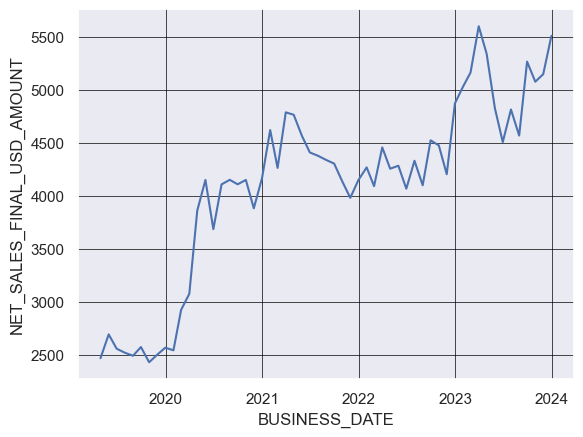

In [683]:
sns.lineplot(data = store_1346['NET_SALES_FINAL_USD_AMOUNT'].resample('M').mean().reset_index(),
             x = 'BUSINESS_DATE',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.grid(True, linestyle='-', linewidth=0.5, color = 'black')
plt.plot()

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

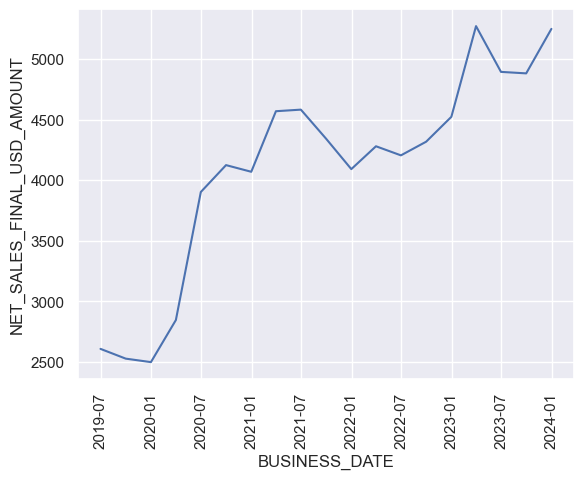

In [654]:
sns.lineplot(data = store_1346['NET_SALES_FINAL_USD_AMOUNT'].resample('Q').mean().reset_index(),
             x = 'BUSINESS_DATE',
             y = 'NET_SALES_FINAL_USD_AMOUNT')
plt.xticks(rotation = 90)
plt.plot()

In [686]:
store_1346

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
BUSINESS_DATE                                                                  
2019-04-23          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-24          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-25          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-26          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-27          2127          1346     CA1346       FRANCHISE 2017-11-20   
...                  ...           ...        ...             ...        ...   
2023-12-27          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-28          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-29          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-30          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-31          2127          1346     CA1346       FRANCHISE 2017-11-20   

              CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
BUSINESS_DATE                                                             
2019-04-23    1999-12-31      April    Tuesday  APPLE VALLEY         CA   
2019-04-24    1999-12-31      April  Wednesday  APPLE VALLEY         CA   
2019-04-25    1999-12-31      April   Thursday  APPLE VALLEY         CA   
2019-04-26    1999-12-31      April     Friday  APPLE VALLEY         CA   
2019-04-27    1999-12-31      April   Saturday  APPLE VALLEY         CA   
...                  ...        ...        ...           ...        ...   
2023-12-27    1999-12-31   December  Wednesday  APPLE VALLEY         CA   
2023-12-28    1999-12-31   December   Thursday  APPLE VALLEY         CA   
2023-12-29    1999-12-31   December     Friday  APPLE VALLEY         CA   
2023-12-30    1999-12-31   December   Saturday  APPLE VALLEY         CA   
2023-12-31    1999-12-31   December     Sunday  APPLE VALLEY         CA   

               STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  \
BUSINESS_DATE                                                                
2019-04-23     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-24     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-25     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-26     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-27     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
...                   ...            ...     ...          ...          ...   
2023-12-27     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-28     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-29     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-30     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-31     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   

               REGION_ID REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE  \
BUSINESS_DATE                                                              
2019-04-23             4        WEST                   0      2017-11-20   
2019-04-24             4        WEST                   0      2017-11-20   
2019-04-25             4        WEST                   0      2017-11-20   
2019-04-26             4        WEST                   0      2017-11-20   
2019-04-27             4        WEST                   0      2017-11-20   
...                  ...         ...                 ...             ...   
2023-12-27             4        WEST                   0      2017-11-20   
2023-12-28             4        WEST                   0      2017-11-20   
2023-12-29             4        WEST                   0      2017-11-20   
2023-12-30             4        WEST                   0      2017-11-20   
2023-12-31             4        WEST                   0      2017-11-2

In [694]:
store_13461[store_13461['BUSINESS_DATE'].dt.date < store_13461['DOOR_DASH_MARKUP_GO_LIVE_DATE']]['NET_SALES_FINAL_USD_AMOUNT'].mean()

3096.135755258126

In [695]:
store_13461[store_13461['BUSINESS_DATE'].dt.date >= store_13461['DOOR_DASH_MARKUP_GO_LIVE_DATE']]['NET_SALES_FINAL_USD_AMOUNT'].mean()

4557.420654911839

In [688]:
store_1346['PLATFORM'].value_counts()

PLATFORM
No Platform    1360
UE              208
DD               90
Inhouse          56
Name: count, dtype: int64

In [696]:
store_1346.groupby('PLATFORM')['NET_SALES_FINAL_USD_AMOUNT'].mean()

C:\Users\yashd\AppData\Local\Temp\ipykernel_14444\3067623953.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_1346.groupby('PLATFORM')['NET_SALES_FINAL_USD_AMOUNT'].mean()


PLATFORM
DD             5039.133333
Inhouse        4656.125000
No Platform    3886.688235
UE             5033.682692
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

In [700]:
store_1346[store_1346['PLATFORM'] == 'DD']

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
BUSINESS_DATE                                                                  
2021-04-09          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-01-21          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-01-22          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-01-28          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-01-29          2127          1346     CA1346       FRANCHISE 2017-11-20   
...                  ...           ...        ...             ...        ...   
2023-12-13          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-14          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-15          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-16          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-17          2127          1346     CA1346       FRANCHISE 2017-11-20   

              CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
BUSINESS_DATE                                                             
2021-04-09    1999-12-31      April     Friday  APPLE VALLEY         CA   
2023-01-21    1999-12-31    January   Saturday  APPLE VALLEY         CA   
2023-01-22    1999-12-31    January     Sunday  APPLE VALLEY         CA   
2023-01-28    1999-12-31    January   Saturday  APPLE VALLEY         CA   
2023-01-29    1999-12-31    January     Sunday  APPLE VALLEY         CA   
...                  ...        ...        ...           ...        ...   
2023-12-13    1999-12-31   December  Wednesday  APPLE VALLEY         CA   
2023-12-14    1999-12-31   December   Thursday  APPLE VALLEY         CA   
2023-12-15    1999-12-31   December     Friday  APPLE VALLEY         CA   
2023-12-16    1999-12-31   December   Saturday  APPLE VALLEY         CA   
2023-12-17    1999-12-31   December     Sunday  APPLE VALLEY         CA   

               STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  \
BUSINESS_DATE                                                                
2021-04-09     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-01-21     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-01-22     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-01-28     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-01-29     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
...                   ...            ...     ...          ...          ...   
2023-12-13     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-14     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-15     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-16     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-17     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   

               REGION_ID REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE  \
BUSINESS_DATE                                                              
2021-04-09             4        WEST                   0      2017-11-20   
2023-01-21             4        WEST                   0      2017-11-20   
2023-01-22             4        WEST                   0      2017-11-20   
2023-01-28             4        WEST                   0      2017-11-20   
2023-01-29             4        WEST                   0      2017-11-20   
...                  ...         ...                 ...             ...   
2023-12-13             4        WEST                   0      2017-11-20   
2023-12-14             4        WEST                   0      2017-11-20   
2023-12-15             4        WEST                   0      2017-11-20   
2023-12-16             4        WEST                   0      2017-11-20   
2023-12-17             4        WEST                   0      2017-11-2

In [701]:
store_1346[store_1346['PLATFORM'] == 'Inhouse']

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
BUSINESS_DATE                                                                  
2021-04-16          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-04-17          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-04-18          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-04-19          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-04-20          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-04-21          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-04-22          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-04-23          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-04-24          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-04-25          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-04-26          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-04-27          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-04-28          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-04-29          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-04-30          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-05-01          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-05-02          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-05-03          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-05-04          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-05-05          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-05-06          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-05-07          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-05-08          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-05-09          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-05-10          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-05-11          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-05-12          2127          1346     CA1346       FRANCHISE 2017-11-20   
2021-05-13          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-03-17          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-03-18          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-03-19          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-03-20          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-03-24          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-03-25          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-03-26          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-03-27          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-04-01          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-04-02          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-04-03          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-04-04          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-09-14          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-09-15          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-09-16          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-09-17          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-09-18          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-09-19          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-09-20          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-09-21          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-09-22     

In [702]:
store_1346[store_1346['PLATFORM'] == 'UE']

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
BUSINESS_DATE                                                                  
2022-11-06          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-11-07          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-11-08          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-11-09          2127          1346     CA1346       FRANCHISE 2017-11-20   
2022-11-10          2127          1346     CA1346       FRANCHISE 2017-11-20   
...                  ...           ...        ...             ...        ...   
2023-12-06          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-07          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-08          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-09          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-10          2127          1346     CA1346       FRANCHISE 2017-11-20   

              CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
BUSINESS_DATE                                                             
2022-11-06    1999-12-31   November     Sunday  APPLE VALLEY         CA   
2022-11-07    1999-12-31   November     Monday  APPLE VALLEY         CA   
2022-11-08    1999-12-31   November    Tuesday  APPLE VALLEY         CA   
2022-11-09    1999-12-31   November  Wednesday  APPLE VALLEY         CA   
2022-11-10    1999-12-31   November   Thursday  APPLE VALLEY         CA   
...                  ...        ...        ...           ...        ...   
2023-12-06    1999-12-31   December  Wednesday  APPLE VALLEY         CA   
2023-12-07    1999-12-31   December   Thursday  APPLE VALLEY         CA   
2023-12-08    1999-12-31   December     Friday  APPLE VALLEY         CA   
2023-12-09    1999-12-31   December   Saturday  APPLE VALLEY         CA   
2023-12-10    1999-12-31   December     Sunday  APPLE VALLEY         CA   

               STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  \
BUSINESS_DATE                                                                
2022-11-06     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2022-11-07     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2022-11-08     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2022-11-09     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2022-11-10     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
...                   ...            ...     ...          ...          ...   
2023-12-06     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-07     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-08     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-09     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-10     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   

               REGION_ID REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE  \
BUSINESS_DATE                                                              
2022-11-06             4        WEST                   0      2017-11-20   
2022-11-07             4        WEST                   0      2017-11-20   
2022-11-08             4        WEST                   0      2017-11-20   
2022-11-09             4        WEST                   0      2017-11-20   
2022-11-10             4        WEST                   0      2017-11-20   
...                  ...         ...                 ...             ...   
2023-12-06             4        WEST                   0      2017-11-20   
2023-12-07             4        WEST                   0      2017-11-20   
2023-12-08             4        WEST                   0      2017-11-20   
2023-12-09             4        WEST                   0      2017-11-20   
2023-12-10             4        WEST                   0      2017-11-2

In [705]:
store_13461[(store_13461['PLATFORM'] == 'No Platform') & (store_13461['BUSINESS_DATE'] > pd.to_datetime('2021-04-09'))]['NET_SALES_FINAL_USD_AMOUNT'].mean()

4397.312597200622

In [706]:
store_1346.groupby('PLATFORM')['NET_SALES_FINAL_USD_AMOUNT'].mean()

C:\Users\yashd\AppData\Local\Temp\ipykernel_14444\3067623953.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_1346.groupby('PLATFORM')['NET_SALES_FINAL_USD_AMOUNT'].mean()


PLATFORM
DD             5039.133333
Inhouse        4656.125000
No Platform    3886.688235
UE             5033.682692
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

In [707]:
store_1346[store_1346['PLATFORM'] == 'DD'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean()

C:\Users\yashd\AppData\Local\Temp\ipykernel_14444\2854307030.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_1346[store_1346['PLATFORM'] == 'DD'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean()


PROMOTION_TYPE
Delivery Fee        5793.000000
Free Item           5358.250000
No Promotion                NaN
Overall Discount    4880.295082
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

In [708]:
store_1346[store_1346['PLATFORM'] == 'DD'].groupby('PROMOTION_OFFER')['NET_SALES_FINAL_USD_AMOUNT'].mean()

C:\Users\yashd\AppData\Local\Temp\ipykernel_14444\2221057462.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_1346[store_1346['PLATFORM'] == 'DD'].groupby('PROMOTION_OFFER')['NET_SALES_FINAL_USD_AMOUNT'].mean()


PROMOTION_OFFER
Delivery            5793.000000
Dessert                     NaN
No Offers                   NaN
Overall Discount    4880.295082
Protein             5343.000000
Side                5373.500000
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

In [709]:
store_1346[store_1346['PLATFORM'] == 'DD'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean()

C:\Users\yashd\AppData\Local\Temp\ipykernel_14444\2659295884.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_1346[store_1346['PLATFORM'] == 'DD'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean()


PROMOTION_ITEM
All Items           4880.295082
Brownie                     NaN
Chicken Sandwich    5248.142857
Corn                        NaN
Delivery Fee        5793.000000
Fries               5373.500000
No Items                    NaN
Sandwich            5437.857143
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

In [710]:
store_1346[store_1346['PLATFORM'] == 'UE'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean()

C:\Users\yashd\AppData\Local\Temp\ipykernel_14444\3688895159.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_1346[store_1346['PLATFORM'] == 'UE'].groupby('PROMOTION_TYPE')['NET_SALES_FINAL_USD_AMOUNT'].mean()


PROMOTION_TYPE
Delivery Fee                NaN
Free Item           5116.625668
No Promotion                NaN
Overall Discount    4295.095238
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

In [713]:
store_1346[store_1346['PLATFORM'] == 'UE'].groupby('PROMOTION_OFFER')['NET_SALES_FINAL_USD_AMOUNT'].mean()

C:\Users\yashd\AppData\Local\Temp\ipykernel_14444\2478486281.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_1346[store_1346['PLATFORM'] == 'UE'].groupby('PROMOTION_OFFER')['NET_SALES_FINAL_USD_AMOUNT'].mean()


PROMOTION_OFFER
Delivery                    NaN
Dessert             5672.285714
No Offers                   NaN
Overall Discount    4295.095238
Protein             5210.714286
Side                4976.719101
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

In [711]:
store_1346[store_1346['PLATFORM'] == 'UE'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean()

C:\Users\yashd\AppData\Local\Temp\ipykernel_14444\1743740032.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_1346[store_1346['PLATFORM'] == 'UE'].groupby('PROMOTION_ITEM')['NET_SALES_FINAL_USD_AMOUNT'].mean()


PROMOTION_ITEM
All Items           4295.095238
Brownie             5672.285714
Chicken Sandwich    5307.969231
Corn                5618.000000
Delivery Fee                NaN
Fries               4946.541176
No Items                    NaN
Sandwich            4967.576923
Name: NET_SALES_FINAL_USD_AMOUNT, dtype: float64

In [722]:
day_wise = store_1346.groupby('DAY_NAME')[['TRANSACTION_FINAL_COUNT','NET_SALES_FINAL_USD_AMOUNT']].mean().reset_index()
day_wise

DAY_NAME  TRANSACTION_FINAL_COUNT  NET_SALES_FINAL_USD_AMOUNT
0     Friday               201.355102                 4981.706122
1     Monday               162.118852                 3485.102459
2   Saturday               187.591837                 4839.420408
3     Sunday               178.510204                 4624.608163
4   Thursday               160.579592                 3719.444898
5    Tuesday               166.661224                 3533.636735
6  Wednesday               154.938776                 3594.253061

In [723]:
day_wise['PER_PRODUCT'] = day_wise['NET_SALES_FINAL_USD_AMOUNT'] / day_wise['TRANSACTION_FINAL_COUNT']

In [748]:
day_wise.sort_values('NET_SALES_FINAL_USD_AMOUNT',ascending = False)

DAY_NAME  TRANSACTION_FINAL_COUNT  NET_SALES_FINAL_USD_AMOUNT  PER_PRODUCT
0     Friday               201.355102                 4981.706122    24.740898
2   Saturday               187.591837                 4839.420408    25.797607
3     Sunday               178.510204                 4624.608163    25.906688
4   Thursday               160.579592                 3719.444898    23.162625
6  Wednesday               154.938776                 3594.253061    23.197893
5    Tuesday               166.661224                 3533.636735    21.202513
1     Monday               162.118852                 3485.102459    21.497207

In [725]:
all_holidays_and_events

DatetimeIndex(['2019-01-01', '2019-01-21', '2019-02-03', '2019-02-14',
               '2019-02-18', '2019-03-17', '2019-04-21', '2019-05-12',
               '2019-05-27', '2019-06-16',
               ...
               '2023-10-09', '2023-10-31', '2023-11-11', '2023-11-23',
               '2023-11-24', '2023-11-25', '2023-11-27', '2023-12-24',
               '2023-12-25', '2023-12-31'],
              dtype='datetime64[ns]', length=110, freq=None)

In [727]:
days_col = pd.DataFrame(all_holidays_and_events, columns=['date'])
days_col

date
0   2019-01-01
1   2019-01-21
2   2019-02-03
3   2019-02-14
4   2019-02-18
..         ...
105 2023-11-25
106 2023-11-27
107 2023-12-24
108 2023-12-25
109 2023-12-31

[110 rows x 1 columns]

In [731]:
days_col['week_day'] = days_col['date'].dt.day_name()
days_col['week_day'].value_counts()

week_day
Monday       35
Sunday       28
Thursday     12
Friday       12
Saturday     12
Tuesday       7
Wednesday     4
Name: count, dtype: int64

In [734]:
store_1346[store_1346['DAY_NAME'] == 'Friday']['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        193
Free Item            32
Overall Discount     11
Delivery Fee          9
Name: count, dtype: int64

In [736]:
52/ (52+193)

0.21224489795918366

In [735]:
store_1346[store_1346['DAY_NAME'] == 'Monday']['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        196
Free Item            29
Overall Discount     12
Delivery Fee          7
Name: count, dtype: int64

In [737]:
48/(48+196)

0.19672131147540983

In [738]:
store_1346[store_1346['DAY_NAME'] == 'Saturday']['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        190
Free Item            34
Overall Discount     13
Delivery Fee          8
Name: count, dtype: int64

In [739]:
55 / (55+190)

0.22448979591836735

In [740]:
store_1346[store_1346['DAY_NAME'] == 'Sunday']['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        190
Free Item            34
Overall Discount     13
Delivery Fee          8
Name: count, dtype: int64

In [742]:
store_1346[store_1346['DAY_NAME'] == 'Tuesday']['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        202
Free Item            27
Overall Discount     11
Delivery Fee          5
Name: count, dtype: int64

In [743]:
43 / (43+202)

0.17551020408163265

In [744]:
store_1346[store_1346['DAY_NAME'] == 'Wednesday']['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        193
Free Item            29
Delivery Fee         12
Overall Discount     11
Name: count, dtype: int64

In [745]:
52/ (52 + 193)

0.21224489795918366

In [746]:
store_1346[store_1346['DAY_NAME'] == 'Thursday']['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        196
Free Item            30
Overall Discount     11
Delivery Fee          8
Name: count, dtype: int64

In [747]:
49 / (49+ 196)

0.2

In [755]:
pd.pivot_table(data = store_1346,
               index = 'PROMOTION_TYPE',
               columns = 'DAY_NAME',
               values = 'TRANSACTION_FINAL_COUNT',
               aggfunc = 'mean')

DAY_NAME              Friday      Monday    Saturday      Sunday    Thursday  \
PROMOTION_TYPE                                                                 
Delivery Fee      199.111111  171.571429  205.125000  191.375000  173.500000   
Free Item         235.531250  179.517241  218.823529  203.411765  191.100000   
No Promotion      194.378238  159.188776  180.563158  172.026316  155.122449   
Overall Discount  226.181818  162.416667  197.846154  200.230769  165.181818   

DAY_NAME             Tuesday   Wednesday  
PROMOTION_TYPE                            
Delivery Fee      174.600000  178.666667  
Free Item         178.370370  180.448276  
No Promotion      164.960396  149.191710  
Overall Discount  165.545455  162.636364

In [766]:
pd.pivot_table(data = store_1346,
               index = 'PROMOTION_TYPE',
               columns = 'DAY_NAME',
               values = 'PER_SALE',
               aggfunc = 'mean')

DAY_NAME             Friday     Monday   Saturday     Sunday   Thursday  \
PROMOTION_TYPE                                                            
Delivery Fee      25.823061  22.360493  27.360878  27.004328  24.066615   
Free Item         26.733011  23.297613  28.134879  27.800623  24.445121   
No Promotion      23.959346  20.920725  24.776442  24.896933  22.482193   
Overall Discount  26.233637  22.721336  28.064715  28.102448  25.311281   

DAY_NAME            Tuesday  Wednesday  
PROMOTION_TYPE                          
Delivery Fee      21.480849  25.777912  
Free Item         23.173443  24.967750  
No Promotion      20.648184  22.316399  
Overall Discount  23.447151  24.915892

In [765]:
pd.pivot_table(data = store_1346,
               index = 'PROMOTION_OFFER',
               values = 'PER_SALE',
               aggfunc = 'mean')

PER_SALE
PROMOTION_OFFER            
Delivery          25.142540
Dessert           25.599374
No Offers         22.827732
Overall Discount  25.635870
Protein           25.447841
Side              25.871617

In [3]:
import pandas as pd

# Define the data as a dictionary
data = {
    'PROMOTION_OFFER': ['Delivery', 'Dessert', 'No Offers', 'Overall Discount', 'Protein', 'Side'],
    'PER_SALE': [25.142540, 25.599374, 22.827732, 25.635870, 25.447841, 25.871617]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Set the 'PROMOTION_OFFER' as the index if needed
df.set_index('PROMOTION_OFFER', inplace=True)

# Display the DataFrame
df.csv('


PER_SALE
PROMOTION_OFFER            
Delivery          25.142540
Dessert           25.599374
No Offers         22.827732
Overall Discount  25.635870
Protein           25.447841
Side              25.871617

In [763]:
store_1346['PER_SALE'] = store_1346['NET_SALES_FINAL_USD_AMOUNT'] / store_1346['TRANSACTION_FINAL_COUNT']

In [776]:
store_13461[store_13461['PROMOTION_TYPE'] != 'No Promotion']

BUSINESS_DATE  STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  \
717     2021-04-09       2127          1346     CA1346       FRANCHISE   
724     2021-04-16       2127          1346     CA1346       FRANCHISE   
725     2021-04-17       2127          1346     CA1346       FRANCHISE   
726     2021-04-18       2127          1346     CA1346       FRANCHISE   
727     2021-04-19       2127          1346     CA1346       FRANCHISE   
...            ...        ...           ...        ...             ...   
1695    2023-12-13       2127          1346     CA1346       FRANCHISE   
1696    2023-12-14       2127          1346     CA1346       FRANCHISE   
1697    2023-12-15       2127          1346     CA1346       FRANCHISE   
1698    2023-12-16       2127          1346     CA1346       FRANCHISE   
1699    2023-12-17       2127          1346     CA1346       FRANCHISE   

      OPEN_DATE CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
717  2017-11-20 1999-12-31      April     Friday  APPLE VALLEY         CA   
724  2017-11-20 1999-12-31      April     Friday  APPLE VALLEY         CA   
725  2017-11-20 1999-12-31      April   Saturday  APPLE VALLEY         CA   
726  2017-11-20 1999-12-31      April     Sunday  APPLE VALLEY         CA   
727  2017-11-20 1999-12-31      April     Monday  APPLE VALLEY         CA   
...         ...        ...        ...        ...           ...        ...   
1695 2017-11-20 1999-12-31   December  Wednesday  APPLE VALLEY         CA   
1696 2017-11-20 1999-12-31   December   Thursday  APPLE VALLEY         CA   
1697 2017-11-20 1999-12-31   December     Friday  APPLE VALLEY         CA   
1698 2017-11-20 1999-12-31   December   Saturday  APPLE VALLEY         CA   
1699 2017-11-20 1999-12-31   December     Sunday  APPLE VALLEY         CA   

      STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  REGION_ID  \
717   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
724   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
725   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
726   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
727   CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
...          ...            ...     ...          ...          ...        ...   
1695  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1696  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1697  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1698  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   
1699  CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE          4   

     REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE STORE_FUNCTIONAL_STATUS  \
717         WEST                   0      2017-11-20             OPERATIONAL   
724         WEST                   0      2017-11-20             OPERATIONAL   
725         WEST                   0      2017-11-20             OPERATIONAL   
726         WEST                   0      2017-11-20             OPERATIONAL   
727         WEST                   0      2017-11-20             OPERATIONAL   
...          ...                 ...             ...                     ...   
1695        WEST                   0      2017-11-20             OPERATIONAL   
1696        WEST                   0      2017-11-20             OPERATIONAL   
1697        WEST                   0      2017-11-20             OPERATIONAL   
1698        WEST                   0      2017-11-20             OPERATIONAL   
1699        WEST                   0      2017-11-20             OPERATIONAL   

     GLOBAL_REGION_NAME GLOBAL_REGION_STORE_TYPE_NAME  AREA_REGION  \
717            Domestic             DOMESTICFRANCHISE  LOS ANGELES   
724            Domestic             DOMESTICFRANCHISE  LOS ANGELES   
725            Domestic             DOMESTICFRANCHISE  LOS 

In [786]:
store_1346

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
BUSINESS_DATE                                                                  
2019-04-23          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-24          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-25          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-26          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-27          2127          1346     CA1346       FRANCHISE 2017-11-20   
...                  ...           ...        ...             ...        ...   
2023-12-27          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-28          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-29          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-30          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-31          2127          1346     CA1346       FRANCHISE 2017-11-20   

              CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
BUSINESS_DATE                                                             
2019-04-23    1999-12-31      April    Tuesday  APPLE VALLEY         CA   
2019-04-24    1999-12-31      April  Wednesday  APPLE VALLEY         CA   
2019-04-25    1999-12-31      April   Thursday  APPLE VALLEY         CA   
2019-04-26    1999-12-31      April     Friday  APPLE VALLEY         CA   
2019-04-27    1999-12-31      April   Saturday  APPLE VALLEY         CA   
...                  ...        ...        ...           ...        ...   
2023-12-27    1999-12-31   December  Wednesday  APPLE VALLEY         CA   
2023-12-28    1999-12-31   December   Thursday  APPLE VALLEY         CA   
2023-12-29    1999-12-31   December     Friday  APPLE VALLEY         CA   
2023-12-30    1999-12-31   December   Saturday  APPLE VALLEY         CA   
2023-12-31    1999-12-31   December     Sunday  APPLE VALLEY         CA   

               STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  \
BUSINESS_DATE                                                                
2019-04-23     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-24     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-25     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-26     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-27     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
...                   ...            ...     ...          ...          ...   
2023-12-27     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-28     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-29     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-30     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-31     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   

               REGION_ID REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE  \
BUSINESS_DATE                                                              
2019-04-23             4        WEST                   0      2017-11-20   
2019-04-24             4        WEST                   0      2017-11-20   
2019-04-25             4        WEST                   0      2017-11-20   
2019-04-26             4        WEST                   0      2017-11-20   
2019-04-27             4        WEST                   0      2017-11-20   
...                  ...         ...                 ...             ...   
2023-12-27             4        WEST                   0      2017-11-20   
2023-12-28             4        WEST                   0      2017-11-20   
2023-12-29             4        WEST                   0      2017-11-20   
2023-12-30             4        WEST                   0      2017-11-20   
2023-12-31             4        WEST                   0      2017-11-2

In [837]:
new = pd.DataFrame(store_1346['NET_SALES_FINAL_USD_AMOUNT'].rolling(30).mean())
new.fillna(0)

NET_SALES_FINAL_USD_AMOUNT
BUSINESS_DATE                            
2019-04-23                       0.000000
2019-04-24                       0.000000
2019-04-25                       0.000000
2019-04-26                       0.000000
2019-04-27                       0.000000
...                                   ...
2023-12-27                    5336.133333
2023-12-28                    5372.433333
2023-12-29                    5442.400000
2023-12-30                    5505.100000
2023-12-31                    5483.366667

[1714 rows x 1 columns]

In [838]:
new['PROMOTION_TYPE'] = store_1346['PROMOTION_TYPE']

In [841]:
new

NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE
BUSINESS_DATE                                           
2019-04-23                       0.000000   No Promotion
2019-04-24                       0.000000   No Promotion
2019-04-25                       0.000000   No Promotion
2019-04-26                       0.000000   No Promotion
2019-04-27                       0.000000   No Promotion
...                                   ...            ...
2023-12-27                    5336.133333   No Promotion
2023-12-28                    5372.433333   No Promotion
2023-12-29                    5442.400000   No Promotion
2023-12-30                    5505.100000   No Promotion
2023-12-31                    5483.366667   No Promotion

[1714 rows x 2 columns]

In [844]:
new['PCT_CHANGE'] =  (new['NET_SALES_FINAL_USD_AMOUNT'] - new['NET_SALES_FINAL_USD_AMOUNT'].shift(1))/new['NET_SALES_FINAL_USD_AMOUNT'] * 100
new

NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE  PCT_CHANGE
BUSINESS_DATE                                                       
2019-04-23                       0.000000   No Promotion         NaN
2019-04-24                       0.000000   No Promotion         NaN
2019-04-25                       0.000000   No Promotion         NaN
2019-04-26                       0.000000   No Promotion         NaN
2019-04-27                       0.000000   No Promotion         NaN
...                                   ...            ...         ...
2023-12-27                    5336.133333   No Promotion    0.868919
2023-12-28                    5372.433333   No Promotion    0.675671
2023-12-29                    5442.400000   No Promotion    1.285585
2023-12-30                    5505.100000   No Promotion    1.138944
2023-12-31                    5483.366667   No Promotion   -0.396350

[1714 rows x 3 columns]

In [845]:
new['PCT_CHANGE'] = new['PCT_CHANGE'].fillna(0)

In [846]:
new.reset_index()

BUSINESS_DATE  NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE  PCT_CHANGE
0       2019-04-23                    0.000000   No Promotion    0.000000
1       2019-04-24                    0.000000   No Promotion    0.000000
2       2019-04-25                    0.000000   No Promotion    0.000000
3       2019-04-26                    0.000000   No Promotion    0.000000
4       2019-04-27                    0.000000   No Promotion    0.000000
...            ...                         ...            ...         ...
1709    2023-12-27                 5336.133333   No Promotion    0.868919
1710    2023-12-28                 5372.433333   No Promotion    0.675671
1711    2023-12-29                 5442.400000   No Promotion    1.285585
1712    2023-12-30                 5505.100000   No Promotion    1.138944
1713    2023-12-31                 5483.366667   No Promotion   -0.396350

[1714 rows x 4 columns]

In [847]:
new[new['PCT_CHANGE'] < 0]

NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE  PCT_CHANGE
BUSINESS_DATE                                                       
2019-05-28                    2599.533333   No Promotion   -1.588747
2019-06-03                    2733.000000   No Promotion   -0.336626
2019-06-06                    2745.766667   No Promotion   -0.171173
2019-06-08                    2775.266667   No Promotion   -0.314684
2019-06-09                    2747.000000   No Promotion   -1.029001
...                                   ...            ...         ...
2023-12-18                    5340.300000   No Promotion   -1.018669
2023-12-19                    5265.333333   No Promotion   -1.423778
2023-12-24                    5474.200000   No Promotion   -2.248121
2023-12-25                    5282.100000   No Promotion   -3.636811
2023-12-31                    5483.366667   No Promotion   -0.396350

[805 rows x 3 columns]

In [848]:
new[new['PCT_CHANGE'] < 0]['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        649
Free Item            95
Overall Discount     39
Delivery Fee         22
Name: count, dtype: int64

In [849]:
(95+39+22) / 805 

0.1937888198757764

In [853]:
new[(new['PCT_CHANGE'] >= 0) & (new['NET_SALES_FINAL_USD_AMOUNT'] > 0)]

NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE  PCT_CHANGE
BUSINESS_DATE                                                       
2019-05-22                    2547.933333   No Promotion  100.000000
2019-05-23                    2551.733333   No Promotion    0.148918
2019-05-24                    2596.733333   No Promotion    1.732947
2019-05-25                    2635.300000   No Promotion    1.463464
2019-05-26                    2635.566667   No Promotion    0.010118
...                                   ...            ...         ...
2023-12-26                    5289.766667   No Promotion    0.144934
2023-12-27                    5336.133333   No Promotion    0.868919
2023-12-28                    5372.433333   No Promotion    0.675671
2023-12-29                    5442.400000   No Promotion    1.285585
2023-12-30                    5505.100000   No Promotion    1.138944

[880 rows x 3 columns]

In [854]:
new[(new['PCT_CHANGE'] >= 0) & (new['NET_SALES_FINAL_USD_AMOUNT'] > 0)]['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        682
Free Item           120
Overall Discount     43
Delivery Fee         35
Name: count, dtype: int64

In [855]:
(120+43+35) / 880

0.225

In [ ]:
# 22.5 percent times promotion applied (when the graph is on a upward curve on a 30 day rolling period) as compared to 19.3 percent times

In [862]:
new1 = pd.DataFrame(store_1346['NET_SALES_FINAL_USD_AMOUNT'].rolling(7).mean())
new1.fillna(0)

NET_SALES_FINAL_USD_AMOUNT
BUSINESS_DATE                            
2019-04-23                       0.000000
2019-04-24                       0.000000
2019-04-25                       0.000000
2019-04-26                       0.000000
2019-04-27                       0.000000
...                                   ...
2023-12-27                    4758.428571
2023-12-28                    4668.000000
2023-12-29                    4732.428571
2023-12-30                    4671.857143
2023-12-31                    5167.857143

[1714 rows x 1 columns]

In [863]:
new1['PROMOTION_TYPE'] = store_1346['PROMOTION_TYPE']

In [864]:
new1

NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE
BUSINESS_DATE                                           
2019-04-23                            NaN   No Promotion
2019-04-24                            NaN   No Promotion
2019-04-25                            NaN   No Promotion
2019-04-26                            NaN   No Promotion
2019-04-27                            NaN   No Promotion
...                                   ...            ...
2023-12-27                    4758.428571   No Promotion
2023-12-28                    4668.000000   No Promotion
2023-12-29                    4732.428571   No Promotion
2023-12-30                    4671.857143   No Promotion
2023-12-31                    5167.857143   No Promotion

[1714 rows x 2 columns]

In [865]:
new1['PCT_CHANGE'] =  (new1['NET_SALES_FINAL_USD_AMOUNT'] - new1['NET_SALES_FINAL_USD_AMOUNT'].shift(1))/new1['NET_SALES_FINAL_USD_AMOUNT'] * 100
new1

NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE  PCT_CHANGE
BUSINESS_DATE                                                       
2019-04-23                            NaN   No Promotion         NaN
2019-04-24                            NaN   No Promotion         NaN
2019-04-25                            NaN   No Promotion         NaN
2019-04-26                            NaN   No Promotion         NaN
2019-04-27                            NaN   No Promotion         NaN
...                                   ...            ...         ...
2023-12-27                    4758.428571   No Promotion    1.726260
2023-12-28                    4668.000000   No Promotion   -1.937202
2023-12-29                    4732.428571   No Promotion    1.361427
2023-12-30                    4671.857143   No Promotion   -1.296517
2023-12-31                    5167.857143   No Promotion    9.597789

[1714 rows x 3 columns]

In [866]:
new1['PCT_CHANGE'] = new1['PCT_CHANGE'].fillna(0)
new1['NET_SALES_FINAL_USD_AMOUNT'] = new1['NET_SALES_FINAL_USD_AMOUNT'].fillna(0)

In [867]:
new1.reset_index()

BUSINESS_DATE  NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE  PCT_CHANGE
0       2019-04-23                    0.000000   No Promotion    0.000000
1       2019-04-24                    0.000000   No Promotion    0.000000
2       2019-04-25                    0.000000   No Promotion    0.000000
3       2019-04-26                    0.000000   No Promotion    0.000000
4       2019-04-27                    0.000000   No Promotion    0.000000
...            ...                         ...            ...         ...
1709    2023-12-27                 4758.428571   No Promotion    1.726260
1710    2023-12-28                 4668.000000   No Promotion   -1.937202
1711    2023-12-29                 4732.428571   No Promotion    1.361427
1712    2023-12-30                 4671.857143   No Promotion   -1.296517
1713    2023-12-31                 5167.857143   No Promotion    9.597789

[1714 rows x 4 columns]

In [868]:
new1[new1['PCT_CHANGE'] < 0]

NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE  PCT_CHANGE
BUSINESS_DATE                                                       
2019-05-01                    2516.714286   No Promotion   -1.027417
2019-05-04                    2553.428571   No Promotion   -0.089515
2019-05-05                    2385.714286   No Promotion   -7.029940
2019-05-08                    2396.142857   No Promotion   -1.102963
2019-05-13                    2658.571429   No Promotion   -0.397636
...                                   ...            ...         ...
2023-12-22                    5677.571429   No Promotion   -0.442845
2023-12-24                    5128.428571   No Promotion  -12.342962
2023-12-25                    4478.285714   No Promotion  -14.517673
2023-12-28                    4668.000000   No Promotion   -1.937202
2023-12-30                    4671.857143   No Promotion   -1.296517

[856 rows x 3 columns]

In [869]:
new1[new1['PCT_CHANGE'] < 0]['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        673
Free Item           105
Overall Discount     46
Delivery Fee         32
Name: count, dtype: int64

In [870]:
(105 + 36+32)/856

0.20210280373831777

In [871]:
new1[(new1['PCT_CHANGE'] >= 0) & (new1['NET_SALES_FINAL_USD_AMOUNT'] > 0)]

NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE  PCT_CHANGE
BUSINESS_DATE                                                       
2019-04-29                    2475.285714   No Promotion    0.000000
2019-04-30                    2542.571429   No Promotion    2.646365
2019-05-02                    2541.714286   No Promotion    0.983588
2019-05-03                    2555.714286   No Promotion    0.547792
2019-05-06                    2412.285714   No Promotion    1.101504
...                                   ...            ...         ...
2023-12-23                    5761.428571   No Promotion    1.455492
2023-12-26                    4676.285714   No Promotion    4.234130
2023-12-27                    4758.428571   No Promotion    1.726260
2023-12-29                    4732.428571   No Promotion    1.361427
2023-12-31                    5167.857143   No Promotion    9.597789

[852 rows x 3 columns]

In [872]:
new1[(new1['PCT_CHANGE'] >= 0) & (new1['NET_SALES_FINAL_USD_AMOUNT'] > 0)]['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        681
Free Item           110
Overall Discount     36
Delivery Fee         25
Name: count, dtype: int64

In [873]:
(110+36+25)/852

0.2007042253521127

In [875]:
new2 = pd.DataFrame(store_1346['NET_SALES_FINAL_USD_AMOUNT'].rolling(90).mean())
new2.fillna(0)

NET_SALES_FINAL_USD_AMOUNT
BUSINESS_DATE                            
2019-04-23                       0.000000
2019-04-24                       0.000000
2019-04-25                       0.000000
2019-04-26                       0.000000
2019-04-27                       0.000000
...                                   ...
2023-12-27                    5242.133333
2023-12-28                    5228.922222
2023-12-29                    5226.222222
2023-12-30                    5235.666667
2023-12-31                    5250.755556

[1714 rows x 1 columns]

In [876]:
new2['PROMOTION_TYPE'] = store_1346['PROMOTION_TYPE']

In [878]:
new2

NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE
BUSINESS_DATE                                           
2019-04-23                            NaN   No Promotion
2019-04-24                            NaN   No Promotion
2019-04-25                            NaN   No Promotion
2019-04-26                            NaN   No Promotion
2019-04-27                            NaN   No Promotion
...                                   ...            ...
2023-12-27                    5242.133333   No Promotion
2023-12-28                    5228.922222   No Promotion
2023-12-29                    5226.222222   No Promotion
2023-12-30                    5235.666667   No Promotion
2023-12-31                    5250.755556   No Promotion

[1714 rows x 2 columns]

In [879]:
new2['PCT_CHANGE'] =  (new2['NET_SALES_FINAL_USD_AMOUNT'] - new2['NET_SALES_FINAL_USD_AMOUNT'].shift(1))/new2['NET_SALES_FINAL_USD_AMOUNT'] * 100
new2

NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE  PCT_CHANGE
BUSINESS_DATE                                                       
2019-04-23                            NaN   No Promotion         NaN
2019-04-24                            NaN   No Promotion         NaN
2019-04-25                            NaN   No Promotion         NaN
2019-04-26                            NaN   No Promotion         NaN
2019-04-27                            NaN   No Promotion         NaN
...                                   ...            ...         ...
2023-12-27                    5242.133333   No Promotion    0.041968
2023-12-28                    5228.922222   No Promotion   -0.252655
2023-12-29                    5226.222222   No Promotion   -0.051663
2023-12-30                    5235.666667   No Promotion    0.180387
2023-12-31                    5250.755556   No Promotion    0.287366

[1714 rows x 3 columns]

In [880]:
new2['PCT_CHANGE'] = new2['PCT_CHANGE'].fillna(0)
new2['NET_SALES_FINAL_USD_AMOUNT'] = new2['NET_SALES_FINAL_USD_AMOUNT'].fillna(0)

In [881]:
new2.reset_index()

BUSINESS_DATE  NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE  PCT_CHANGE
0       2019-04-23                    0.000000   No Promotion    0.000000
1       2019-04-24                    0.000000   No Promotion    0.000000
2       2019-04-25                    0.000000   No Promotion    0.000000
3       2019-04-26                    0.000000   No Promotion    0.000000
4       2019-04-27                    0.000000   No Promotion    0.000000
...            ...                         ...            ...         ...
1709    2023-12-27                 5242.133333   No Promotion    0.041968
1710    2023-12-28                 5228.922222   No Promotion   -0.252655
1711    2023-12-29                 5226.222222   No Promotion   -0.051663
1712    2023-12-30                 5235.666667   No Promotion    0.180387
1713    2023-12-31                 5250.755556   No Promotion    0.287366

[1714 rows x 4 columns]

In [882]:
new2[new2['PCT_CHANGE'] < 0]

NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE  PCT_CHANGE
BUSINESS_DATE                                                       
2019-07-23                    2590.044444   No Promotion   -0.136849
2019-07-24                    2583.233333   No Promotion   -0.263666
2019-07-25                    2572.855556   No Promotion   -0.403356
2019-07-26                    2571.422222   No Promotion   -0.055741
2019-07-27                    2569.566667   No Promotion   -0.072213
...                                   ...            ...         ...
2023-12-21                    5273.977778   No Promotion   -0.161379
2023-12-24                    5264.433333   No Promotion   -0.455467
2023-12-25                    5225.177778   No Promotion   -0.751277
2023-12-28                    5228.922222   No Promotion   -0.252655
2023-12-29                    5226.222222   No Promotion   -0.051663

[721 rows x 3 columns]

In [884]:
new2[new2['PCT_CHANGE'] < 0]['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        569
Free Item            83
Overall Discount     47
Delivery Fee         22
Name: count, dtype: int64

In [890]:
(83 + 47 + 22)/721 * 100

21.081830790568652

In [883]:
new2[(new2['PCT_CHANGE'] >= 0) & (new2['NET_SALES_FINAL_USD_AMOUNT'] > 0)]

NET_SALES_FINAL_USD_AMOUNT PROMOTION_TYPE  PCT_CHANGE
BUSINESS_DATE                                                       
2019-07-21                    2586.488889   No Promotion    0.000000
2019-07-22                    2593.588889   No Promotion    0.273752
2019-07-28                    2577.088889   No Promotion    0.291888
2019-07-29                    2597.277778   No Promotion    0.777310
2019-07-30                    2601.922222   No Promotion    0.178501
...                                   ...            ...         ...
2023-12-23                    5288.411111   No Promotion    0.269772
2023-12-26                    5239.933333   No Promotion    0.281598
2023-12-27                    5242.133333   No Promotion    0.041968
2023-12-30                    5235.666667   No Promotion    0.180387
2023-12-31                    5250.755556   No Promotion    0.287366

[904 rows x 3 columns]

In [886]:
new2[(new2['PCT_CHANGE'] >= 0) & (new2['NET_SALES_FINAL_USD_AMOUNT'] > 0)]['PROMOTION_TYPE'].value_counts()

PROMOTION_TYPE
No Promotion        702
Free Item           132
Delivery Fee         35
Overall Discount     35
Name: count, dtype: int64

In [889]:
(132 + 70) / 702 * 100

28.774928774928775

In [ ]:
# so it means probability of offers being provided are higher when the sales are rather on an upward curve (the rolling window set to 30,90 days) 
# meaning ki jab sales badh rahe hote hain over a period of days, then they tend to provide offerrs
# SUGGESTION -> start offering when it is on a lower curve (since saleability increases when offers are applied)

In [894]:
store_1346

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
BUSINESS_DATE                                                                  
2019-04-23          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-24          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-25          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-26          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-27          2127          1346     CA1346       FRANCHISE 2017-11-20   
...                  ...           ...        ...             ...        ...   
2023-12-27          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-28          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-29          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-30          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-31          2127          1346     CA1346       FRANCHISE 2017-11-20   

              CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
BUSINESS_DATE                                                             
2019-04-23    1999-12-31      April    Tuesday  APPLE VALLEY         CA   
2019-04-24    1999-12-31      April  Wednesday  APPLE VALLEY         CA   
2019-04-25    1999-12-31      April   Thursday  APPLE VALLEY         CA   
2019-04-26    1999-12-31      April     Friday  APPLE VALLEY         CA   
2019-04-27    1999-12-31      April   Saturday  APPLE VALLEY         CA   
...                  ...        ...        ...           ...        ...   
2023-12-27    1999-12-31   December  Wednesday  APPLE VALLEY         CA   
2023-12-28    1999-12-31   December   Thursday  APPLE VALLEY         CA   
2023-12-29    1999-12-31   December     Friday  APPLE VALLEY         CA   
2023-12-30    1999-12-31   December   Saturday  APPLE VALLEY         CA   
2023-12-31    1999-12-31   December     Sunday  APPLE VALLEY         CA   

               STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  \
BUSINESS_DATE                                                                
2019-04-23     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-24     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-25     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-26     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-27     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
...                   ...            ...     ...          ...          ...   
2023-12-27     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-28     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-29     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-30     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-31     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   

               REGION_ID REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE  \
BUSINESS_DATE                                                              
2019-04-23             4        WEST                   0      2017-11-20   
2019-04-24             4        WEST                   0      2017-11-20   
2019-04-25             4        WEST                   0      2017-11-20   
2019-04-26             4        WEST                   0      2017-11-20   
2019-04-27             4        WEST                   0      2017-11-20   
...                  ...         ...                 ...             ...   
2023-12-27             4        WEST                   0      2017-11-20   
2023-12-28             4        WEST                   0      2017-11-20   
2023-12-29             4        WEST                   0      2017-11-20   
2023-12-30             4        WEST                   0      2017-11-20   
2023-12-31             4        WEST                   0      2017-11-2

In [912]:
pd.pivot_table(data = store_1346,
               index = ['YEAR','SEASON'],
               columns = 'DAY_NAME',
               values = 'PER_SALE',
               aggfunc = 'mean')

DAY_NAME        Friday     Monday   Saturday     Sunday   Thursday    Tuesday  \
YEAR SEASON                                                                     
2019 Autumn  19.850894  16.371270  20.208795  21.049440  18.203340  16.170052   
     Spring  19.098224  16.299575  20.973682  20.868820  18.747162  15.503847   
     Summer  19.577610  16.234105  20.410182  19.841380  18.151398  16.350075   
     Winter  20.846755  16.876399  20.794690  21.618474  18.255478  17.578318   
2020 Autumn  23.166052  20.336124  24.145918  23.333019  21.511395  19.655219   
     Spring  24.375120  20.753515  24.780976  25.102556  23.098829  20.882251   
     Summer  23.733646  21.277369  24.016927  24.589343  22.928354  20.783209   
     Winter  21.064807  18.373431  21.756213  22.748627  19.968610  17.293382   
2021 Autumn  25.733969  23.028495  27.565822  26.457762  24.517650  22.598475   
     Spring  25.164411  22.209852  25.476395  25.534614  23.713733  21.709981   
     Summer  24.959259  22.059043  25.929925  25.824333  23.542600  21.322004   
     Winter  25.498686  21.219323  25.919127  26.744765  23.849001  21.877651   
2022 Autumn  25.798967  22.126034  26.518846  25.915965  22.915727  21.648195   
     Spring  26.915658  22.964722  27.545528  26.936860  24.591216  23.465917   
     Summer  25.316398  22.926624  27.266312  27.055580  24.444906  23.032714   
     Winter  26.092036  24.138466  27.692765  28.073400  24.699619  22.906516   
2023 Autumn  25.827236  22.695406  27.697214  28.514565  23.816298  22.896873   
     Spring  27.306918  23.862660  28.646384  28.241170  25.401923  24.191261   
     Summer  27.002778  23.309275  28.165788  28.063130  25.174521  23.616674   
     Winter  26.786177  23.671919  28.782330  28.789031  24.918191  22.754978   

DAY_NAME     Wednesday  
YEAR SEASON             
2019 Autumn  17.801954  
     Spring  18.578289  
     Summer  18.548642  
     Winter  17.726916  
2020 Autumn  22.472060  
     Spring  22.806992  
     Summer  21.869285  
     Winter  19.553999  
2021 Autumn  23.877276  
     Spring  23.764112  
     Summer  23.952162  
     Winter  23.407484  
2022 Autumn  22.602908  
     Spring  25.464903  
     Summer  23.710858  
     Winter  25.157699  
2023 Autumn  25.386166  
     Spring  26.025533  
     Summer  25.083930  
     Winter  24.510198

In [903]:
pivot_table = pd.pivot_table(data = store_1346,
               index = ['YEAR','SEASON'],
               columns = 'DAY_NAME',
               values = 'PER_SALE',
               aggfunc = 'mean')['Friday'].reset_index()
pivot_table

YEAR  SEASON     Friday
0   2019  Autumn  19.850894
1   2019  Spring  19.098224
2   2019  Summer  19.577610
3   2019  Winter  20.846755
4   2020  Autumn  23.166052
5   2020  Spring  24.375120
6   2020  Summer  23.733646
7   2020  Winter  21.064807
8   2021  Autumn  25.733969
9   2021  Spring  25.164411
10  2021  Summer  24.959259
11  2021  Winter  25.498686
12  2022  Autumn  25.798967
13  2022  Spring  26.915658
14  2022  Summer  25.316398
15  2022  Winter  26.092036
16  2023  Autumn  25.827236
17  2023  Spring  27.306918
18  2023  Summer  27.002778
19  2023  Winter  26.786177

In [3]:
plt.figure(figsize=(6, 6))
sns.lineplot(data=pivot_table, x='YEAR', y='Friday', hue='SEASON', marker='o')

# Adding titles and labels
plt.title('Average Sales Performance on Fridays by Year and Season')
plt.xlabel('Year')
plt.ylabel('Average Sales Performance')
plt.legend(title='Season')
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yashd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


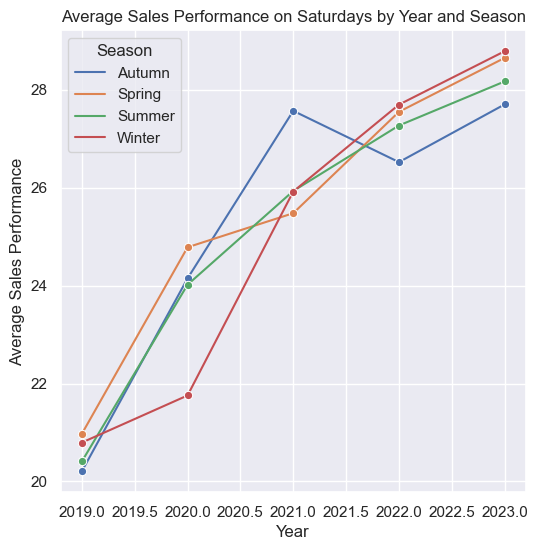

In [911]:
plt.figure(figsize=(6, 6))
sns.lineplot(data=pd.pivot_table(data = store_1346,
               index = ['YEAR','SEASON'],
               columns = 'DAY_NAME',
               values = 'PER_SALE',
               aggfunc = 'mean')['Saturday'].reset_index(),
             x='YEAR',
             y='Saturday',
             hue='SEASON',
             marker='o')
# Adding titles and labels
plt.title('Average Sales Performance on Saturdays by Year and Season')
plt.xlabel('Year')
plt.ylabel('Average Sales Performance')
plt.legend(title='Season')
plt.grid(True)
plt.show()

In [914]:
pd.pivot_table(data = store_1346,
               index = 'SEASON',
               columns = ['DAY_NAME','PROMOTION_TYPE'],
               values = 'PER_SALE',
               aggfunc = 'mean')

DAY_NAME             Friday                                           \
PROMOTION_TYPE Delivery Fee  Free Item No Promotion Overall Discount   
SEASON                                                                 
Autumn            25.552036  26.275710    23.621165        25.473675   
Spring            25.856939  27.373552    24.613797        25.904909   
Summer                  NaN  27.072740    23.564371        26.550704   
Winter                  NaN  26.394458    24.257794        27.154412   

DAY_NAME             Monday                                           \
PROMOTION_TYPE Delivery Fee  Free Item No Promotion Overall Discount   
SEASON                                                                 
Autumn            24.000269  22.396880    20.449729        22.894600   
Spring            21.704583  24.033355    21.341396        23.566885   
Summer                  NaN  23.214643    20.798088        22.798784   
Winter                  NaN  23.341493    21.218371        20.045752   

DAY_NAME           Saturday                                           \
PROMOTION_TYPE Delivery Fee  Free Item No Promotion Overall Discount   
SEASON                                                                 
Autumn            31.181319  27.381755    24.707151        26.339808   
Spring            26.815101  28.490519    25.097308        29.165936   
Summer                  NaN  27.926238    24.460944        28.551912   
Winter                  NaN  28.631941    24.984460        27.301439   

DAY_NAME             Sunday                                           \
PROMOTION_TYPE Delivery Fee  Free Item No Promotion Overall Discount   
SEASON                                                                 
Autumn            27.855615  27.611789    24.434906        26.965583   
Spring            26.882716  27.920605    25.013569        30.016872   
Summer                  NaN  28.486717    24.439747        27.838468   
Winter                  NaN  27.433060    25.900678        27.385901   

DAY_NAME           Thursday                                           \
PROMOTION_TYPE Delivery Fee  Free Item No Promotion Overall Discount   
SEASON                                                                 
Autumn            23.800141  23.527974    21.843588        23.728643   
Spring            24.155440  24.911049    23.061522        27.071224   
Summer                  NaN  25.467362    22.392758        24.567432   
Winter                  NaN  24.006991    22.721582        25.333333   

DAY_NAME            Tuesday                                           \
PROMOTION_TYPE Delivery Fee  Free Item No Promotion Overall Discount   
SEASON                                                                 
Autumn            20.507143  21.885779    20.344529        21.580396   
Spring            21.724275  24.053008    21.291430        24.767117   
Summer                  NaN  23.474573    20.484849        23.940539   
Winter                  NaN  23.349358    20.583669              NaN   

DAY_NAME          Wednesday                                           
PROMOTION_TYPE Delivery Fee  Free Item No Promotion Overall Discount  
SEASON                                                                
Autumn            26.301805  24.139833    21.424961        22.914477  
Spring            24.730125  26.145788    23.263601        25.791038  
Summer                  NaN  24.291813    22.175380        25.624884  
Winter                  NaN  24.671525    22.483743              NaN

In [915]:
pd.pivot_table(data = store_1346,
               index = 'SEASON',
               columns = 'PROMOTION_TYPE',
               values = 'PER_SALE',
               aggfunc = 'mean')

PROMOTION_TYPE  Delivery Fee  Free Item  No Promotion  Overall Discount
SEASON                                                                 
Autumn             25.694461  24.887980     22.430538         23.965950
Spring             24.927156  26.136499     23.316004         26.929272
Summer                   NaN  25.852271     22.609923         25.571785
Winter                   NaN  25.820039     23.090941         26.288391

In [918]:
pd.pivot_table(data = store_1346,
               index = 'SEASON',
               columns = 'PROMOTION_TYPE',
               values = 'NET_SALES_FINAL_USD_AMOUNT',
               aggfunc = 'mean')

PROMOTION_TYPE  Delivery Fee    Free Item  No Promotion  Overall Discount
SEASON                                                                   
Autumn           4533.750000  5179.196721   3843.518006       3982.588235
Spring           4731.609756  5192.609375   3996.052817       5423.111111
Summer                   NaN  4676.075000   3802.518325       4515.526316
Winter                   NaN  5430.780000   3936.771772       5665.000000

In [920]:
store_1346.groupby('YEAR')['NET_SALES_FINAL_USD_AMOUNT'].nlargest(10) 

YEAR  BUSINESS_DATE
2019  2019-07-29        4231
      2019-08-17        3750
      2019-08-09        3668
      2019-05-17        3640
      2019-12-31        3637
      2019-11-08        3636
      2019-05-24        3634
      2019-05-25        3593
      2019-09-20        3578
      2019-05-30        3565
2020  2020-02-02        7463
      2020-12-31        7310
      2020-12-18        6231
      2020-04-18        6127
      2020-12-26        6074
      2020-09-04        5740
      2020-10-31        5625
      2020-12-19        5577
      2020-09-27        5572
      2020-12-04        5466
2021  2021-02-07        9850
      2021-03-20        6903
      2021-04-30        6671
      2021-03-28        6510
      2021-04-24        6475
      2021-01-24        6357
      2021-08-20        6250
      2021-09-19        6173
      2021-01-01        6169
      2021-01-22        6123
2022  2022-02-13        9126
      2022-12-02        7386
      2022-12-31        7320
      2022-09-02       

In [921]:
store_1346

STORE_KEY  STORE_NUMBER STORE_NAME STORE_TYPE_NAME  OPEN_DATE  \
BUSINESS_DATE                                                                  
2019-04-23          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-24          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-25          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-26          2127          1346     CA1346       FRANCHISE 2017-11-20   
2019-04-27          2127          1346     CA1346       FRANCHISE 2017-11-20   
...                  ...           ...        ...             ...        ...   
2023-12-27          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-28          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-29          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-30          2127          1346     CA1346       FRANCHISE 2017-11-20   
2023-12-31          2127          1346     CA1346       FRANCHISE 2017-11-20   

              CLOSE_DATE MONTH_NAME   DAY_NAME     CITY_NAME STATE_CODE  \
BUSINESS_DATE                                                             
2019-04-23    1999-12-31      April    Tuesday  APPLE VALLEY         CA   
2019-04-24    1999-12-31      April  Wednesday  APPLE VALLEY         CA   
2019-04-25    1999-12-31      April   Thursday  APPLE VALLEY         CA   
2019-04-26    1999-12-31      April     Friday  APPLE VALLEY         CA   
2019-04-27    1999-12-31      April   Saturday  APPLE VALLEY         CA   
...                  ...        ...        ...           ...        ...   
2023-12-27    1999-12-31   December  Wednesday  APPLE VALLEY         CA   
2023-12-28    1999-12-31   December   Thursday  APPLE VALLEY         CA   
2023-12-29    1999-12-31   December     Friday  APPLE VALLEY         CA   
2023-12-30    1999-12-31   December   Saturday  APPLE VALLEY         CA   
2023-12-31    1999-12-31   December     Sunday  APPLE VALLEY         CA   

               STATE_NAME TIME_ZONE_NAME  DMA_ID     DMA_NAME STORE_STATUS  \
BUSINESS_DATE                                                                
2019-04-23     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-24     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-25     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-26     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2019-04-27     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
...                   ...            ...     ...          ...          ...   
2023-12-27     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-28     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-29     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-30     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   
2023-12-31     CALIFORNIA        PACIFIC     803  LOS ANGELES       ACTIVE   

               REGION_ID REGION_NAME  PRIOR_STORE_NUMBER STORE_LIVE_DATE  \
BUSINESS_DATE                                                              
2019-04-23             4        WEST                   0      2017-11-20   
2019-04-24             4        WEST                   0      2017-11-20   
2019-04-25             4        WEST                   0      2017-11-20   
2019-04-26             4        WEST                   0      2017-11-20   
2019-04-27             4        WEST                   0      2017-11-20   
...                  ...         ...                 ...             ...   
2023-12-27             4        WEST                   0      2017-11-20   
2023-12-28             4        WEST                   0      2017-11-20   
2023-12-29             4        WEST                   0      2017-11-20   
2023-12-30             4        WEST                   0      2017-11-20   
2023-12-31             4        WEST                   0      2017-11-2

In [929]:
df[df['DMA_NAME'] == 'LOS ANGELES']['STORE_NUMBER'].unique()

array([ 137,  237,  295,  296,  315,  386,  387,  392,  435,  443,  458,
        465,  494,  511,  573,  584,  601,  605,  622,  625,  632,  672,
        679,  725,  775,  806,  835,  856, 1051, 1078, 1081, 1143, 1169,
       1206, 1229, 1232, 1315, 1346, 1357, 1415, 1416, 1484, 1566, 1567,
       1576, 1637, 1700, 1752, 1806, 1913, 1942, 1975, 2301, 2311, 2364,
       2574], dtype=int16)

In [5]:
import pandas as pd

# Define the data
data = {
    'BUSINESS_DATE': [
        '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', 
        '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', 
        '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', 
        '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', 
        '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', 
        '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', 
        '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28', 
        '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', 
        '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', 
        '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', 
        '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', 
        '2023-11-30', '2023-12-31'
    ],
    'NET_SALES_FINAL_USD_AMOUNT': [
        2467.625000, 2692.451613, 2557.466667, 2519.451613, 2490.483871, 
        2573.000000, 2429.290323, 2499.233333, 2566.645161, 2542.129032, 
        2924.000000, 3076.064516, 3861.233333, 4151.548387, 3686.233333, 
        4109.612903, 4152.612903, 4110.400000, 4151.709677, 3883.666667, 
        4166.580645, 4622.967742, 4264.821429, 4790.161290, 4767.166667, 
        4568.709677, 4411.233333, 4379.580645, 4340.290323, 4305.833333, 
        4136.354839, 3982.533333, 4151.483871, 4270.096774, 4092.678571, 
        4458.838710, 4257.466667, 4285.870968, 4068.500000, 4332.677419, 
        4100.903226, 4525.666667, 4477.903226, 4205.300000, 4875.193548, 
        5034.838710, 5165.821429, 5603.516129, 5343.200000, 4831.064516, 
        4509.300000, 4817.225806, 4570.483871, 5269.200000, 5079.645161, 
        5150.600000, 5512.645161
    ],
    'PCT_CHANGE': [
        0.000000, 8.350256, -5.278073, -1.508862, -1.163137, 
        3.207001, -5.915706, 2.798579, 2.626457, -0.964394, 
        13.059883, 4.943476, 20.334664, 6.992934, -12.623049, 
        10.302176, 1.035493, -1.026978, 0.995004, -6.901803, 
        6.790076, 9.872167, -8.397686, 10.967060, -0.482354, 
        -4.343830, -3.569894, -0.722733, -0.905246, -0.800240, 
        -4.097291, -3.862403, 4.069642, 2.777757, -4.335014, 
        8.212007, -4.729856, 0.662743, -5.342779, 6.097325, 
        -5.651784, 9.385655, -1.066647, -6.482373, 13.740861, 
        3.170810, 2.535564, 7.811072, -4.871914, -10.600883, 
        -7.135576, 6.392181, -5.398595, 13.260384, -3.731655, 
        1.377603, 6.567540
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


BUSINESS_DATE  NET_SALES_FINAL_USD_AMOUNT  PCT_CHANGE
0     2019-04-30                 2467.625000    0.000000
1     2019-05-31                 2692.451613    8.350256
2     2019-06-30                 2557.466667   -5.278073
3     2019-07-31                 2519.451613   -1.508862
4     2019-08-31                 2490.483871   -1.163137
5     2019-09-30                 2573.000000    3.207001
6     2019-10-31                 2429.290323   -5.915706
7     2019-11-30                 2499.233333    2.798579
8     2019-12-31                 2566.645161    2.626457
9     2020-01-31                 2542.129032   -0.964394
10    2020-02-29                 2924.000000   13.059883
11    2020-03-31                 3076.064516    4.943476
12    2020-04-30                 3861.233333   20.334664
13    2020-05-31                 4151.548387    6.992934
14    2020-06-30                 3686.233333  -12.623049
15    2020-07-31                 4109.612903   10.302176
16    2020-08-31                 4152.612903    1.035493
17    2020-09-30                 4110.400000   -1.026978
18    2020-10-31                 4151.709677    0.995004
19    2020-11-30                 3883.666667   -6.901803
20    2020-12-31                 4166.580645    6.790076
21    2021-01-31                 4622.967742    9.872167
22    2021-02-28                 4264.821429   -8.397686
23    2021-03-31                 4790.161290   10.967060
24    2021-04-30                 4767.166667   -0.482354
25    2021-05-31                 4568.709677   -4.343830
26    2021-06-30                 4411.233333   -3.569894
27    2021-07-31                 4379.580645   -0.722733
28    2021-08-31                 4340.290323   -0.905246
29    2021-09-30                 4305.833333   -0.800240
30    2021-10-31                 4136.354839   -4.097291
31    2021-11-30                 3982.533333   -3.862403
32    2021-12-31                 4151.483871    4.069642
33    2022-01-31                 4270.096774    2.777757
34    2022-02-28                 4092.678571   -4.335014
35    2022-03-31                 4458.838710    8.212007
36    2022-04-30                 4257.466667   -4.729856
37    2022-05-31                 4285.870968    0.662743
38    2022-06-30                 4068.500000   -5.342779
39    2022-07-31                 4332.677419    6.097325
40    2022-08-31                 4100.903226   -5.651784
41    2022-09-30                 4525.666667    9.385655
42    2022-10-31                 4477.903226   -1.066647
43    2022-11-30                 4205.300000   -6.482373
44    2022-12-31                 4875.193548   13.740861
45    2023-01-31                 5034.838710    3.170810
46    2023-02-28                 5165.821429    2.535564
47    2023-03-31                 5603.516129    7.811072
48    2023-04-30                 5343.200000   -4.871914
49    2023-05-31                 4831.064516  -10.600883
50    2023-06-30                 4509.300000   -7.135576
51    2023-07-31                 4817.225806    6.392181
52    2023-08-31                 4570.483871   -5.398595
53    2023-09-30                 5269.200000   13.260384
54    2023-10-31                 5079.645161   -3.731655
55    2023-11-30                 5150.600000    1.377603
56    2023-12-31                 5512.645161    6.567540

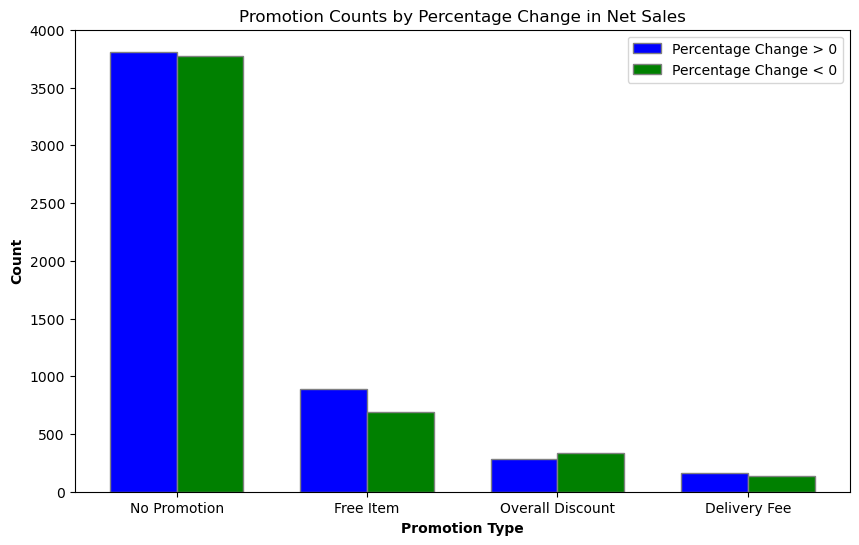

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for percentage change greater than 0
data_greater_than_zero = {
    'PROMOTION_TYPE': ['No Promotion', 'Free Item', 'Overall Discount', 'Delivery Fee'],
    'COUNT': [3811, 890, 282, 158]
}

# Data for percentage change less than 0
data_less_than_zero = {
    'PROMOTION_TYPE': ['No Promotion', 'Free Item', 'Overall Discount', 'Delivery Fee'],
    'COUNT': [3776, 690, 332, 138]
}

# Create DataFrames
df_greater_than_zero = pd.DataFrame(data_greater_than_zero)
df_less_than_zero = pd.DataFrame(data_less_than_zero)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = range(len(df_greater_than_zero))
r2 = [x + bar_width for x in r1]

# Create the bars
ax.bar(r1, df_greater_than_zero['COUNT'], color='b', width=bar_width, edgecolor='grey', label='Percentage Change > 0')
ax.bar(r2, df_less_than_zero['COUNT'], color='g', width=bar_width, edgecolor='grey', label='Percentage Change < 0')

# Add labels and title
ax.set_xlabel('Promotion Type', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Promotion Counts by Percentage Change in Net Sales')
ax.set_xticks([r + bar_width/2 for r in range(len(df_greater_than_zero))])
ax.set_xticklabels(df_greater_than_zero['PROMOTION_TYPE'])

# Add legend
ax.legend()

# Show the plot
plt.show()


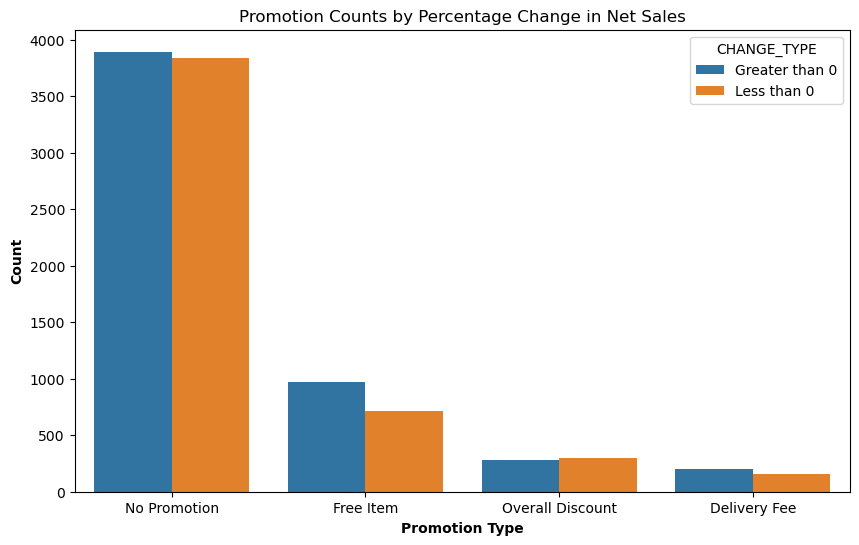

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Corrected data for percentage change greater than 0
data_lesser_than_zero = {
    'PROMOTION_TYPE': ['No Promotion', 'Free Item', 'Overall Discount', 'Delivery Fee'],
    'COUNT': [3895, 973, 279, 200],
    'CHANGE_TYPE': ['Greater than 0'] * 4
}

# Corrected data for percentage change less than 0
data_grater_than_zero = {
    'PROMOTION_TYPE': ['No Promotion', 'Free Item', 'Overall Discount', 'Delivery Fee'],
    'COUNT': [3840, 711, 298, 160],
    'CHANGE_TYPE': ['Less than 0'] * 4
}

# Create DataFrames
df_greater_than_zero = pd.DataFrame(data_greater_than_zero)
df_less_than_zero = pd.DataFrame(data_less_than_zero)

# Combine the DataFrames
df_combined = pd.concat([df_greater_than_zero, df_less_than_zero])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_combined, x='PROMOTION_TYPE', y='COUNT', hue='CHANGE_TYPE')

# Add labels and title
plt.xlabel('Promotion Type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Promotion Counts by Percentage Change in Net Sales')

# Show the plot
plt.show()


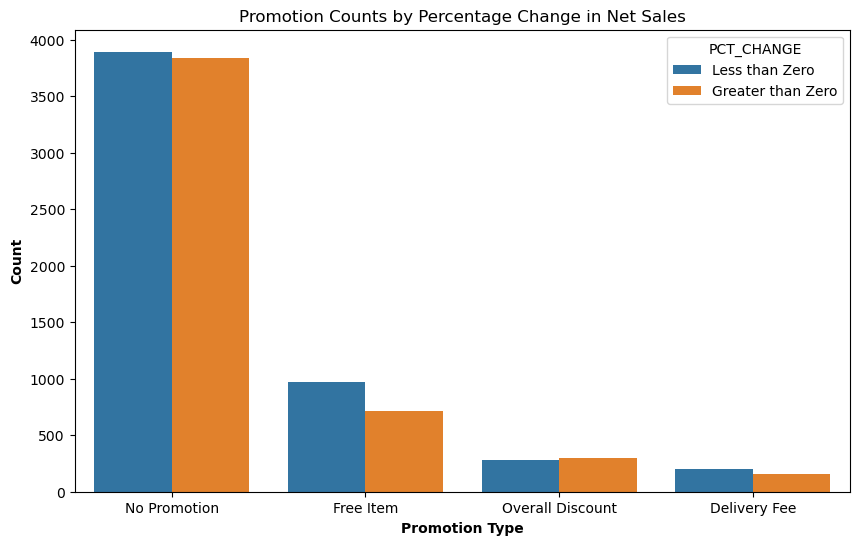

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for percentage change less than zero
data_less_than_zero = {
    'PROMOTION_TYPE': ['No Promotion', 'Free Item', 'Overall Discount', 'Delivery Fee'],
    'COUNT': [3895, 973, 279, 200]
}

# Data for percentage change greater than zero
data_greater_than_zero = {
    'PROMOTION_TYPE': ['No Promotion', 'Free Item', 'Overall Discount', 'Delivery Fee'],
    'COUNT': [3840, 711, 298, 160]
}

# Create DataFrames
df_less_than_zero = pd.DataFrame(data_less_than_zero)
df_greater_than_zero = pd.DataFrame(data_greater_than_zero)

# Combine DataFrames for easier plotting
df_less_than_zero['PCT_CHANGE'] = 'Less than Zero'
df_greater_than_zero['PCT_CHANGE'] = 'Greater than Zero'
df_combined = pd.concat([df_less_than_zero, df_greater_than_zero])

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_combined, x='PROMOTION_TYPE', y='COUNT', hue='PCT_CHANGE')

# Add labels and title
plt.xlabel('Promotion Type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Promotion Counts by Percentage Change in Net Sales')
plt.savefig('promotion_counts_by_pct_change.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
